In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from typing import *

In [ ]:
string = "abc"
a = list(string)
b = ''.join(a)
b
a


### Greedy

## 1299 Replace Elements with Greatest Element on Right Side (Amazon 4->3)  

Given an array arr, replace every element in that array with the greatest element among the elements to its right, and replace the last element with -1.

Input: arr = [17,18,5,4,6,1]  
Output: [18,6,6,6,1,-1]

In [ ]:
class Solution:
    def replaceElements(self, A: List[int]) -> List[int]:
        mx = -1
        for i in range(len(A) - 1, -1, -1):
            A[i], mx = mx, max(mx, A[i])
        return A

## 243 Shortest Word Distance (Amazon 2->0, Microsoft 3)

In [ ]:
class Solution(object):
    def shortestDistance(self, words, word1, word2):
        """
        :type words: List[str]
        :type word1: str
        :type word2: str
        :rtype: int
        """
        i1 = -1
        i2 = -1
        minDistance = len(words)
        
        for i in range(len(words)):
            if words[i] == word1:
                i1 = i
                
            elif words[i] == word2:
                i2 = i
                
            if i1 != -1 and i2 != -1:
                minDistance = min(minDistance, abs(i1 - i2))
                
        return minDistance

## 821 Shortest Distance to a Character (Apple 3->2)

In [ ]:
import math
class Solution:
    def shortestToChar(self, S, C):
        """
        :type S: str
        :type C: str
        :rtype: List[int]
        """

#         res = []
#         for index, char in enumerate(S):
#             if char == C:
#                 res.append(index)
                
#         left = 0
#         right = 1
        
        prev = -math.inf
        ans = [0] * len(S)
        for i, x in enumerate(S):
            if x == C: 
                prev = i
            ans[i] = i - prev

        print(ans)    
            
        prev = math.inf
        for i in range(len(S) - 1, -1, -1):
            if S[i] == C: 
                prev = i
            ans[i] = min(ans[i], prev - i)

        return ans

## 1578 Minimum Deletion Cost to Avoid Repeating Letters
Input: s = "abaac", cost = [1,2,3,4,5]  
Output: 3  
Explanation: Delete the letter "a" with cost 3 to get "abac" (String without two identical letters next to each other).  

For a group of continuous same characters,
we need to delete all the group but leave only one character.

For each group of continuous same characters,
we need cost = sum_cost(group) - max_cost(group)

In [ ]:
public int minCost(String s, int[] cost) {
        int res = 0, max_cost = 0, sum_cost = 0, n = s.length();
        for (int i = 0; i < n; ++i) {
            if (i > 0 && s.charAt(i) != s.charAt(i - 1)) {
                res += sum_cost - max_cost;
                sum_cost = max_cost = 0;
            }
            sum_cost += cost[i];
            max_cost = Math.max(max_cost, cost[i]);
        }
        res += sum_cost - max_cost;
        return res;
    }

## 55 Jump Game (List) (Amazon 10->13,, Google 6->0, Microsoft OA Phone->2, Facebook 2)  

Given an array of non-negative integers nums, you are initially positioned at the first index of the array.

Each element in the array represents your maximum jump length at that position.

Determine if you are able to reach the last index.

O(N)  
O(1)

In [ ]:
class Solution:
    def canJump(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        
        if len(nums) <= 1:
            return True

        # max position one could reach 
        # starting from index <= i
        max_pos = nums[0]
        
        for i in range(len(nums)):
            nxt = i + nums[i]
            
            if nxt >= len(nums) - 1:
                return True        
        
            if i == nxt and nxt == max_pos:
                return False

            max_pos = max(max_pos, nxt)
            
        return True

In [ ]:
class Solution:
    def canJump(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """ 
        if len(nums) <= 1:
            return True

        # max position one could reach 
        # starting from index <= i
        max_pos = nums[0]
        
        for i in range(1, len(nums)):
            # if one could't reach this point
            if max_pos < i:
                return False
            
            max_pos = max(max_pos, nums[i] + i)

        return True

In [ ]:
class Solution:
    def canJump(self, nums):
        m = 0
        for i, n in enumerate(nums):
#             print('i=',i,'n=',n) 
            if i > m:
                return False
            m = max(m, i+n)
#             print('m=',m)
        return True

In [ ]:
class Solution:
    def canJump(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """ 
        if len(nums) <= 1:
            return True
        
        max_jump = float('-inf')
        for i, n in enumerate(nums):
            max_jump = max(max_jump-1, n)
            
            if max_jump + i >= len(nums) - 1:
                return True
            if max_jump == 0:
                return False

In [ ]:
s = Solution()
nums = [2,3,1,1,4]
s.canJump(nums)

In [ ]:
s = Solution()
nums = [3,2,1,0,4]
s.canJump(nums)

## 45 Jump Game II (List) (Amazon 10-> 5->15, Microsoft 3->0, Google 2->4->0, Apple 3)  

Given an array of non-negative integers nums, you are initially positioned at the first index of the array.

Each element in the array represents your maximum jump length at that position.

Your goal is to reach the last index in the minimum number of jumps.

You can assume that you can always reach the last index.

O(N)   
O(1)

In [ ]:
class Solution:
    def jump(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """

        if len(nums) <= 1:
            return 0 
        
        # max position one could reach 
        # starting from index <= i 
        max_pos = nums[0]
        # max number of steps one could do
        # inside this jump
        max_steps = nums[0]
        
        jumps = 1
        for i in range(1, len(nums)):
            # if to reach this point 
            # one needs one more jump
            if max_steps < i:
                jumps += 1
                max_steps = max_pos
            max_pos = max(max_pos, nums[i] + i)
                
        return jumps

In [ ]:
class Solution:
    def jump(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        cur_end = 0
        cur_farthest = 0
        res = 0
        for i in range(len(nums)-1):
            cur_farthest = max(cur_farthest, i + nums[i])
            if cur_farthest >= len(nums) - 1:
                res += 1
                return res
            if i == cur_end:
                cur_end = cur_farthest
                res += 1
        return res

## 121 Best Time to Buy and Sell Stock (List) (Amazon Onsite 26, Microsoft 6->10->14, Facebook 5->20->10,Google 10, ByteDance 4, Apple 10)  

You want to maximize your profit by choosing a single day to buy one stock and choosing a different day in the future to sell that stock.

O(N)  
O(1)

In [ ]:
import math
class Solution:
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        
        min_price = math.inf
        max_profit = -math.inf
        
        for price in prices:
            min_price = min(min_price, price)
            max_profit = max(max_profit, price - min_price)
            
        return max_profit

## 122 Best Time to Buy and Sell Stock II (List) (Amazon 11->10, Microsof 3->2, Facebook 3, Google 5->2->0, Apple 4)  
O(N)  
O(1)

In [ ]:
class Solution:
    def maxProfit(self, prices):
        """
        :type prices: List[int]
        :rtype: int
        """
        maxprofit = 0
        for i in range(1, len(prices)):
            if prices[i] > prices[i-1]:
                maxprofit += prices[i] - prices[i-1]
                
        return maxprofit

## 123 Best Time to Buy and Sell Stock III (Amazon 12)  
two transactions

In [ ]:
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        price1, price2 = float('inf'), float('inf')
        profit1, profit2 = 0, 0

        for price in prices:
            # the maximum profit if only one transaction is allowed
            price1 = min(price1, price)
            profit1 = max(profit1, price - price1)
            # reinvest the gained profit in the second transaction
            price2 = min(price2, price - profit1)
            profit2 = max(profit2, price - price2)

        return profit2

## 674 Longest Continuous Increasing Subsequence (List) (Facebook 7->0, Amazon 4)
O(N)  
O(1)

In [ ]:
# /*
# Find the length of subsequence without consecutive constraint
#   Given an unsorted array of integers, find the length of longest increasing subsequence (subarray).
# 
#   Example 1:
#   Input: [1,3,5,4,7,8,1,2,3,4]
#   Output: 5
# 
#   Example 2:
#   Input: [2,2,2,2,2]
#   Output: 1
#   Explanation: The longest continuous increasing subsequence is [2], its length is 1. 
# */
#  

In [ ]:
class Solution:
    def findLengthOfLCIS(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if not nums:
            return 0
        if len(nums) == 1:
            return 1
        
        ans = 0
        anchor = 0
        for i in range(1, len(nums)):
            if nums[i] <= nums[i-1]: 
                anchor = i
                
            ans = max(ans, i - anchor + 1)

        return ans

In [ ]:
import math
class Main: 
    #O(N)
    #O(1)
    def findLongest(self, nums):
        if not nums:
            return 0
        
        left = nums[0]
        res = -math.inf
        cur = 1
        
        for n in nums:
            if n > left:
                cur += 1
                
            elif n <= left:
                cur = 1
                
            res = max(res, cur)
            left = n
            
        return res

## 128 Longest Consecutive Sequence (Google 11, Microsoft 10, Amazon 6)  
Given an unsorted array of integers nums, return the length of the longest consecutive elements sequence.  

Input: nums = [100,4,200,1,3,2]  
Output: 4  
Explanation: The longest consecutive elements sequence is [1, 2, 3, 4]. Therefore its length is 4.  

In [ ]:
class Solution:
    def longestConsecutive(self, nums):
        longest_sequence = 0
        num_set = set(nums)

        for num in num_set:
            if num - 1 not in num_set:
                current_num = num
                current_streak = 1

                while current_num + 1 in num_set:
                    current_num += 1
                    current_streak += 1

                longest_sequence = max(longest_sequence, current_streak)

        return longest_sequence

## (4) 56 Merge Intervals (Lists) (Facebook 29->55, Microsoft 12->10, Amazon 10->29, Google 13->15, Apple 15)

O(nlogn)  
O(n)

In [ ]:
class Solution:
    def merge(self,intervals):
        """
        :type intervals: List[List[int]]
        :rtype: List[List[int]]
        """
        if not intervals:
            return 
        
        intervals.sort()
        res = [intervals[0]]
        
        for n in intervals[1:]:

            if res[-1][-1] >= n[0]:
                res[-1][-1] = max(res[-1][-1], n[-1])
            else:
                res.append(n)

        return res

In [ ]:
class Solution {
    public int[][] merge(int[][] intervals) {
        if (intervals == null || intervals.length == 0) {
            return null;
        }
        
        Arrays.sort(intervals, (a, b) -> Integer.compare(a[0], b[0]));
        ArrayList<int[]> res = new ArrayList<>();
        res.add(intervals[0]);
        
        for (int i=1; i<intervals.length; i++) {
        
            if (res.get(res.size() - 1)[1]>=intervals[i][0]) {
                res.get(res.size() - 1)[1] = Math.max(res.get(res.size() - 1)[1],intervals[i][1]);
            } else {
                res.add(intervals[i]); 
            }              
        }
        
        return res.toArray(new int[res.size()][]);
            
    }
}

In [ ]:
array = [1,2,3]
res = []
res.append(array[0])
array
res


[1, 2, 3]

[1]

In [ ]:
class Solution:
    def merge(self, lists):
        """
        :type intervals: List[List[int]]
        :rtype: List[List[int]]
        """
        
        lists.sort()
#         print('new =', new)
        res = []
        for n in lists:
#             print('i =', i)
            if res and n[0] <= res[-1][-1]:
                res[-1][-1] = max(res[-1][-1], n[-1])
#                 print('res1 =', res)
            else:
                res.append(n)
#                 print('res2 =', res)
#             print()
        return res

In [ ]:
s = Solution()
s.merge([[1,3],[2,6],[8,10],[15,18]])

In [1]:
a = [1,2,3]
a[:-2]

[1]

## 57 Insert Interval (Lists) (Amazon 11->2->4, Google 7->6, Facebbook 4->2) (Hard)

In [ ]:
# O(N)
# O(N)
class Solution:
    def insert(self, intervals: List[List[int]], newInterval: List[int]) -> List[List[int]]:
        if not intervals:
            return [newInterval]
        
        res = []
        
        i = 0
        
        while i < len(intervals):
            if intervals[i][0] <= newInterval[0]:
                res.append(intervals[i])
                i += 1
                
            else:
                break
                
        if not res or res[-1][-1] < newInterval[0]:
            res.append(newInterval)
        else:
            res[-1][-1] = max(res[-1][-1], newInterval[-1])
            
        
        while i < len(intervals):
            if intervals[i][0] <= res[-1][-1]:
                res[-1][-1] = max(res[-1][-1], intervals[i][-1])
            
            else: 
                res.append(intervals[i])
                
            i += 1
                
        return res

In [ ]:
class Solution:
    def insert(self, lists, newInterval):
        """
        :type intervals: List[List[int]]
        :type newInterval: List[int]
        :rtype: List[List[int]]
        """
        if not lists:
            return [newInterval]
        
        for i in range(len(lists)):
            if lists[i][0] > newInterval[0]:
                lists.insert(i, newInterval)
                break
                
            lists.append(newInterval)            
            
        res = [lists.pop(0)]
        for n in lists:
            if res[-1][-1] >= n[0]:
                res[-1][-1] = max(res[-1][-1], n[-1])
            else:
                res.append(n)
        return res

In [ ]:
class Solution:
    def insert(self, intervals, newInterval):
        """
        :type intervals: List[List[int]]
        :type newInterval: List[int]
        :rtype: List[List[int]]
        """
        start, end = newInterval[0], newInterval[-1]
        left = [i for i in intervals if i[-1] < start]
#         print('left=', left)
        right = [i for i in intervals if i[0] > end]
#         print('right=', right)
        if left + right != intervals:
            start = min(start, intervals[len(left)][0])
#             print('s=', s)
            end = max(end, intervals[~len(right)][-1])
#             print('e=', e)
#             print(intervals[~len(right)][-1])
            
        return left + [[start, end]] + right

In [ ]:
intervals = [[1,3],[6,9]]
newInterval = [2, 5]
s = Solution()
s.insert(intervals, newInterval)

In [ ]:
~1

In [ ]:
def insert(self, intervals, newInterval):
    s, e = newInterval.start, newInterval.end
    left, right = [], []
    for i in intervals:
        if i.end < s:
            left += i,
        elif i.start > e:
            right += i,
        else:
            s = min(s, i.start)
            e = max(e, i.end)
    return left + [Interval(s, e)] + right

## 1423 Maximum Points You Can Obtrain from Cards (Google 33)  

There are several cards arranged in a row, and each card has an associated number of points. The points are given in the integer array cardPoints.  

In one step, you can take one card from the beginning or from the end of the row. You have to take exactly k cards.  

Your score is the sum of the points of the cards you have taken.  

Given the integer array cardPoints and the integer k, return the maximum score you can obtain.  

In [ ]:
class Solution:
    def maxScore(self, cardPoints: List[int], k: int) -> int:
        
        suma = sum(cardPoints)
        
        left = 0
        right = len(cardPoints) - k - 1
        
        cur = sum(cardPoints[left:right+1])
        
        res = suma - cur
        
        while right < len(cardPoints) - 1:
            cur -= cardPoints[left]
            left += 1
            right += 1
            cur += cardPoints[right]
            
            res = max(res, suma - cur)
            
        return res
            

## 678 Valid Parenthesis String (Facebook 6, Amazon 2, ByteDance)  
Given a string s containing only three types of characters: '(', ')' and '*', return true if s is valid.  

The following rules define a valid string:  

Any left parenthesis '(' must have a corresponding right parenthesis ')'.  
Any right parenthesis ')' must have a corresponding left parenthesis '('.  
Left parenthesis '(' must go before the corresponding right parenthesis ')'.  
'*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".  


In [ ]:
class Solution:
    def checkValidString(self, s: str) -> bool:
        lo, hi = 0, 0
        
        for c in s:
            lo += 1 if c == '(' else -1 # treat '*' as ')'
            hi += 1 if c != ')' else -1 # treat '*' as '('
            lo = max(lo, 0)  # treat '*' as empty
            
            if hi < 0: 
                return False # ')' more than '*'+'('
            
        return lo == 0 # detect if more '(' than '*'

## 1048 Longest String Chain (Google 18)  

wordA is a predecessor of wordB if and only if we can insert exactly one letter anywhere in wordA without changing the order of the other characters to make it equal to wordB

Input: words = ["a","b","ba","bca","bda","bdca"]  
Output: 4  
Explanation: One of the longest word chains is ["a","ba","bda","bdca"].

In [ ]:
class Solution:
    def longestStrChain(self, words: List[str]) -> int:
        if not words:
            return 0
        
        res = 0
        words.sort(key = lambda string: len(string))
        
        print(words)
        
        dic = {}
        for word in words:
            dic[word] = 1
            for i in range(len(word)):
                array = list(word)
                array.pop(i)
                remain = ''.join(array)
                
                if remain in dic and dic[remain] + 1 > dic[word]:
                    dic[word] = dic[remain] + 1
                    
            res = max(res, dic[word])
            
        return res

In [ ]:
class Solution {
    public int longestStrChain(String[] words) {
        if(words == null || words.length == 0) return 0;
        
        int res = 0;
        Arrays.sort(words, (a,b)-> a.length()-b.length());  // Sort the words based on their lengths
        
        
        HashMap<String, Integer> map = new HashMap();       //Stores each word and length of its max chain.

        for(String w : words) {                             //From shortest word to longest word
            map.put(w, 1);                                  //Each word is atleast 1 chain long
            for(int i=0; i<w.length(); i++) {               //Form next word removing 1 char each time for each w
                StringBuilder sb = new StringBuilder(w);
                String next = sb.deleteCharAt(i).toString();
                if(map.containsKey(next) && map.get(next)+1 > map.get(w))
                    map.put(w, map.get(next)+1);            //If the new chain is longer, update the map
            }
            res = Math.max(res, map.get(w));                //Store max length of all chains
        }
        return res;
        
    }
}

## 763 Partition Labels (String. Dic, 2 Pointers) (Amazon OA 18->78)

Time Complexity: O(N), where N is the length of S.  
O(N)

In [ ]:
class Solution:
    def partitionLabels(self, S):
        """
        :type S: str
        :rtype: List[int]
        """
        if not S:
            return True
        
        dic = {}
        for i, c in enumerate(S):
            dic[c] = i
            
        l, r = 0, 0
        res = []
        for i, c in enumerate(S):
            r = max(r, dic[c])
            
            if i == r:
                res.append(r - l + 1)
                l = i + 1
                
        return res

In [ ]:
s = Solution()
s.partitionLabels("ababcbacadefegdehijhklij")


## Numbers With Equal Digit Sum (List. Dic, Greedy) (Microsoft OA)  
Write a function given array A consisting of N integers, returns the maximum sum of two numbers whose digits add up to an equal sum. If there are no two numbers whose digits have an equal sum, the function should return -1.  

Examples:  

Given A=[51,71,17,42], the function should return 93. There are two pairs of numbers whose digits add up to an equal sum: (51,42) and (17,71). The first pairs sums up to 93.  
Given A=[42,33,60], the function shpuld return 102. The digits of all numbers in A add up to the same sum, and choosing to add 42 and 60 gives the result 102.  
Given A=[51,32,43], the function should return -1, since all numbers in A have digits that add up to different, unique sums

In [ ]:
def largest_digit_sum(arr):
    def find_digit_sum(num):
        val = 0
        while num:
            val += num % 10
            num //= 10
            
        return val
    
    dic = {}
    res = -1
    for num in arr:
        sums = find_digit_sum(num)
        
        if sums in dic:
            previous = dic[sums]
            dic[sums] = max(previous, num)
            res = max(res, previous + num)
            
        else:
            dic[sums] = num
            
    return res

In [ ]:
array = [51, 71, 17, 42]  # 93
largest_digit_sum(array)

93

## Widest Path Without Trees (Microsoft OA)

In [ ]:
def solution(x, y):
    widest = 0
    x.sort()
    
    for i in range(1, len(x)):
        widest = max(widest, x[i] - x[i-1])
        
    return widest

## Largest K such that both K and -K exist in array (Microsoft OA)
Given an array A of N integers, returns the largest integer K > 0 such that both values K and -K exist in array A. If there is no such integer, the function should return 0.

Input:[3, 2, -2, 5, -3]  
Output: 3  

Input:[1, 2, 3, -4]  
Output: 0

In [ ]:
def largest_k(nums: List[int]) -> int:
    largest = 0
    for i in nums:
        if i > 0 and -i in nums:
            largest = max(largest, i)
    return largest

In [ ]:
def solution(array):
    res = 0
    set1 = set(array)
    for n in array:
        if -n in set1:
            res = max(res, abs(n))
            
    return res

a = [3, 2, -2, 5, -3]
b = [1, 2, 3, 0, -4]
solution(b)

0

## 1007 Minimum Domino Rotations For Equal Row (Google OA)

In [ ]:
class Solution:
    def minDominoRotations(self, A: List[int], B: List[int]) -> int:
        def qualified_domino(num):
            for i in range(len(A)):
                if A[i] != num and B[i] != num:
                    return False
            return True
        
        if not qualified_domino(A[0]) and not qualified_domino(B[0]):
            return -1
            
        if qualified_domino(A[0]):
            return min(len(A)-A.count(A[0]), len(B)-B.count(A[0]))
            
        if qualified_domino(B[0]):
            return min(len(A)-A.count(B[0]), len(B)-B.count(B[0]))

## Whac a Mole (Google Phone)  

Given an int array holes where 1 means there is a mole, 0 means no mole. Find out the max number of moles you can hit with a mallet of width w.

https://leetcode.com/discuss/interview-question/350139/Google-or-Phone-Screen-or-Whac-A-Mole 

In [ ]:
class Solution:
    def mallet(self, holes,w):
        """
        :type rowIndex: int
        :rtype: List[int]
        """
        if not (holes and w):
            return 0
        
        if len(holes) < w:
            return 0
        
        result = 0
        for i in range(w):
            result += holes[i]
         
        curr_sum = result  #update
        for j in range(w,len(holes)): #update
            curr_sum += holes[j] - holes[j-w]  #update
            result = max(result,curr_sum)

        return result

In [ ]:
s = Solution()
s.mallet([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], 5)

### General

### (18) DP-Iteration. DP-DFS-Recursion

### List. DP-Iteration. O(N) O(N), O(N^2) O(N^2)

## 486 Predict the Winner (Apple , Google 2, Amazon 2)

In [ ]:
class Solution(object):
    def PredictTheWinner(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        n = len(nums)
        if n == 1 or n %2 == 0: 
            return True
        
        dp = [[0]*n for _ in range(n)]
        
        for i in range(n-1, -1, -1):
            for j in range(i+1, n):
                dp[i][j] = max(nums[i]-dp[i+1][j], nums[j]-dp[i][j-1])
        
        for n in dp:
            print(n)

        return dp[0][-1] >= 0

In [ ]:
s = Solution()
nums = [1,5,2]
s.PredictTheWinner(nums)

[0, 5, -3]
[0, 0, 5]
[0, 0, 0]


False

## 413 Arithmetic Slices  (Amazon 4)

In [ ]:
class Solution:
    def numberOfArithmeticSlices(self, array):
        if not array:
            return 0

        dp = [0] * len(array)

        for i in range(2, len(array)):
            if array[i] - array[i-1] == array[i-1] - array[i-2]:
                dp[i] = 1 + dp[i-1]

        return sum(array)

In [ ]:
class Solution:
    def numberOfArithmeticSlices(self, array):
        res = 0    
        dp =0

        i = 0
        while i <= len(array) - 3:
            if array[i+1] - array[i] == array[i+2] - array[i+1]:
                dp += 1
                res += dp

            else:
                dp = 0

            i += 1

        return res
    
s = Solution()

a = [1,3,5,7,9]
b = [-1, 1, 3, 3, 3, 2, 3, 2, 1, 0]
s.numberOfArithmeticSlices(b)

5

## 509 Fibonacci Number (Amazon 2->3, Microsoft 2->0, Apple 3, Google 3)

Bottom-Up Approach using Memoization  
O(N)  
O(N)

In [ ]:
class Solution:
    def fib(self, n):
        """
        :type n: int
        :rtype: int
        """
#         cache = {0: 0, 
#                  1: 1}
        if n <= 1:
            return n
        
        dp = [0] * (n + 1)
        dp[1] = 1
        # Since range is exclusive and we want to include N, we need to put N+1.
        for i in range(2, n+1):
            dp[i] = dp[i-1] + dp[i-2]

        return dp[n]

In [ ]:
[0] *  -2

[]

In [ ]:
class Solution:
    def fib(self, n):
        """
        :type n: int
        :rtype: int
        """
#         cache = {0: 0, 
#                  1: 1}
        if n <= 1:
            return n
        
        minustwo = 0
        minusone = 1
        for i in range(2, n+1):
            fib = minustwo + minusone
            minustwo = minusone
            minusone = fib
            
        return fib

Top-Down Approach using Memoization

In [ ]:
class Solution:    
    def fib(self, n):
        """
        :type n: int
        :rtype: int
        """        
        cache = {}
        def dp(n): 
            if n in cache:
                return cache[n]
            
            if n == 0:
                return 0
            
            if n == 1:
                return 1

            cache[n] = dp(n-1) + dp(n-2)
            return cache[n]
        
        return dp(n)

In [ ]:
s = Solution()
s.fib(7)

13

In [ ]:
class Solution:        
    def countBinStry(self, n):
        """
        :type n: int
        :rtype: int
        """
        cache = {}
        
        n += 2
        
        def fib(n):
            """
            :type n: int
            :rtype: int
            """
#             if n <= 1:
#                 return n

            if n in cache:
                return cache[n]
        
            if n == 0:
                return 0
            
            if n == 1:
                return 1

            cache[n] = fib(n-1) + fib(n-2)
            
            return cache[n]
        
        return fib(n)

In [ ]:
s = Solution()
s.countBinStry(4)

8

In [ ]:
class Solution:
    def fib(self, n):
        """
        :type n: int
        :rtype: int
        """
        
        if n <= 1:
            return n
        return self.fib(n-1) + self.fib(n-2)

## 70 Climbing Stairs (Int) (Amazon 6->7, Google 3, Apple 3)    

You are climbing a staircase. It takes n steps to reach the top.

Each time you can either climb 1 or 2 steps. In how many distinct ways can you climb to the top?

O(N)  
O(1)

In [ ]:
# Bottom up. 时间复杂度: O(N)- 空间复杂度: O(N)
class Solution:
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        if n == 1:
            return 1
        if n == 2:
            return 2
        
        dp = [0] * (n+1)
        for i in range(3):
            dp[i] = i
        
        for i in range(3, n+1):
            dp[i] = dp[i-1] + dp[i-2]
        return dp[n]
        
import time
s = Solution()
start = time.time()
s.climbStairs(45)
end = time.time()
print(end-start)

8.320808410644531e-05


In [ ]:
# Recursion
class Solution:
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        
        if n == 1: 
            return 1
        if n == 2: 
            return 2
        return self.climbStairs(n - 1) + self.climbStairs(n - 2)

In [ ]:
class Solution:
    def climbStairs(self, n):
        self.res = 0
        self.count(0, n)
        return self.res
        
    def count(self, cur, n):
        if cur == n:
            self.res += 1
            return
        
        if cur > n:
            return
        
        self.count(cur+1, n)
        self.count(cur+2, n)

s = Solution()
s.climbStairs(8)

34

In [ ]:
[0] * -1

[]

In [ ]:
# Top down. 时间复杂度: O(N)- 空间复杂度: O(N)
class Solution:            
    def climbStairs(self, n):
        """
        :type n: int
        :rtype: int
        """
        dic = {1: 1, 
               2: 2}
        
        def dp(n):
            if n in dic:
                return dic[n]

            dic[n] = dp(n-1) + dp(n-2)
            return dic[n]
        
        return dp(n)

## 343 Integer Break (Apple 4->0, Google 2, 6-12months)   
Given an integer n, break it into the sum of k positive integers, where k >= 2, and maximize the product of those integers.  

Return the maximum product you can get.

In [ ]:
class Solution(object):

    # cache[i] 表示 数字为i的最大乘积
    def integerBreak(self, n):
        """
        :type n: int
        :rtype: int
        """
        
        if n < 2:
            return 0
        if n == 2:
            return 1
        if n == 3:
            return 2
        
        cache = [0] * (n+1)
        for i in range(4):
            cache[i] = i
        
        for i in range(4, n+1):
            for j in range(1, i//2 + 1):                    
                cache[i] = max(cache[i], cache[j] * cache[i-j])
                
        print(cache)
        return cache[-1]
    
s = Solution()
s.integerBreak(6)

[0, 1, 2, 3, 4, 6, 9]


9

In [ ]:
# O(N^2)
# O(N)
class Solution(object):
    cache = {1: 1}
    def integerBreak(self, n):
        """
        :type n: int
        :rtype: int
        """
        if n in self.cache:
            return self.cache[n]
        
        self.cache[n] = -1
        
        for i in range(1, n):
            self.cache[n] = max(self.cache[n], i * (n-i), i * self.integerBreak(n-i))
        return self.cache[n] 

In [ ]:
class Solution(object):
    def integerBreak(self, n):
        """
        :type n: int
        :rtype: int
        """
        cache = [1] * (n+1)
        for r in range(2, n+1):
            for l in range(1, r):
                cache[r] = max(cache[r], l * (r-l), l * cache[r-l])
                
#         print(cache)
        return cache[-1] 

In [ ]:
s = Solution()
for n in range(15):
    print(n, s.integerBreak(n))


0 1
1 1
2 1
3 2
4 4
5 6
6 9
7 12
8 18
9 27
10 36
11 54
12 81
13 108
14 162


## Product of K Consecutive Numbers (DP-Iteration) (Google Phone)

In [ ]:
class Solution:
    # O(N)
    # O(N)
    def product(self, nums: List[int], k: int) -> List[int]:
        dp = [nums[0]] * len(nums)
        k = len(nums) if k > len(nums) else k
        
        for i in range(1, k):
            dp[i] = dp[i-1] * nums[i]
            
        for i in range(k, len(nums)):
            dp[i] = dp[i-1] // nums[i-k] * nums[i]
            
            
        return dp
            
nums = [1, 3, 3, 6, 5, 7, 0, -3]
k = 3
s = Solution()
s.product(nums, k)

[1, 3, 9, 54, 90, 210, 0, 0]

In [ ]:
def x(nums, k):

    dp = [num for num in nums]
    k = len(nums) if k > len(nums) else k
    for i in range(1,k):
        for j in range(i+1,len(nums)):
            dp[j] *= nums[j-i]
    return dp

nums = [1, 3, 3, 6, 5, 7, 0, -3]
k = 3
# Output: [1, 3, 9, 54, 90, 210, 0, 0]
x(nums, k)

[1, 3, 9, 54, 90, 210, 0, 0]

## 975 Odd Even Jump (DP-Iteration) (Google 9->4->21) (Hard)
- 时间复杂度: O(NlgN)- 空间复杂度: O(N)  
规律跳格子，固定点位固定落地点，所以可以搞一个函数专门算这个，接下来就是dp，dp[i]代表从点i能否跳到最后一个点

In [ ]:

class Solution:
    # O(N*logN)
    # O(N)
    def oddEvenJumps(self, A):
        """
        :type A: List[int]
        :rtype: int
        """
        def make(B):
            res = [-1] * N
            stack = [] # invariant: stack is decreasing
            for i in B:
                while stack and i > stack[-1]:
                    res[stack.pop()] = i
                stack.append(i)
            return res

        N = len(A) # A = [10,13,12,14,15]

        B = sorted(list(range(N)), key = lambda i : A[i]) # [0, 2, 1, 3, 4]
        odd_nxt = make(B)

        B = sorted(list(range(N)), key = lambda i : -A[i]) # [4, 3, 1, 2, 0]
        even_nxt = make(B)

        odd, even = [False] * N, [False] * N
        odd[-1], even[-1] = True, True

        for i in range(N-2, -1, -1):
            if odd_nxt[i] != -1:
                odd[i] = even[odd_nxt[i]]
            if even_nxt[i] != -1:
                even[i] = odd[even_nxt[i]]

        return sum(odd)

In [ ]:
for i in range(3,-1,-1):
    print(i)

3
2
1
0


In [ ]:
import bisect
class Solution:
    def maxEnvelopes(self, envelopes):
        """
        :type envelopes: List[List[int]]
        :rtype: int
        """
        
        envelopes.sort(key = lambda x: (x[0], -x[1]))
        dp = []
        for w, h in envelopes:
            pos = bisect.bisect_left(dp, h)
            if pos == len(dp):
                dp.append(h)
            else:
                dp[pos] = h
        return len(dp)

## 718 Maximum Length of Repeated Subarray (ByteDance)  
Input: nums1 = [1,2,3,2,1], nums2 = [3,2,1,4,7]  
Output: 3  
Explanation: The repeated subarray with maximum length is [3,2,1].  

In [ ]:
class Solution:
    def findLength(self, A: List[int], B: List[int]) -> int:
        memo = [[0] * (len(B) + 1) for row in range(len(A) + 1)]
        for i in range(len(A)):
            for j in range(len(B)):
                if A[i] == B[j]:
                    memo[i][j] = 1 + memo[i - 1][j - 1]
                    
        return max(max(row) for row in memo)

## 53 Maximum Subarray (DP-Iteration) (Amazon 29->12, Linkein 16, Microsoft Onsite 13 ->16, Apple 8->6, Google 7, Facebook 7->3 ,ByteDance 4)

In [ ]:
class Solution:
    def maxSubArray(self, nums: 'List[int]') -> 'int':
        n = len(nums)
        max_sum = nums[0]
        for i in range(1, n):
            if nums[i - 1] > 0:
                nums[i] += nums[i - 1] 
            max_sum = max(max_sum, nums[i])

        return max_sum

In [ ]:
class Solution:
    # O(N)  
    # O(N)
    # dp[i]表示i之前的最大sum
    def maxSubArray(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        dp = [nums[0]] * len(nums)
#         print('maxSum =', maxSum)
        
        for i in range(1, len(nums)):
#             print('i=', i)
            dp[i] = max(dp[i - 1] + nums[i], nums[i])
#             print(f'maxSum [{i}] =', maxSum[i])
        return max(dp)

In [ ]:
s = Solution()
nums = [-2,1,-3,4,-1,2,1,-5,4]
s.maxSubArray(nums)

maxSum = [-2, -2, -2, -2, -2, -2, -2, -2, -2]
i= 1
maxSum [1] = 1
i= 2
maxSum [2] = -2
i= 3
maxSum [3] = 4
i= 4
maxSum [4] = 3
i= 5
maxSum [5] = 5
i= 6
maxSum [6] = 6
i= 7
maxSum [7] = 1
i= 8
maxSum [8] = 5


6

In [ ]:
nums = [2,3,4,5]
maxSum = [nums[0] for i in nums]
maxSum

[2, 2, 2, 2]

In [ ]:
maxsum = [2] * 4

In [ ]:
array = [1,2,3]
array[:2]

[1, 2]

## 152 Maximum Product Subarray (DP-Iteration) (Linkedin 10, Microsoft 4->2, Amazon Onsite 4-1 ->7, Google 3->6, Facebook 3->6 ,Apple 5)

In [ ]:
class Solution:
    def maxProduct(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        maxdp = [nums[0]] * len(nums)
        mindp = [nums[0]] * len(nums)

        for i in range(1, len(nums)):
            maxdp[i] = max(mindp[i-1]*nums[i], maxdp[i-1]*nums[i], nums[i])
            mindp[i] = min(maxdp[i-1]*nums[i], mindp[i-1]*nums[i], nums[i])

        return max(maxdp)

## 918 Maximum Sum Circular Subarray (Amazon 2)

In [ ]:
# time limit
class Solution:
    def maxSubarraySumCircular(self, A: List[int]) -> int:
        if not A:
            return 0
        
        array = A + A
        # print(array)
        
        res = float('-inf')
        
        for i in range(len(array) - len(A) + 1):
            slices = array[i:i+len(A)]
            # print('slices', slices)
            dp = [slices[0]] * len(A)
            
            for i in range(1, len(slices)):
                dp[i] = max(slices[i], slices[i] + dp[i-1])
                
            res = max(res, max(dp))
            
        return res
            

In [ ]:
# time limit
class Solution:
    def maxSubarraySumCircular(self, A):
        def maxSum(nums):
            dp = [nums[0]] * len(nums)
            for i in range(1, len(nums)):
                dp[i] = max(dp[i - 1] + nums[i], nums[i])
            return max(dp)
                
        res = [A]

        for i in range(len(A) - 1):
            new = res[-1].copy()
#             new = new.copy()
            n = new.pop()
            new.insert(0, n)
            res.append(new)
        
        print(res)
        
        maximum = float('-inf')
        for n in res:
            maximum = max(maximum, maxSum(n))
            
        return maximum
    
s = Solution()
A = [-2, -3, -1]
s.maxSubarraySumCircular(A)

[[-2, -3, -1], [-1, -2, -3], [-3, -1, -2]]


-1

## 238 Product of Array Except Self (DP-Iteration) (Facebook 70 ->96, Amazon 22->30, Microsoft 9->5, Apple 7->11, Google 4)

In [ ]:
# O(n)  
# O(n)
class Solution():
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        if not nums:
            return []
        
        n = len(nums)
        left, right, res = [0]*n, [0]*n, [0]*n
        
        left[0] = 1
        for i in range(1, n):
            left[i] = nums[i - 1] * left[i - 1]
        
        right[n - 1] = 1
        for i in range(n - 2, -1, -1):
            right[i] = nums[i + 1] * right[i + 1]
                    
        for i in range(n):
            res[i] = left[i] * right[i]
        
        return res

In [ ]:
class Solution:
    def productExceptSelf(self, nums):
        
        # The length of the input array 
        n = len(nums)
        
        # The left and right arrays as described in the algorithm
        L, R, res = [0]*n, [0]*n, [0]*n
        
        # L[i] contains the product of all the elements to the left
        # Note: for the element at index '0', there are no elements to the left,
        # so the L[0] would be 1
        L[0] = 1
        for i in range(1, n):
            
            # L[i - 1] already contains the product of elements to the left of 'i - 1'
            # Simply multiplying it with nums[i - 1] would give the product of all 
            # elements to the left of index 'i'
            L[i] = nums[i - 1] * L[i - 1]
            
#         print('L =', L)
        # R[i] contains the product of all the elements to the right
        # Note: for the element at index 'length - 1', there are no elements to the right,
        # so the R[length - 1] would be 1
        R[n - 1] = 1
        for i in range(n - 2, -1, -1):
            
            # R[i + 1] already contains the product of elements to the right of 'i + 1'
            # Simply multiplying it with nums[i + 1] would give the product of all 
            # elements to the right of index 'i'
            R[i] = nums[i + 1] * R[i + 1]
        
#         print('R =', R)
        # Constructing the answer array
        for i in range(n):
            # For the first element, R[i] would be product except self
            # For the last element of the array, product except self would be L[i]
            # Else, multiple product of all elements to the left and to the right
            res[i] = L[i] * R[i]
        
        return res

In [ ]:
class Solution:
    # O(N)
    # O(1)
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        # The length of the input array 
        length = len(nums)
        
        # The answer array to be returned
        answer = [0]*length
        
        # answer[i] contains the product of all the elements to the left
        # Note: for the element at index '0', there are no elements to the left,
        # so the answer[0] would be 1
        answer[0] = 1
        for i in range(1, length):
            
            # answer[i - 1] already contains the product of elements to the left of 'i - 1'
            # Simply multiplying it with nums[i - 1] would give the product of all 
            # elements to the left of index 'i'
            answer[i] = nums[i - 1] * answer[i - 1]
        
        # R contains the product of all the elements to the right
        # Note: for the element at index 'length - 1', there are no elements to the right,
        # so the R would be 1
        
        R = 1
        for i in range(length-1, -1, -1):
            # For the index 'i', R would contain the 
            # product of all elements to the right. We update R accordingly
            answer[i] = answer[i] * R
            R *= nums[i]
        
        return answer

In [ ]:
for i in reversed(range(4)):
    print(i)

In [ ]:
s = Solution()
s.productExceptSelf([1,2,3,4])

In [ ]:
[0]*3

In [ ]:
l1 = [0,2,4]
l1.pop(0)
l1

In [ ]:
length = 5
for i in reversed(range(length - 1)):
    print(i)

In [ ]:
for i in range(5, -1, -1):
    print(i)

O(N)  
O(1)

In [ ]:
class Solution:
    def productExceptSelf(self, nums):
        """
        :type nums: List[int]
        :rtype: List[int]
        """
        length = len(nums)
        
        answer = [0]*length
        
        answer[0] = 1
        for i in range(1, length):
            answer[i] = nums[i - 1] * answer[i - 1]
        
        R = 1
        for i in reversed(range(length)):
            answer[i] = answer[i] * R
            R *= nums[i]
        
        return answer

## 198 House Robber (DP-Iteration) (Google 5->7->3, Amazon 3, Microsoft 2, ByteDance 5)   

Given an integer array nums representing the amount of money of each house, return the maximum amount of money you can rob tonight without alerting the police (non two consecutive rob)

https://github.com/azl397985856/leetcode/blob/master/problems/198.house-robber.md  


In [ ]:
class Solution:
    # dp[i]表示能抢最大的财产
    def rob(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        
        if not nums: 
            return 0
        if len(nums) == 1: 
            return nums[0]
        if len(nums) == 2: 
            return max(nums)

        dp = [0]*len(nums)
        dp[0], dp[1] = nums[0], max(nums[0], nums[1])
        
        for i in range(2, len(nums)):
            dp[i] = max(dp[i-2]+nums[i], dp[i-1])
        
        return dp[-1]

## 213 House Robber II (eBay 5)  
only differece is that if select first then cannot select last, and viceversa

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        if not nums: 
                return 0
        if len(nums) == 1: 
            return nums[0]
        
        if len(nums) == 2: 
            return max(nums)

        def dp(nums):
            dp = [0]*len(nums)
            dp[0], dp[1] = nums[0], max(nums[0], nums[1])

            for i in range(2, len(nums)):
                dp[i] = max(dp[i-2]+nums[i], dp[i-1])

            return dp[-1]
        
        return max(dp(nums[:-1]), dp(nums[1:]))

## 1262 Greatest Sum Divisible by Three (Amazon 9, Microsoft 5, ByteDance 2)  

Given an array nums of integers, we need to find the maximum possible sum of elements of the array such that it is divisible by three.

In [ ]:
# remainder分别余数为0，1，2时的最大值
class Solution {
public:
    int maxSumDivThree(vector<int>& nums) {
         int N = nums.size();
        int remainder[3] = {0};
        for(int i = 0; i < N; i++){
            int a,b,c;
            a = remainder[0] + nums[i];
            b = remainder[1] + nums[i];
            c = remainder[2] + nums[i];
            remainder[a%3] = max(remainder[a%3], a);
            remainder[b%3] = max(remainder[b%3], b);
            remainder[c%3] = max(remainder[c%3], c);
        }
        return remainder[0];
    }
};

In [ ]:
# dp[0] = largest sum which is divisible by 3
# dp[1] = largest sum when divided by 3, remainder = 1
# dp[2] = largest sum when divided by 3, remainder = 2
class Solution:
    def maxSumDivThree(self, A):
        dp = [0, 0, 0]
        for a in A:
            for i in dp[:]:
                dp[(i + a) % 3] = max(dp[(i + a) % 3], i + a)
        return dp[0]

## 91 Decode Ways (DP-Iteration) (Amazon 9->3, Facebook 8->7, Google 3_.2, Microsoft Onsite->5, Apple 2->0, ByteDance 2)
 

'A' -> 1  
'B' -> 2  
...  
'Z' -> 26  

Input: s = "12"  
Output: 2  
Explanation: "12" could be decoded as "AB" (1 2) or "L" (12).

In [ ]:
# O(N)  
# O(N)
# dp[i]表示s[i]之前included的最大decode数量

class Solution():
    def numDecodings(self, s: str) -> int:
        """
        :type s: str
        :rtype: int
        """
        if not s or s[0] == "0":
            return 0

        dp = [0] * (len(s) + 1)
        dp[-1] = 1
        
        if s[0] != "0":
            dp[0] = 1

        for i in range(1, len(s)):
            if '1' <= s[i] <= '9':
                dp[i] += dp[i - 1]
            if '10' <= s[i - 1] + s[i] <= '26':
                dp[i] += dp[i - 2]

#         print(dp)
        return dp[-2]

In [ ]:
# O(N)  
# O(N)

# dp[i]表示s[i]之前(不包括i)的最大decode数量

# w tells the number of ways  
# v tells the previous number of ways  
# d is the current digit  
# p is the previous digit 

class Solution:
    def numDecodings(self, s):
        """
        :type s: str
        :rtype: int
        """
        
        if not s or s[0] == "0":
            return 0

        dp = [0] * (len(s) + 1)

        dp[0] = 1
        if s[0] != "0":
            dp[1] = 1

        for i in range(2, len(s) + 1):
            one = int(s[i - 1])
            two = int(s[i - 2] + s[i - 1])
            if 0 < one < 10:
                dp[i] += dp[i - 1]
            if 9 < two < 27:
                dp[i] += dp[i - 2]
        return dp[-1]

##  Candy (DP-Iteration) (Amazon 4->6, Microsoft Onsite 3->0)

In [ ]:
# Optimized
class Solution():
    def candy(self, ratings): 
        if not ratings: 
            return 0
        
        n = len(ratings)
        
        candy_nums = [1] * n

        for i in range(1, n):
            if ratings[i] > ratings[i - 1]:
                candy_nums[i] = 1 + candy_nums[i - 1]

        for i in range(n - 2, -1, -1):
            if ratings[i] > ratings[i + 1]:
                candy_nums[i] = max(candy_nums[i], 1 + candy_nums[i + 1])
        return sum(candy_nums)

In [ ]:
# O(N)  
# O(N)
# dp[i]表示这个位置的最大值
class Solution():
    def candy(self, ratings):
        """
        :type ratings: List[int]
        :rtype: int
        """
        if not ratings: 
            return 0
        
        n = len(ratings)
        
        left_to_right = [1] * n
        right_to_left = [1] * n
        # 找从左到右满足条件的
        for i in range(1, n):
            if ratings[i] > ratings[i - 1]:
                # 保证从左到右的最少个数
                left_to_right[i] = left_to_right[i - 1] + 1
        # print(left_to_right)
        # 找从右到左满足条件的(同时要符合从左到右)
        for i in range(n - 2, -1, -1):
            if ratings[i] > ratings[i + 1]:
                # 保证从左到右也满足, 同时也满足从右到左
                right_to_left[i] = max(left_to_right[i], right_to_left[i + 1] + 1)
        # print(right_to_left)
        res = 0
        # 选这个位置最大值
        for i in range(n):
            res += max(left_to_right[i], right_to_left[i])
        return res

## 279 Perfect Squares (DP-Iteration) (Google 4->0->2, Amazon 2->8)  
Given an integer n, return the least number of perfect square numbers that sum to n  

Input: n = 12  
Output: 3  
Explanation: 12 = 4 + 4 + 4.

In [ ]:
import math
math.sqrt(12)

3.4641016151377544

In [ ]:
# dp[i]表示加到数字i需要的最小square个数
class Solution:
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        square = [i**2 for i in range(1, int(math.sqrt(n))+1)]
        
        dp = [float('inf')] * (n+1)
        # bottom case
        dp[0] = 0
        
        for num in square:
            for i in range(num, n+1):
                dp[i] = min(dp[i], dp[i-num] + 1)
        
        return dp[-1]

In [ ]:
# dp[i]表示加到数字i需要的最小square个数
class Solution:
    def numSquares(self, n):
        """
        :type n: int
        :rtype: int
        """
        square_nums = [i**2 for i in range(1, int(math.sqrt(n))+1)]
        
        dp = [float('inf')] * (n+1)
        # bottom case
        dp[0] = 0
        
        for i in range(1, n+1):
            for square in square_nums:
                if i >= square:
                    dp[i] = min(dp[i], dp[i-square] + 1)
        
        return dp[-1]

## 322 Coin Change (DP-Iteration) (Amazon 14->10, Microsoft 5, Google 0, Facebook 4, ByteDance 3 , Apple 2)  

O(N^2)  
O(N)  

输入: coins = [1, 2, 5], amount = 11
输出: 3 
解释: 11 = 5 + 5 + 1

题目求的值为 f(11)，第一次选择硬币时我们有三种选择。
假设我们取面额为 1 的硬币，那么接下来需要凑齐的总金额变为 11 - 1 = 10，即 f(11) = f(10) + 1，这里的 +1 就是我们取出的面额为 1 的硬币。

同理，如果取面额为 2 或面额为 5 的硬币可以得到：  
f(11) = f(9) + 1
f(11) = f(6) + 1

f(11) = min(f(10), f(9), f(6)) + 1  

dp[i]是得到i数值的硬币数量

In [ ]:
# dp[i]表示获得i面值所需的最少币数
import math
class Solution:
    def coinChange(self, coins, amount):
        """
        :type coins: List[int]
        :type amount: int
        :rtype: int
        """
        
        dp = [0] + [math.inf] * amount
        
        for c in coins:  # 枚举硬币种数
            for i in range(c, amount + 1):  # 从小到大枚举金额，确保j-c >= 0.
                dp[i] = min(dp[i], 1 + dp[i - c])
           
        if dp[-1] != math.inf:
            return dp[-1]  
        else: 
            return -1  # 如果为inf说明状态不可达，返回-1即可。

s = Solution()
coins = [2,5,1]
amount = 11
s.coinChange(coins, amount)

3

## 518 Coin Change II (DP-Iteration) (Amazon 5->8, Microsoft 2->5, Apple 2, Google 3)  

Input: amount = 5, coins = [1,2,5]  
Output: 4  
Explanation: there are four ways to make up the amount:  
5=5  
5=2+2+1  
5=2+1+1+1  
5=1+1+1+1+1

In [ ]:
# dp[i]表示获得i面值的所有方式
class Solution:
    def change(self, amount, coins):
        """
        :type coins: List[int]
        :type amount: int
        :rtype: int
        """
        dp = [1] + [0] * amount 
        
        for c in coins:
            for i in range(c, amount + 1):
                dp[i] = dp[i] + dp[i - c]
                print(dp)

        return dp[-1]

s = Solution()
amount = 5
coins = [1, 2, 5]    
s.change(amount, coins)


[1, 1, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1]
[1, 1, 2, 1, 1, 1]
[1, 1, 2, 2, 1, 1]
[1, 1, 2, 2, 3, 1]
[1, 1, 2, 2, 3, 3]
[1, 1, 2, 2, 3, 4]


4

In [ ]:
class Solution:
    def change(self, amount: int, coins: List[int]) -> int:
        if amount == 0:
            return 1
        
        # dp[i] means the #ways to compose {i} amount
        dp = [0] * (amount + 1)
        dp[0] = 1
        
        for j in coins:
            for i in range(amount + 1):
                if i >= j:
                    dp[i] += dp[i - j]

        return dp[amount]

## 1155 Number of Dice Rolls With Target Sum (Amazon 7->8,Microsoft 3, ByteDance 2)

In [ ]:
# dp[d][target] d个骰子和为target的个数
class Solution(object):
    def numRollsToTarget(self, d, f, target):
        """
        :type d: int
        :type f: int
        :type target: int
        :rtype: int
        """
        memo = {}
        
        def dp(d, target):
            if (d, target) in memo:
                return memo[(d, target)]
            
            if d == 0:
                return 0 if target > 0 else 1
                        
            memo[(d, target)] = 0
            for k in range(1, min(target+1, f+1)):   
                memo[(d, target)] += dp(d-1, target-k)
            
            return memo[(d, target)]
        
        return dp(d, target) % (10**9 + 7)

In [ ]:
# see leetcode discussion
# dp[d][target] d个骰子和为target的个数
class Solution:
    def numRollsToTarget(self, d: int, f: int, target: int) -> int:
        dp = [[0 for i in range(target + 1)] for j in range(d + 1)]
        dp[0][0] = 1
        mod = 10 ** 9 + 7
        
        for i in range(1, d + 1):            
            for j in range(1, target + 1):
                for k in range(1, min(j+1, f+1)):
                    dp[i][j] = (dp[i][j] + dp[i - 1][j - k]) % mod

        return dp[d][target] % mod
    
s = Solution()
s.numRollsToTarget(3, 6, 8)

[1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 0, 0]
[0, 0, 1, 2, 3, 4, 5, 6, 5]
[0, 0, 0, 1, 3, 6, 10, 15, 21]


21

In [ ]:
class Solution:
    def numRollsToTarget(self, d: int, f: int, target: int) -> int:
        dp = [[0 for i in range(target + 1)] for j in range(d + 1)]
        dp[0][0] = 1
        mod = 10 ** 9 + 7
        
        for i in range(1, d + 1):
            for j in range(1, target + 1):
                k = 1
                while k <= min(j, f):
                    dp[i][j] = (dp[i][j] + dp[i - 1][j - k]) % mod
                    k += 1
                    
        return dp[d][target] % mod

In [ ]:
def numRollsToTarget(self, d: int, f: int, target: int) -> int:
        @lru_cache(maxsize=None)
        def nrolls(d, t):
            if d == 0: return 1 if t == 0 else 0 
            if d > t or t < 0: return 0
            res = 0
            for i in range(1, f+1):
                res += nrolls(d-1, t-i)
            return res % ((10 ** 9) + 7)
        return nrolls(d, target)

## 300 Longest Increasing Subsequence (List, List-DP) (Amazon 6->7, Google 5->4 , Facebook 5 , Microsoft 2, Apple 8)

In [ ]:
# O(N^2)  
# O(N)  
# dp[i]表示列表i之前的最大长度
class Solution:
    def lengthOfLIS(self, nums):
        """
        :type nums: List[int]
        :rtype: int
        """
        if not nums:
            return 0
        
        dp = [1] * len(nums)
        for r in range(1, len(nums)):
            for l in range(r):
                if nums[r] > nums[l]:
                    dp[r] = max(dp[r], 1 + dp[l])
#                     print(f'dp[{i}]=', dp[i])
#                     print(dp)
                    
        return max(dp)

In [ ]:
nums = [10,9,2,5,3,7,101,18]
s = Solution()
s.lengthOfLIS(nums)

dp[3]= 2
[1, 1, 1, 2, 1, 1, 1, 1]
dp[4]= 2
[1, 1, 1, 2, 2, 1, 1, 1]
dp[5]= 2
[1, 1, 1, 2, 2, 2, 1, 1]
dp[5]= 3
[1, 1, 1, 2, 2, 3, 1, 1]
dp[5]= 3
[1, 1, 1, 2, 2, 3, 1, 1]
dp[6]= 2
[1, 1, 1, 2, 2, 3, 2, 1]
dp[6]= 2
[1, 1, 1, 2, 2, 3, 2, 1]
dp[6]= 2
[1, 1, 1, 2, 2, 3, 2, 1]
dp[6]= 3
[1, 1, 1, 2, 2, 3, 3, 1]
dp[6]= 3
[1, 1, 1, 2, 2, 3, 3, 1]
dp[6]= 4
[1, 1, 1, 2, 2, 3, 4, 1]
dp[7]= 2
[1, 1, 1, 2, 2, 3, 4, 2]
dp[7]= 2
[1, 1, 1, 2, 2, 3, 4, 2]
dp[7]= 2
[1, 1, 1, 2, 2, 3, 4, 2]
dp[7]= 3
[1, 1, 1, 2, 2, 3, 4, 3]
dp[7]= 3
[1, 1, 1, 2, 2, 3, 4, 3]
dp[7]= 4
[1, 1, 1, 2, 2, 3, 4, 4]


4

In [ ]:
# Dynamic programming + Dichotomy.
class Solution:
    def lengthOfLIS(self, nums):
        tails = [0] * len(nums)
        res = 0
        
        for num in nums:
            i = 0
            j = res
            
            while i < j:
                m = (i + j) // 2
                if tails[m] < num: 
                    i = m + 1 # 如果要求非严格递增，将此行 '<' 改为 '<=' 即可。
                else: 
                    j = m
            
            tails[i] = num
            
            if j == res: 
                res += 1
        return res


## 354 Russian Doll Envelopes (Google 9, Amazon 4, ByteDance 4, Microsoft 3)

In [ ]:
class Solution:
    def maxEnvelopes(self, arr: List[List[int]]) -> int:
        if not arr:
            return 0
        
        # sort increasing in first dimension and decreasing on second
        arr.sort(key=lambda x: (x[0], -x[1]))
        
        nums = [i[1] for i in arr]
        
        dp = [1] * len(nums)
        for r in range(1, len(nums)):
            for l in range(r):
                if nums[r] > nums[l]:
                    dp[r] = max(dp[r], 1 + dp[l])
#                     print(f'dp[{i}]=', dp[i])
#                     print(dp)
                    
        return max(dp)

## 1477 Find Two Non-overlapping Sub-arrays Each with Target Sum (ByteDance 4, Google 3)  
Input: arr = [3,2,2,4,3], target = 3  
Output: 2  
Explanation: Only two sub-arrays have sum = 3 ([3] and [3]). The sum of their lengths is 2.

In [ ]:
class Solution:
    def minSumOfLengths(self, arr: List[int], target: int) -> int:
        INF = len(arr) + 1
        dp = [INF] * len(arr) # the ith index represents the smallest length subarray we've found ending <= i that sums to target
        best = INF # output 
        curr_sum = 0 # current sum between left and right
        
        left = 0
        for right in range(len(arr)):
            # update the running sum
            curr_sum += arr[right]
            
            # arr is strictly positive, so shrink window until we're not above target
            while curr_sum > target:
                curr_sum -= arr[left]
                left += 1
                
            if curr_sum == target:
                # we have a new shortest candidate to consider
                best = min(best, dp[left-1] + right - left + 1)
                dp[right] = min(dp[right-1], right - left + 1)
            else:
                # best we've seen is the previous best (overlaps to end if right == 0)
                dp[right] = dp[right-1]
        
        if best == INF:
            return -1
        return best

## 1235 Maximum Profit in Job Scheduling (Amazon 8, Microsoft 3, ByteDance 2)   

We have n jobs, where every job is scheduled to be done from startTime[i] to endTime[i], obtaining a profit of profit[i].  

You're given the startTime, endTime and profit arrays, return the maximum profit you can take such that there are no two jobs in the subset with overlapping time range.   


Input: startTime = [1,2,3,3], endTime = [3,4,5,6], profit = [50,10,40,70]  
Output: 120  
Explanation: The subset chosen is the first and fourth job. 
Time range [1-3]+[3-6] , we get profit of 120 = 50 + 70.

In [ ]:
# dp[i]表示i之前最大profit
class Solution {
    public int jobScheduling(int[] startTime, int[] endTime, int[] profit) {
        int n = profit.length;
        Job[] jobs = new Job[n];
        for (int i = 0; i < startTime.length; i++) {
            jobs[i] = (new Job(startTime[i], endTime[i], profit[i]));
        }
        
        int dp[] = new int[jobs.length];
        Arrays.sort(jobs, (a,b)->(a.end - b.end));
           
        
        dp[0] = jobs[0].profit;
        for (int i = 1; i < jobs.length; i++){
            dp[i] = Math.max(jobs[i].profit, dp[i-1]);
            for(int j = i-1; j >= 0; j--){
                if(jobs[j].end <= jobs[i].start){
                    dp[i] = Math.max(dp[i], jobs[i].profit + dp[j]);
                    break;
                }
            }
        }
        int max = Integer.MIN_VALUE;
        for (int val : dp) {
            max = Math.max(val, max);
        }
        return max;
    }
    
    class Job {
        int start, end, profit;
        
        public Job(int s, int e, int p) {
            this.start = s;
            this.end = e;
            this.profit = p;
        }
    }
}

## 403 Frog Jump (Apple 4->0, Amazon 9->5, Facebook 2->0, Microsoft 2->4, ByteDance 2)  
If the frog's last jump was k units, then its next jump must be either k - 1, k, or k + 1 units. Note that the frog can only jump in the forward direction.

In [ ]:
# O(n^2)
# O(n^2)
class Solution:
    def canCross(self, stones):
        """
        :type stones: List[int]
        :rtype: bool
        """
        lookup = {}
        for num in stones:
            lookup[num] = set()
            
        lookup[0].add(0)

        for i, num in enumerate(stones):
            for k in lookup[num]:
                for step in (k-1,k,k+1):
                    next_step = num + step
                    if step > 0 and next_step in lookup:
                        lookup[next_step].add(step)
                        
        return len(lookup[stones[-1]]) > 0 

In [ ]:
# O(3^n)
# O(n)
public class Solution {
    public boolean canCross(int[] stones) {
        return can_Cross(stones, 0, 0);
    }
    public boolean can_Cross(int[] stones, int ind, int jumpsize) {
        for (int i = ind + 1; i < stones.length; i++) {
            int gap = stones[i] - stones[ind];
            if (gap >= jumpsize - 1 && gap <= jumpsize + 1) {
                if (can_Cross(stones, i, gap)) {
                    return true;
                }
            }
        }
        return ind == stones.length - 1;
    }
}

In [ ]:
from collections import defaultdict
s = defaultdict(set)
s[0].add(1)
1 in s

False

### Matrix[int]. DP-Iteration. O(N^2) O(N^2)

## Knapsack 

Given weights and profits of n items, put these items in a knapsack of capacity to get the maximum total value in the knapsack

In [ ]:
# dp[i][j]表示capacity为j, weight[i]的最大profit
def solve_knapsack(profits: List[int], weights: List[int], capacity: int):

    length = len(profits)
    if capacity <= 0 or length == 0 or len(weights) != length:
        return 0

    dp = [[0 for i in range(capacity+1)] for j in range(length)]

  # populate the capacity = 0 columns, with '0' capacity we have '0' profit
    for i in range(length):
        dp[i][0] = 0

  # if we have only one weight, we will take it if it is not more than the capacity
    for c in range(capacity+1):
        if weights[0] <= c:
            dp[0][c] = profits[0]

  # process all sub-arrays for all the capacities
    for i in range(1, length):
        for c in range(1, capacity+1):
            # include the item, if it is not more than the capacity
            if weights[i] <= c:
                dp[i][c] = max(dp[i - 1][c], profits[i] + dp[i - 1][c - weights[i]])

            else:
                dp[i][c] = dp[i - 1][c]

    for array in dp:
        print(array)
    return dp[length - 1][capacity]

print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 5))
print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 6))
print(solve_knapsack([1, 6, 10, 16], [1, 2, 3, 5], 7))

[0, 1, 1, 1, 1, 1]
[0, 1, 6, 7, 7, 7]
[0, 1, 6, 10, 11, 16]
[0, 1, 6, 10, 11, 16]
16
[0, 1, 1, 1, 1, 1, 1]
[0, 1, 6, 7, 7, 7, 7]
[0, 1, 6, 10, 11, 16, 17]
[0, 1, 6, 10, 11, 16, 17]
17
[0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 6, 7, 7, 7, 7, 7]
[0, 1, 6, 10, 11, 16, 17, 17]
[0, 1, 6, 10, 11, 16, 17, 22]
22


In [ ]:
def knapSack(val, wt, W): 
    n = len(val)
    K = [[0 for x in range(W+1)] for x in range(n+1)] 
  
    # Build table K[][] in bottom up manner 
    for i in range(n+1): 
        for w in range(W+1): 
            if i==0 or w==0: 
                K[i][w] = 0
            elif wt[i-1] <= w: 
                K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]],  K[i-1][w]) 
            else: 
                K[i][w] = K[i-1][w] 
  
    return K[n][W]

print(knapSack([1, 6, 10, 16], [1, 2, 3, 5], 5))
print(knapSack([1, 6, 10, 16], [1, 2, 3, 5], 6))
print(knapSack([1, 6, 10, 16], [1, 2, 3, 5], 7))

16
17
22


## 118 Pascal's Triangle (Amazon 3->2, Apple 2->3, Google 3)  

Input: numRows = 5  
Output: [[1],[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1]]

In [ ]:
class Solution:
    def generate(self, num_rows):
        triangle = []

        for row_num in range(num_rows):
            # The first and last row elements are always 1.
            row = [0] * (row_num+1)

            row[0], row[-1] = 1, 1

            # Each triangle element is equal to the sum of the elements
            # above-and-to-the-left and above-and-to-the-right.
            for i in range(1, len(row)-1):
                row[i] = triangle[row_num-1][i-1] + triangle[row_num-1][i]

            triangle.append(row)

        return triangle

In [ ]:
x = [None] * 5
x

[None, None, None, None, None]

## 119 Pascal's Triangle II (Microsoft 2, Google 2, Amazon 2)  

Input: rowIndex = 3
Output: [1,3,3,1]

In [ ]:
class Solution:
    def getRow(self, rowIndex):
    # j行的数据, 应该由j - 1行的数据计算出来.
    # 假设j - 1行为[1,3,3,1], 那么我们前面插入一个0(j行的数据会比j-1行多一个),
    # 然后执行相加[0+1,1+3,3+3,3+1,1] = [1,4,6,4,1], 最后一个1保留即可.
        r = [1]
        for i in range(rowIndex):
            r.insert(0, 0)
            # 因为i行的数据长度为i+1, 所以j+1不会越界, 并且最后一个1不会被修改.
            for j in range(i+1):
                r[j] += r[j + 1]
        return r


## Triangle (Amazon 7, Apple 2)  
Given a triangle array, return the minimum path sum from top to bottom.

For each step, you may move to an adjacent number of the row below. More formally, if you are on index i on the current row, you may move to either index i or index i + 1 on the next row.


Input: triangle = [[2],[3,4],[6,5,7],[4,1,8,3]]  
Output: 11  
Explanation: The triangle looks like:  
   2  
  3 4  
 6 5 7  
4 1 8 3  
The minimum path sum from top to bottom is 2 + 3 + 5 + 1 = 11 (underlined above).  

In [ ]:
class Solution(object):
    def minimumTotal(self, triangle):
        """
        :type triangle: List[List[int]]
        :rtype: int
        """
        minimum = triangle[0][0]

        for i in range(1, len(triangle)):
            triangle[i][0] += triangle[i-1][0]
            triangle[i][-1] += triangle[i-1][-1]
            
            for j in range(1, len(triangle[i])-1):
                triangle[i][j] = triangle[i][j] + min(triangle[i-1][j-1], triangle[i-1][j])
            
        return min(triangle[-1])

In [ ]:
for i in range(1, 1):
    print(i)

In [ ]:
# buggy
class Solution(object):
    def minimumTotal(self, triangle):
        """
        :type triangle: List[List[int]]
        :rtype: int
        """
        start = 0
        minimum = triangle[0][0]

        for i in range(1, len(triangle)):
            if triangle[i][start] < triangle[i][start+1]:
                minimum += triangle[i][start]
            
            else:
                minimum += triangle[i][start+1]
                start += 1
            
        return minimum

## 62 Unique Paths (Int. Matrix. DP-Iteration) (Amazon 10->5, Microsoft 5->6, Facebook 5 ,Google 4, ByteDance 2)  

A robot is located at the top-left corner of a m x n grid (marked 'Start' in the diagram below).  

The robot can only move either down or right at any point in time. The robot is trying to reach the bottom-right corner of the grid (marked 'Finish' in the diagram below).  

How many possible unique paths are there?

In [ ]:
# 时间复杂度: O(m * n)- 空间复杂度: O(m * n)
# dp[i][j]表示该位置最多unique paths
class Solution:
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        if not m or not n:
            return 0
        
        dp = [[1] * n for i in range(m)]
        for i in range(1, m):
            for j in range(1, n):
                dp[i][j] = dp[i-1][j] + dp[i][j-1]
        return dp[-1][-1]

In [ ]:
class Solution {
    public int uniquePaths(int m, int n) {
        int[][] d = new int[m][n];

        for (int[] arr : d) {
          Arrays.fill(arr, 1);
        }
        
        for(int i = 1; i < m; ++i) {
          for(int j = 1; j < n; ++j) {
            d[i][j] = d[i - 1][j] + d[i][j - 1];
          }
        }
        return d[m - 1][n - 1];
    }
}

时间复杂度: O(m * n)- 空间复杂度: O(n)

In [ ]:
class Solution:
    def uniquePaths(self, m, n):
        """
        :type m: int
        :type n: int
        :rtype: int
        """
        if m < 1 or n < 1:
            return 0
        dp = [1] * n
        for i in range(1, m):
            for j in range(1, n):
                dp[j] += dp[j-1]
        return dp[n-1]

## 63 Unique Paths II (Matrix-DP) (Amazon 4->7->5, Google 7->0, Microsot Onsite 3->0 ,Facebook 2)

In [ ]:
class Solution():
    def uniquePathsWithObstacles(self, obstacleGrid):
        """
        :type obstacleGrid: List[List[int]]
        :rtype: int
        """
        m = len(obstacleGrid)
        n = len(obstacleGrid[0])
        
        if not m or not n:
            return 0
        
        if obstacleGrid[0][0] == 1:
            return 0
        
        for i in range(n):
            if obstacleGrid[0][i] == 0:
                obstacleGrid[0][i] = 1
                
            else:
                for j in range(i, n):
                    obstacleGrid[0][j] = 0
                    
                break
                
        # print(obstacleGrid)
                
        for i in range(1, m):
            if obstacleGrid[i][0] == 0:
                obstacleGrid[i][0] = 1
                
            else:
                for j in range(i, m):
                    obstacleGrid[j][0] = 0
                    
                break
        
        # print(obstacleGrid)
                
        for i in range(1, m):
            for j in range(1, n):
                if obstacleGrid[i][j] == 0:
                    obstacleGrid[i][j] = 1
                    
                else:
                    obstacleGrid[i][j] = 0
        
        for i in range(1, m):
            for j in range(1, n):
                if obstacleGrid[i][j] == 1:                
                    obstacleGrid[i][j] = obstacleGrid[i-1][j] + obstacleGrid[i][j-1]
                    
        return obstacleGrid[-1][-1]

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid):
        """
        :type obstacleGrid: List[List[int]]
        :rtype: int
        """
        m = len(obstacleGrid)
        n = len(obstacleGrid[0])

        # If the starting cell has an obstacle, then simply return as there would be
        # no paths to the destination.
        if obstacleGrid[0][0] == 1:
            return 0

        # Number of ways of reaching the starting cell = 1.
        obstacleGrid[0][0] = 1

        # Filling the values for the first column
        for i in range(1, m):
            obstacleGrid[i][0] = int(obstacleGrid[i][0] == 0 and obstacleGrid[i-1][0] == 1)

        # Filling the values for the first row        
        for j in range(1, n):
            obstacleGrid[0][j] = int(obstacleGrid[0][j] == 0 and obstacleGrid[0][j-1] == 1)

        # Starting from cell(1,1) fill up the values
        # No. of ways of reaching cell[i][j] = cell[i - 1][j] + cell[i][j - 1]
        # i.e. From above and left.
        for i in range(1, m):
            for j in range(1, n):
                if obstacleGrid[i][j] == 0:
                    obstacleGrid[i][j] = obstacleGrid[i-1][j] + obstacleGrid[i][j-1]
                else:
                    obstacleGrid[i][j] = 0

        # Return value stored in rightmost bottommost cell. That is the destination.            
        return obstacleGrid[m-1][n-1]

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid: List[List[int]]) -> int:
        dp = []
        for i in range(len(obstacleGrid)):
            dp.append([0]*len(obstacleGrid[0]))
        dp[0][0] = 1 if obstacleGrid[0][0] == 0 else 0 
        for i in range(1,len(obstacleGrid)):
            dp[i][0] = 1 if obstacleGrid[i][0] == 0 and dp[i-1][0] != 0 else 0
        
        for j in range(1,len(obstacleGrid[0])):
            dp[0][j] = 1 if obstacleGrid[0][j] == 0 and dp[0][j-1] != 0 else 0
            
        for i in range(1,len(dp)):
            for j in range(1,len(dp[0])):
                if obstacleGrid[i][j] == 1:
                    dp[i][j] = 0
                else:
                    dp[i][j] = dp[i-1][j] + dp[i][j-1]
        return dp[-1][-1]

In [ ]:
class Solution:
    def uniquePathsWithObstacles(self, obstacleGrid):
        """
        :type obstacleGrid: List[List[int]]
        :rtype: int
        """

        if obstacleGrid[0][0] == 1 or obstacleGrid[-1][-1] == 1:
            return 0
        n, m = len(obstacleGrid[0]), len(obstacleGrid)
        arr = [0] * n
        arr[0] = 1
        
        for i in range(m):
            if obstacleGrid[i][0] == 1:
                arr[0] = 0
            for j in range(1, n):
                if obstacleGrid[i][j] == 0:
                    arr[j] = arr[j] + arr[j - 1]
#                     print(arr, 0)
                else:
                    arr[j] = 0
#                     print(arr, 1)
                 
        return arr[-1]

## 64 Minimum Path Sum (Matrix. DP-Matrix) (Amazon 9->17->9, Google 9->4, Apple 2, Facebook 2)  

Given a m x n grid filled with non-negative numbers, find a path from top left to bottom right, which minimizes the sum of all numbers along its path.  


O(N^2)  
O(1)  
grid[i][j] 表示最少路径sum

In [ ]:
class Solution:
    def minPathSum(self, matrix):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        if not matrix:
            return 0

        m = len(matrix)
        n = len(matrix[0])

        for i in range(1, n):
            matrix[0][i] += matrix[0][i-1]

        for i in range(1, m):
            matrix[i][0] += matrix[i-1][0]

        for i in range(1, m):
            for j in range(1, n):
                matrix[i][j] += min(matrix[i-1][j], matrix[i][j-1])

        return matrix[-1][-1]

## 542 01 Matrix (Matrix. DP-Matrix) (Amazon 5->3->6, ByteDance)   
Given an m x n binary matrix mat, return the distance of the nearest 0 for each cell.

Input: mat =   
[[0,0,0],  
 [0,1,0],  
 [1,1,1]]    

Output:   
[[0,0,0],  
 [0,1,0],  
 [1,2,1]]    

In [ ]:
# O(N)
# O(N)
# dp[i][j]表示当前位置到最近0的距离
import math
class Solution:
    def updateMatrix(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: List[List[int]]
        """
        m, n = len(matrix), len(matrix[0])
        dp = [[math.inf] * n for _ in range(m)]
        
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == 0:
                    dp[i][j] = 0
                    
        def get(i, j):
            if 0 <= i <= m - 1 and 0 <= j <= n - 1:
                return dp[i][j]
            else:
                return math.inf
            
        for i in range(m):
            for j in range(n):
                if matrix[i][j] != 0:
                    dp[i][j] = min(get(i, j-1) + 1, get(i,j+1) + 1, get(i-1,j) + 1, get(i+1,j) + 1)
                    
        for i in range(m-1,-1,-1):
            for j in range(n-1,-1,-1):
                if matrix[i][j] != 0:
                    dp[i][j] = min(get(i, j-1) + 1, get(i,j+1) + 1, get(i-1,j) + 1, get(i+1,j) + 1)
                
        return dp

In [ ]:
# O(N)
# O(N)
# dp[i][j]表示当前位置到最近0的距离
class Solution:
    def updateMatrix(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: List[List[int]]
        """
        m, n = len(matrix), len(matrix[0])
        dp = [[float('inf')] * n for _ in range(m)]
        
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == 0:
                    dp[i][j] = 0
                    
                else:
                    if i > 0:
                        dp[i][j] = min(dp[i][j], dp[i - 1][j] + 1)
                    if j > 0:
                        dp[i][j] = min(dp[i][j], dp[i][j - 1] + 1)
                    
        for i in range(m - 1, -1, -1):
            for j in range(n - 1, -1, -1):
                # if matrix[i][j] == 0:
                #     dist[i][j] = 0
                if i < m - 1:
                    dp[i][j] = min(dp[i][j], dp[i + 1][j] + 1)
                if j < n - 1:
                    dp[i][j] = min(dp[i][j], dp[i][j + 1] + 1)   
                
        return dp

In [ ]:
class Solution:
    def updateMatrix(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: List[List[int]]
        """
        m = len(matrix)
        n = len(matrix[0])
        for i in range(m):
            for j in range(n):
                if matrix[i][j]:
                    matrix[i][j] = min(matrix[i - 1][j] + 1 if i > 0 else float('inf'), 
                                       matrix[i][j - 1] + 1 if j > 0 else float('inf'))
                         

        for i in range(m - 1, -1, -1):
            for j in range(n - 1, -1, -1):
                if matrix[i][j]:
                    matrix[i][j] = min(matrix[i + 1][j] + 1 if i < m - 1 else float('inf'), 
                                       matrix[i][j + 1] + 1 if j < n - 1 else float('inf'), matrix[i][j])
                    
        return matrix

In [ ]:
matrix = [[1,1,0,0,1,0,0,1,1,0],[1,0,0,1,0,1,1,1,1,1],[1,1,1,0,0,1,1,1,1,0],[0,1,1,1,0,1,1,1,1,1],[0,0,1,1,1,1,1,1,1,0],[1,1,1,1,1,1,0,1,1,1],[0,1,1,1,1,1,1,0,0,1],[1,1,1,1,1,0,0,1,1,1],[0,1,0,1,1,0,1,1,1,1],[1,1,1,0,1,0,1,1,1,1]]
for row in matrix:
    print(row)

[1, 1, 0, 0, 1, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 0, 1, 1, 1, 1, 1]
[1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
[0, 0, 1, 1, 1, 1, 1, 1, 1, 0]
[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
[0, 1, 1, 1, 1, 1, 1, 0, 0, 1]
[1, 1, 1, 1, 1, 0, 0, 1, 1, 1]
[0, 1, 0, 1, 1, 0, 1, 1, 1, 1]
[1, 1, 1, 0, 1, 0, 1, 1, 1, 1]


## Closest XY Pair in a Grid (Matrix. DP-Matrix) (Google Phone)
https://leetcode.com/discuss/interview-question/311662/Google-or-Phone-screen-or-Closest-XY-pair-in-a-grid

In [ ]:
def minDist(grid):
    m, n = len(grid), len(grid[0])
    dist = [[float('inf')] * n for _ in range(m)]
    

    for x in range(m):
        for y in range(n):
            if grid[x][y] == 'X':
                dist[x][y] = 0
            else:
                if x > 0:
                    dist[x][y] = min(dist[x][y], dist[x - 1][y] + 1)
                if y > 0:
                    dist[x][y] = min(dist[x][y], dist[x][y - 1] + 1)
    
    print(dist)
    for x in range(m - 1, -1, -1):
        for y in range(n - 1, -1, -1):
            if grid[x][y] == 'X':
                dist[x][y] = 0
            else:
                if x < m - 1:
                    dist[x][y] = min(dist[x][y], dist[x + 1][y] + 1)
                if y < n - 1:
                    dist[x][y] = min(dist[x][y], dist[x][y + 1] + 1)
    
    print(dist)
    return min(dist[x][y] for x in range(m) for y in range(n) if grid[x][y] == 'Y')

grid = [['X','X','0'],
        ['0','0','Y'],
        ['Y','0','0']] 
# Output: 1

minDist(grid)

[[0, 0, 1], [1, 1, 2], [2, 2, 3]]
[[0, 0, 1], [1, 1, 2], [2, 2, 3]]


2

## 221 Maximal Square (String Matrix. DP-Matrix) (Google 8->7, Amazon 4->42, Apple 4->2 ,ByteDance 2)  
Given an m x n binary matrix filled with 0's and 1's, find the largest square containing only 1's and return its area.

In [ ]:
# dp[i][j]代表以matrix[i][j]为右下角的正方形的最大长度
# 状态方程dp[i][j] = min(dp[i-1][j-1], dp[i][j-1], dp[i-1][j]) + 1，但是必须要满足dp[i][j] == 1，因为右下角也必须为1啊

# O(m*n)
# O(m*n)
class Solution:
    def maximalSquare(self, matrix: List[List[str]]) -> int:
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        if not matrix:
            return 0
        
        m = len(matrix)
        n = len(matrix[0]) 
        
        dp = [[int(matrix[i][j]) for j in range(n)] for i in range(m)]

        for i in range(1, m):
            for j in range(1, n):
                if dp[i][j] == 1:
                    dp[i][j] = min(dp[i-1][j-1], dp[i][j-1], dp[i-1][j]) + 1

        max_len = 0
        for i in range(m):
            for j in range(n):
                max_len = max(max_len, dp[i][j])
        return max_len * max_len

## 1277 Count Square Submatrices with All Ones (Google 18)  
Input: matrix =  
[
  [0,1,1,1],  
  [1,1,1,1],  
  [0,1,1,1]  
]
Output: 15  
Explanation:   
There are 10 squares of side 1.  
There are 4 squares of side 2.  
There is  1 square of side 3.   
Total number of squares = 10 + 4 + 1 = 15.  

dp[i][j] means the size of biggest square with A[i][j] as bottom-right corner.  
dp[i][j] also means the number of squares with A[i][j] as bottom-right corner.  

In [ ]:
class Solution:
    def countSquares(self, matrix: List[List[int]]) -> int:
        if matrix is None or len(matrix) == 0:
             return 0
         
        for i in range(1, len(matrix)):
            for j in range(1, len(matrix[0])):
                matrix[i][j] *= min(matrix[i - 1][j], matrix[i][j - 1], matrix[i - 1][j - 1]) + 1
        return sum(map(sum, matrix))

## Count Squares (Goolge Phone)
Matrix  
https://leetcode.com/discuss/interview-question/416012/Google-or-Phone-Screen-or-Count-Squares

In [ ]:
# dp[i][j]表示matrix[i-1][j-1]的square个数

def zeroSquares(self, matrix):
    if not matrix:
        return 0
    
    row = len(matrix)
    col = len(matrix[0])
    dp = [[0] * (len(col) + 1) for n in row + 1]
    
    count = 0
    for i in len(1, row + 1):
        for j in len(1, col + 1):
            if matrix[i-1][j-1] == 0:
                dp[i][j] = min(dp[i-1][j], dp[i][j-1], dp[i-1][j-1]) + 1
                count += dp[i][j]
                
                
    return count
        
# public int zeroSquares(int[][] matrix) {
#     int rows = matrix.length;
#     int cols = matrix[0].length;

#     int[][] dp = new int[rows + 1][cols + 1];

#     int count = 0;
#     for (int r = 1; r <= rows; r++) {
#         for (int c = 1; c <= cols; c++) {
#             if (matrix[r - 1][c - 1] == 0) {
#                 dp[r][c] = min(dp[r - 1][c], dp[r][c - 1], dp[r - 1][c - 1]) + 1;
#                 count += dp[r][c];
#             }
#         }
#     }
#     return count;
# }

## 85 Maximal Rectangle (Matrix (char). DP-Matrix) (Google 10->8, Amazon 4->3, Microsoft 6->0, Apple 2,ByteDance)  
Given a rows x cols binary matrix filled with 0's and 1's, find the largest rectangle containing only 1's and return its area.

In [ ]:
# dp[i][j]表示matrix[i][j]长方形的最大长度

class Solution:
    def maximalRectangle(self, matrix):
        """
        :type matrix: List[List[str]]
        :rtype: int
        """
        if not matrix:
            return 0
        
        maxarea = 0

        dp = [[0] * len(matrix[0]) for n in range(len(matrix))]
        for i in range(len(matrix)):
            for j in range(len(matrix[0])):
                if matrix[i][j] == '1': 
                    # compute the maximum width and update dp with it
                    length = dp[i][j] = dp[i][j-1] + 1 if j > 0 else 1

                    # compute the maximum area rectangle with a lower right corner at [i, j]
                    for k in range(i, -1, -1):
                        length = min(length, dp[k][j])
                        maxarea = max(maxarea,  length * (i-k+1)) # 长乘以宽
        return maxarea

## 361 Bomb Enemy (Google 2)  

Input: grid =  
 [["0","E","0","0"],  
 ["E","0","W","E"],  
 ["0","E","0","0"]]  
Output: 3    

In [ ]:
class Solution:
    def maxKilledEnemies(self, grid: List[List[str]]) -> int:
        if len(grid) == 0:
            return 0

        rows, cols = len(grid), len(grid[0])

        max_count = 0
        row_hits = 0
        col_hits = [0] * cols

        for row in range(0, rows):
            for col in range(0, cols):
                # reset the hits on the row, if necessary.
                if col == 0 or grid[row][col - 1] == 'W':
                    row_hits = 0
                    for k in range(col, cols):
                        if grid[row][k] == 'W':
                            # stop the scan when we hit the wall.
                            break
                        elif grid[row][k] == 'E':
                            row_hits += 1

                # reset the hits on the col, if necessary.
                if row == 0 or grid[row - 1][col] == 'W':
                    col_hits[col] = 0
                    for k in range(row, rows):
                        if grid[k][col] == 'W':
                            break
                        elif grid[k][col] == 'E':
                            col_hits[col] += 1

                # count the hits for each empty cell.
                if grid[row][col] == '0':
                    total_hits = row_hits + col_hits[col]
                    max_count = max(max_count, total_hits)

        return max_count

### String. Matrix. DP-Iteration

## 139 Word Break (List. DP-Iteration) (Facebook 34->28, Amazon 27->20, Google 9->3, Apple 6->3, Microsoft 7->10, ByteDance)

In [ ]:
class Solution:
    # O(N^2)  
    # O(N)  
    # dp[i]表示最新word的起点
    def wordBreak(self, s, strs, wordDict: List[str]) -> bool:
        """
        :type s: str
        :type wordDict: List[str]
        :rtype: bool
        """
        # 初始化标记列表
        dp = [True] + [False] * len(s)

        for l in range(len(s)):
            if dp[l]:
                for r in range(l+1, len(s)+1):
                    if s[l:r] in strs:
                        dp[r] = True
        return dp[-1]
    
s = 'aaaaaaa'
strs = ['aaa', 'aaaa']
obj = Solution()
obj.wordBreak(s, strs)

True

## 5 Longest Palindromic Substring (String. Matrix. DP-Iteration) (Amazon OA 93->34, Microsoft Onsite 15->21, Google 8->4, Apple 7->2, Facebook 5)
O(N^2)  
O(N^2)  
dp[i][j]表示i, j之间string是不是palindrome

In [ ]:
# DP
class Solution:
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        if len(s) <= 1:
            return s

        dp = [[False]*len(s) for i in range(len(s))]

        res = ''

        for r in range(1, len(s)):
            for l in range(r):
                if s[l] == s[r] and (r - l <= 2 or dp[l + 1][r - 1]):
                    dp[l][r] = True

                    if r - l + 1 > len(res):
                        res = s[l:r + 1]
        
        if not res:
            return s[0]
        
        return res

In [ ]:
s = 'ababa'
o = Solution()
o.longestPalindrome(s)

[False, False, True, False, True]
[False, False, False, True, False]
[False, False, False, False, True]
[False, False, False, False, False]
[False, False, False, False, False]


'ababa'

In [ ]:
# (N^2)
# (1)
class Solution:
    def longestPalindrome(self, s: str) -> str:
        if len(s) <= 1:
            return s

        start = 0
        end = 0
        length = len(s)
        for index in range(length):
            len1 = self.palindrome(s, index, index) # odd length
            len2 = self.palindrome(s, index, index + 1) # even length
            max_len = max(len1, len2)
            if max_len > end - start:
                start = index - (max_len - 1) // 2
                end = index + max_len // 2
            
        return s[start:end+1]

    def palindrome(self, s, left, right):
        length = len(s)
        while left >= 0 and right < length and s[left] == s[right]:
            left -= 1
            right += 1
            
        return right - left - 1


In [ ]:
# DP
class Solution:
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        
        size = len(s)
        if size <= 1:
            return s
        # 二维 dp 问题
        # 状态：dp[l,r]: s[l:r] 包括 l，r ，表示的字符串是不是回文串
        # 设置为 None 是为了方便调试，看清楚代码执行流程
        dp = [[False for _ in range(size)] for _ in range(size)]

        longest_l = 1
        res = s[0]

        # 因为只有 1 个字符的情况在最开始做了判断
        # 左边界一定要比右边界小，因此右边界从 1 开始
        for r in range(1, size):
            for l in range(r):
                # 状态转移方程：如果头尾字符相等并且中间也是回文
                # 在头尾字符相等的前提下，如果收缩以后不构成区间（最多只有 1 个元素），直接返回 True 即可
                # 否则要继续看收缩以后的区间的回文性
                # 重点理解 or 的短路性质在这里的作用
                if s[l] == s[r] and (r - l <= 2 or dp[l + 1][r - 1]):
                    dp[l][r] = True
                    cur_len = r - l + 1
                    if cur_len > longest_l:
                        longest_l = cur_len
                        res = s[l:r + 1]
            # 调试语句
            # for item in dp:
            #     print(item)
            # prin
        return res

In [ ]:
class Solution:
    def longestPalindrome(self, s):
        """
        :type s: str
        :rtype: str
        """
        if not s:
            return ''
        
        res = ''  # Memory to remember a palindrome
        for i in range(len(s)):  # i = start, O = n
            for j in range(len(s), i, -1):  # j = end, O = n^2
                if len(res) >= j-i:  # To reduce time
                    break
                    
                elif s[i:j] == s[i:j][::-1]:
                    res = s[i:j]
                    break
        return res

In [ ]:
s = 'babad'
for i in range(len(s)):
    for j in range(len(s),i,-1):
#         print(i,j)
        print(s[i:j])
    print()

babad
baba
bab
ba
b

abad
aba
ab
a

bad
ba
b

ad
a

d



## 516 Longest Palindromic Subsequence (String, DP-Matrix) (Amazon 6->2, Linkedin 4, Microsoft 3->2)
O(n^2)  
O(n^2)  

dp[i][j]表示i,j之间string的最长palindrome长度

In [ ]:
class Solution:
    def longestPalindromeSubseq(self, s):
        if not s:
            return 0
        
        if s == s[::-1]:
            return len(s)
        
        dp = [[0] * len(s) for i in range(len(s))]
        for r in range(len(s)):
            dp[r][r] = 1
            for l in range(r-1, -1, -1):
                if s[l] == s[r]:
                    dp[l][r] = 2 + dp[l+1][r-1]            
                else:
                    dp[l][r] = max(dp[l+1][r], dp[l][r-1])
        
        for array in dp:
            print(array)
        return dp[0][len(s)-1]
    
o = Solution()
s= 'bbbab'
o.longestPalindromeSubseq(s)

[1, 2, 3, 3, 4]
[0, 1, 2, 2, 3]
[0, 0, 1, 1, 3]
[0, 0, 0, 1, 1]
[0, 0, 0, 0, 1]


4

In [ ]:
o = Solution()
s = "cbbd"
o.longestPalindromeSubseq(s)

[1, 1, 2, 2]
[0, 1, 2, 2]
[0, 0, 1, 1]
[0, 0, 0, 1]


2

In [ ]:
class Solution:
    def longestPalindromeSubseq(self, s):
        if not s:
            return 0

        if s == s[::-1]:
            return len(s)

        dp = [[0] * len(s) for i in range(len(s))]

        for l in range(len(s)-1, -1, -1):   
            dp[l][l] = 1
            for r in range(l + 1, len(s)):
                if s[l] == s[r]:
                    dp[l][r] = 2 + dp[l+1][r-1]            
                else:
                    dp[l][r] = max(dp[l+1][r], dp[l][r-1])
        
        for array in dp:
            print(array)
            
        return dp[0][len(s)-1]

In [ ]:
o = Solution()
s= 'bbbab'
o.longestPalindromeSubseq(s)


[1, 2, 3, 3, 4]
[0, 1, 2, 2, 3]
[0, 0, 1, 1, 3]
[0, 0, 0, 1, 1]
[0, 0, 0, 0, 1]


4

In [ ]:
o = Solution()
s = "cbbd"
o.longestPalindromeSubseq(s)

[1, 1, 2, 2]
[0, 1, 2, 2]
[0, 0, 1, 1]
[0, 0, 0, 1]


2

## 1143 Longest Common Subsequence (String. Matrix. DP-Iteration) (Amazon 4->2, Microsoft 3->2, Facebook 2)  
Input: text1 = "abcde", text2 = "ace"   
Output: 3    
Explanation: The longest common subsequence is "ace" and its length is 3.

In [ ]:
# O(N^2)
# O(N^2)
# dp[i][j]代表s1[i]和s2[j]之前的longest common subsequence
def longest_common_subsequence(s1, s2):

    m = len(s1)
    n = len(s2)
    
    dp = [[0] * (n + 1) for i in range(m + 1)]

    for i, c1 in enumerate(s1):
        for j, c2 in enumerate(s2):
            if c1 == c2:
                dp[i][j] = 1 + dp[i - 1][j - 1]
            
            else:
                dp[i][j] = max(dp[i][j - 1], dp[i - 1][j])
                
#     for x in dp:
#         print(x)
    return dp[m - 1][n - 1]

s1 = "TERRACED"
s2 = "CRATERED"

longest_common_subsequence(s1, s2)

[0, 0, 0, 1, 1, 1, 1, 1, 0]
[0, 0, 0, 1, 2, 2, 2, 2, 0]
[0, 1, 1, 1, 2, 3, 3, 3, 0]
[0, 1, 1, 1, 2, 3, 3, 3, 0]
[0, 1, 2, 2, 2, 3, 3, 3, 0]
[1, 1, 2, 2, 2, 3, 3, 3, 0]
[1, 1, 2, 2, 3, 3, 4, 4, 0]
[1, 1, 2, 2, 3, 3, 4, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0]


5

## 97 Interleaving String (String. DP-Matrix) (Apple 8->0, Amazon 8->0, Microsoft 3)  (Hard)

dp[i][j]代表s1的前i个字符和s2的前j个字符合起来是否能够组成s3的前i+j个字符  
中文leetcode题解

In [ ]:
# O(m*n)  
# O(m*n)  
class Solution:
    def isInterleave(self, s1: str, s2: str, s3: str) -> bool:
        if len(s1) + len(s2) != len(s3):
            return False
        
        dp = [[False] * (len(s2)+1) for i in range(len(s1)+1)]
        dp[-1][-1] = True
        
        for i in range(len(s1)):
            if s1[i] == s3[i]:
                dp[i][-1] = True
            else:
                break
                
        for j in range(len(s2)):
            if s2[j] == s3[j]:
                dp[-1][j] = True
            else: # 前面都不符合了，后面肯定不符合了
                break
                
        for i in range(len(s1)):
            for j in range(len(s2)):
                if (dp[i-1][j] and s1[i] == s3[i+j+1]) or (dp[i][j-1] and s2[j] == s3[i+j+1]):
                    dp[i][j] = True
                    
        print(dp)
                    
        return dp[len(s1)-1][len(s2)-1]

In [ ]:
class Solution:
    def isInterleave(self, s1, s2, s3):
        """
        :type s1: str
        :type s2: str
        :type s3: str
        :rtype: bool
        """
        if len(s1) + len(s2) != len(s3):
            return False
        
        dp = [[False] * (len(s2)+1) for i in range(len(s1)+1)]
        dp[0][0] = True
        
        for i in range(1, len(s1) + 1):
            if s1[i-1] == s3[i-1]:
                dp[i][0] = True
            else:
                break
                
        for j in range(1, len(s2)+1):
            if s2[j-1] == s3[j-1]:
                dp[0][j] = True
            else: # 前面都不符合了，后面肯定不符合了
                break
                
        for i in range(1, len(s1)+1):
            for j in range(1, len(s2)+1):
                if (dp[i-1][j] and s1[i-1] == s3[i-1+j]) or (dp[i][j-1] and s2[j-1] == s3[i+j-1]):
                    dp[i][j] = True
        return dp[-1][-1]

In [ ]:
chr(23)

'\x17'

## 44 Wildcard Matching (String. DP-Matrix) (Google 4->0->5, Microsoft Onsite 2->6->2, Amazon 4->6, Apple 2)  
'?' Matches any single character.  
'*' Matches any sequence of characters (including the empty sequence).

In [ ]:
# O(N^2)  
# O(N^2)  
# dp[i][j]表示based string(i, j)是不是match
class Solution():
    def isMatch(self, s, p):
        """
        :type s: str
        :type p: str
        :rtype: bool
        """        
        dp = [[False] * (len(p) + 1) for n in range(len(s) + 1)]
        dp[-1][-1] = True
        
        for j in range(len(p)):
            if p[j] == "*":
                dp[-1][j] = dp[-1][j - 1]

        for i in range(len(s)):
            for j in range(len(p)):
                if (s[i] == p[j] or p[j] == "?"):
                    dp[i][j] = dp[i - 1][j - 1]
                    
                elif p[j] == "*":
                    dp[i][j] = dp[i - 1][j] or dp[i][j - 1]
        
        # print(dp)
        return dp[len(s)-1][len(p)-1]
    
s = Main()
s.isMatch('aa', '*')

[[False, False], [False, False], [False, False]]
[True, False]
[True, False]
[True, True]


True

In [ ]:
# O(N^2)  
# O(N^2)  
# dp[i][j]表示based string(i-1, j-1)是不是match
class Solution:
    def isMatch(self, s, p):
        """
        :type s: str
        :type p: str
        :rtype: bool
        """
        if not s and not p:
            return True
        
        dp = [[False] * (len(p) + 1) for n in range(len(s) + 1)]
        dp[0][0] = True
        
        for j in range(1, len(p) + 1):
            if p[j - 1] == "*":
                dp[0][j] = dp[0][j - 1]

        for i in range(1, len(s) + 1):
            for j in range(1, len(p) + 1):
                if (s[i - 1] == p[j - 1] or p[j - 1] == "?"):
                    dp[i][j] = dp[i - 1][j - 1]
                    
                elif p[j - 1] == "*":
                    dp[i][j] = dp[i - 1][j] or dp[i][j - 1]
        
        for n in dp:    
            print(n)
        return dp[-1][-1]
    
o = Solution()
o.isMatch('aa', '*')

[True, True]
[False, True]
[False, True]


True

In [ ]:
class Solution:
    def isMatch(self, s, p):
        """
        :type s: str
        :type p: str
        :rtype: bool
        """
        
        dp = [[False] * (len(p) + 1) for _ in range(len(s) + 1)]
        dp[0][0] = True
        
        for j in range(1, len(p) + 1):
            if p[j - 1] == "*":
                dp[0][j] = dp[0][j - 1]

        for i in range(1, len(s) + 1):
            for j in range(1, len(p) + 1):
                if (s[i - 1] == p[j - 1] or p[j - 1] == "?") and dp[i-1][j-1]:
                    dp[i][j] = True
                
                elif p[j - 1] == "*" and (dp[i - 1][j] or dp[i][j - 1]):
                    dp[i][j] = True
                    
        return dp[-1][-1]

## 10 Regular Expression Matching (String. DP-Matrix. DP, DFS-Dic, Recursion) (Facebook 8->17, Microsoft 7->4, Google 6->3, Amazon 6->3->7, Apple 4) (Hard)  
'.' Matches any single character.​​​​  
'*' Matches zero or more of the preceding element.  

In [ ]:
# dp[i][j]表示s[:i+1] p[:j+1]是不是match
class Solution():
    def isMatch(self, s, p):
        """
        :type s: str
        :type p: str
        :rtype: bool
        """    
        dp = [[False] * (len(p) + 1) for n in range(len(s) + 1)]
        
        dp[-1][-1] = True
                
        for j in range(len(p)):
            if p[j] == "*" and dp[-1][j-2]:
                dp[-1][j] = True

        for i in range(len(s)):
            for j in range(len(p)):
                if s[i] == p[j] or p[j] == ".":                    
                    dp[i][j] = dp[i - 1][j - 1]
                       
                elif p[j] == "*":
                    if s[i] == p[j-1] or p[j-1] == '.':
                        dp[i][j] = dp[i-1][j] or dp[i][j-2]
                    
                    elif s[i] != p[j-1]:
                        dp[i][j] = dp[i][j-2]
                
#                     if s[i] != p[j-1] and p[j-1] != '.':
#                         dp[i][j] = dp[i][j-2]
#                     else:
#                         dp[i][j] = dp[i-1][j] or dp[i][j-1] or dp[i][j-2]

                        # x a
                        # a *
        
        # print(dp)
        return dp[len(s)-1][len(p)-1]

In [ ]:
# dp[i][j]表示text[i:] pattern[j:]是不是match
class Solution:
    def isMatch(self, text, pattern):
            """
            :type s: str
            :type p: str
            :rtype: bool
            """
            dic = {} 

            def dp(i, j):
                if (i, j) in dic: 
                    return dic[(i, j)]

                if j == len(pattern): 
                    return i == len(text)

                if i <= len(text) - 1 and (pattern[j] == text[i] or pattern[j] == '.'):
                    if j <= len(pattern) - 2 and pattern[j + 1] == '*':         
                        dic[(i, j)] = dp(i, j + 2) or dp(i + 1, j)
                    else:
                        dic[(i, j)] = dp(i + 1, j + 1)

                else:
                    if j <= len(pattern) - 2 and pattern[j + 1] == '*':
                        dic[(i, j)] = dp(i, j + 2) or False
                    else:
                        dic[(i, j)] = False

                return dic[(i, j)]

            return dp(0, 0)

In [ ]:
class Solution:
#     def isMatch(self, s, p):
#         dp = [[False] * (len(p) + 1) for _ in range(len(s) + 1)]

#         dp[-1][-1] = True
        
#         for i in range(len(s), -1, -1):
#             for j in range(len(p) - 1, -1, -1):
#                 print(i,j)
#                 first_match = i < len(s) and p[j] in {s[i], '.'}
#                 if j+1 < len(p) and p[j+1] == '*':
#                     dp[i][j] = dp[i][j+2] or first_match and dp[i+1][j]
#                 else:
                    
#                     dp[i][j] = first_match and dp[i+1][j+1]
                    
#                     print(dp[i][j])

#         return dp[0][0]
    
    # 带备忘录的递归
    # Top Down
    def isMatch(self, text, pattern):
        """
        :type s: str
        :type p: str
        :rtype: bool
        """
        
        dic = {} # 备忘录
        
        def dp(i, j):
            if (i, j) in dic: 
                return dic[(i, j)]
            
            if j == len(pattern): 
                return i == len(text)

            first = i < len(text) and (pattern[j] == text[i] or pattern[j] == '.')

            if j <= len(pattern) - 2 and pattern[j + 1] == '*':
                dic[(i, j)] = dp(i, j + 2) or first and dp(i + 1, j)
            else:
                dic[(i, j)] = first and dp(i + 1, j + 1)

#             print(dic)
            return dic[(i, j)]

        return dp(0, 0)

    # # 暴力递归
    # def isMatch(text, pattern) -> bool:
    #     if not pattern: return not text

    #     first = bool(text) and pattern[0] in {text[0], '.'}

    #     if len(pattern) >= 2 and pattern[1] == '*':
    #         return isMatch(text, pattern[2:]) or \
    #                 first and isMatch(text[1:], pattern)
    #     else:
    #         return first and isMatch(text[1:], pattern[1:])

In [ ]:
text = 'aab'
pattern = 'c*a*b' 

s= Solution()
s.isMatch(text, pattern)

{(0, 4): False}
{(0, 4): False, (1, 4): False}
{(0, 4): False, (1, 4): False, (2, 4): True}
{(0, 4): False, (1, 4): False, (2, 4): True, (2, 2): True}
{(0, 4): False, (1, 4): False, (2, 4): True, (2, 2): True, (1, 2): True}
{(0, 4): False, (1, 4): False, (2, 4): True, (2, 2): True, (1, 2): True, (0, 2): True}
{(0, 4): False, (1, 4): False, (2, 4): True, (2, 2): True, (1, 2): True, (0, 2): True, (0, 0): True}


True

## 72 Edit Distance  (String. 1-Matrix. DP-Iteration. 2- Dic. DP, DFS-Recursion) (Microsoft 3->0->7, Amazon 2->9->11, Google 6->2, Facebook 2)

Bottom Up

In [ ]:
# O(mn)
# O(mn)
# dp(i,j)表示最少操作数量
class Solution():
    def minDistance(self, s1, s2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """
        dp = [[0] * (len(s2) + 1) for n in range(len(s1) + 1)]
        # 第一行
        for j in range(len(s2)):
            dp[-1][j] = dp[-1][j-1] + 1
        # 第一列
        for i in range(len(s1)):
            dp[i][-1] = dp[i-1][-1] + 1
            
        for i in range(len(s1)):
            for j in range(len(s2)):
                if s1[i] == s2[j]:
                    dp[i][j] = dp[i-1][j-1]
                else:
                    dp[i][j] = min(dp[i][j-1], dp[i-1][j], dp[i-1][j-1]) + 1 
                    # 插入 dp[i][j-1]  a,b -> ab, b -> a, '' (0, -1)
                    # 删除 dp[i-1][j] a,b -> '', b (-1, 0)
                    # 替换 
        #print(dp)      
        return dp[len(s1)-1][len(s2)-1]

In [ ]:
class Solution:
    def minDistance(self, s1, s2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """

        dp = [[0] * (len(s2) + 1) for n in range(len(s1) + 1)]
        # 第一行
        for j in range(1, len(s2) + 1):
            dp[0][j] = dp[0][j-1] + 1
        # 第一列
        for i in range(1, len(s1) + 1):
            dp[i][0] = dp[i-1][0] + 1
            
        for i in range(1, len(s1) + 1):
            for j in range(1, len(2) + 1):
                if s1[i-1] == s2[j-1]:
                    dp[i][j] = dp[i-1][j-1]
                else:
                    dp[i][j] = min(dp[i][j-1], dp[i-1][j], dp[i-1][j-1]) + 1
        #print(dp)      
        return dp[-1][-1]

In [ ]:
class Solution:
    def minDistance(self, s1, s2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """

        dic = {} # 备忘录
        def dp(i, j):
            if (i, j) in dic: 
                return dic[(i, j)]
            
            if i == len(s1): 
                return len(s2) - j 
            if j == len(s2): 
                return len(s1) - i 

            if s1[i] == s2[j]:
                dic[(i, j)] = dp(i + 1, j + 1) 
            else:
                dic[(i, j)] = min(dp(i, j + 1) + 1,    # 插入
                                  dp(i + 1, j) + 1,    # 删除
                                  dp(i + 1, j + 1) + 1) # 替换
                                  
                
            return dic[(i, j)]

        return dp(0, 0)

In [ ]:
# class Solution:
    # def minDistance(self, word1: str, word2: str) -> int:
        
#     def minDistance(self, s1, s2) -> int:

#         def dp(i, j):
#             # base case
#             if i == -1: return j + 1
#             if j == -1: return i + 1

#             if s1[i] == s2[j]:
#                 return dp(i - 1, j - 1)  # 啥都不做
#             else:
#                 return min(
#                     dp(i, j - 1) + 1,    # 插入
#                     dp(i - 1, j) + 1,    # 删除
#                     dp(i - 1, j - 1) + 1 # 替换
#                 )

#         # i，j 初始化指向最后一个索引
#         return dp(len(s1) - 1, len(s2) - 1)

# base case 是 i 走完 s1 或 j 走完 s2，可以直接返回另一个字符串剩下的长度。  
# Up Down

# dp(i,j)表示改变的s1 i之前 和s2 j之前的最少编辑次数
class Solution:
    def minDistance(self, s1, s2):
        """
        :type word1: str
        :type word2: str
        :rtype: int
        """

        dic = {} # 备忘录
        def dp(i, j):
            if (i, j) in dic: 
                return dic[(i, j)]
            
            if i == -1: 
                return j + 1
            if j == -1: 
                return i + 1

            if s1[i] == s2[j]:
                dic[(i, j)] = dp(i - 1, j - 1) 
            else:
                dic[(i, j)] = min(dp(i, j - 1) + 1,    # 插入
                                  dp(i - 1, j) + 1,    # 删除
                                  dp(i - 1, j - 1) + 1 # 替换
                                  )
                
            return dic[(i, j)]

        return dp(len(s1) - 1, len(s2) - 1)

### Dic. DP-DFS-Recursion. O(N^2) O(N^2)

## 140 Word Break II (String. Dic. DP, DFS-Recursion) (Amazon 23->18, Facebook 13->19, Microsoft Onsite 4->2, Google 4->0, Apple 5->3, ByteDance 8)

In [ ]:
# O(n^3)
# O(n^3)
# Pre order + Post order
class Solution:
    def wordBreak(self, s, wordDict):
        """
        :type s: str
        :type wordDict: List[str]
        :rtype: List[str]
        """
        dic = {}
         
        def dp(s):
            if s in dic: 
                return dic[s]
            
#             if not s: 
#                 return []

            res = []
            for word in wordDict:
                if word == s:
                    res.append(word)
                
                elif s.startswith(word):   
                    for item in dp(s[len(word):]):
                        res.append(word + ' ' + item)
                        
            dic[s] = res
            return dic[s]        
        return dp(s)

In [ ]:
s = [1]
s[2:]

[]

In [ ]:
class Solution:
    def wordBreak(self, s, wordDict):
        """
        :type s: str
        :type wordDict: List[str]
        :rtype: List[str]
        """
        res = []

        def dfs(idx, tmp_res):
            if idx == len(s):
                res.append(tmp_res[:-1])
            if not self.check(s[idx:], wordDict):
                return
            for i in range(idx+1, len(s)+1):
                if s[idx:i] in wordDict:
                    dfs(i, tmp_res+s[idx:i]+' ')

        dfs(0, '')
        return res

    def check(self, s, wordDict):
        ok = [True]
        for i in range(1, len(s) + 1):
            ok += any(ok[j] and s[j:i] in wordDict for j in range(i)),
        return ok[-1]

In [ ]:
# Brute force
class Solution(object):
    def wordBreak(self, s, wordDict):
        """
        :type s: str
        :type wordDict: List[str]
        :rtype: List[str]
        """        
        dic = {}
        
        res = []
         
        def dp(cur, s):
            if not s:
                res.append(cur.strip())

            for word in wordDict:
                if s.startswith(word):          
                    
                    dp(cur+' '+word, s[len(word):])
                    
        dp('', s) 
        
        return res

## 472 Concatenated Words (String List. Dic. DP, DFS-Recursion) (Amazon 24->18, Apple 4->0)
Input: words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]  

Output: ["catsdogcats","dogcatsdog","ratcatdogcat"]  

Explanation: "catsdogcats" can be concatenated by "cats", "dog" and "cats";  
"dogcatsdog" can be concatenated by "dog", "cats" and "dog";  
"ratcatdogcat" can be concatenated by "rat", "cat", "dog" and "cat".

In [ ]:
# O(n^2)
# O(n^2)
class Solution:
    def findAllConcatenatedWordsInADict(self, words):
        """
        :type words: List[str]
        :rtype: List[str]
        """
        words = set(words)
        result = []
        
        memo = {}
        
        def dp(word):
            if word in memo:
                return memo[word]
            
            if not word:
                return True
            
            memo[word] = False
            for i in range(1, len(word) + 1):
                if word[:i] in words and dp(word[i:]):
				    # update the set along checking
                    #words.add(word)
                    memo[word] = True
                    
            return memo[word]
        
        for word in words:
		    # this range avoids checking the whole word in the valid set
            for i in range(1, len(word)):
                if word[:i] in words and dp(word[i:]):
                    result.append(word)
                    break
                    
        return result

In [ ]:
words = ['abc', 'abc', 'ccc']
set(words)

{'abc', 'ccc'}

In [ ]:
class Solution:
    def findAllConcatenatedWordsInADict(self, words: List[str]) -> List[str]:
        if not words:   
            return words

        ans = []
        
        seen = set()
        
        def dfs(word):
            if not word:    
                return []
            if word in seen:    
                return [word]
                
            for i in range(1, len(word)):
                li = dfs(word[i:])
                if word[:i] in seen and li:
                    return [word[:i]] + li
            return []
        
        
        words.sort(key=lambda x:len(x))
        for word in words:
            li = dfs(word)
            if li:
                ans += [li]
            seen.add(word)
        return ans

# INPUT: ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]
# OUTPUT:[["dog","cats","dog"],["cats","dog","cats"],["cat","dog","cat","rat"]]

s = Solution()

words = ["cat","cats","catsdogcats","dog","dogcatsdog","hippopotamuses","rat","ratcatdogcat"]
s.findAllConcatenatedWordsInADict(words)

[['dog', 'cats', 'dog'], ['cats', 'dog', 'cats'], ['rat', 'cat', 'dog', 'cat']]

In [ ]:
s = "abc"
s[3:]

''

## 1416 Restore The Array (ByteDance 2)  
Input: s = "1317", k = 2000  
Output: 8  
Explanation: Possible arrays are [1317],[131,7],[13,17],[1,317],[13,1,7],[1,31,7],[1,3,17],[1,3,1,7]

In [ ]:
class Solution:
    def numberOfArrays(self, s: str, k: int) -> int:
        self.dp = {}
        return self.dfs(0, s, k)
    
    def dfs(self, start: int, s: str, k: int) -> int:
        if start == len(s):
            return 1
        if s[start] == '0':
            return 0
        
        if start in self.dp:
            return self.dp[start]
        
        res = 0
        num = ""
        for i in range(start, len(s)):
            num += s[i]
            
            if int(num) > k:
                break 
            
            res += self.dfs(i+1, s, k)
            res %= 10**9 + 7
            
        self.dp[start] = res
        return res

## 416 Partition Equal Subset Sum (List. Dic. DP, DFS-Recursion) (Facebook 7, Amazon 2->8, Google 2, Microsoft 0, ByteDance 2)    
Given a non-empty array nums containing only positive integers, find if the array can be partitioned into two subsets such that the sum of elements in both subsets is equal.  

Input: nums = [1,5,11,5]  
Output: true  
Explanation: The array can be partitioned as [1, 5, 5] and [11].  


Similar to Knapsack problem

In [ ]:
class Solution:    
    def canPartition(self, nums):
        """
        array
        boolean
        """
        sums = sum(nums)
        if sums % 2:
            return False
        half = sums // 2
        
        dp = [[False] * (half + 1) for i in range(len(nums) + 1)]
        for i in range(len(dp)):
            dp[i][0] = True
        
        for i in range(1, len(dp)):
            for j in range(1, len(dp[0])):
                if nums[i - 1] > j:
                    dp[i][j] = dp[i - 1][j]
                else:
                    dp[i][j] = dp[i - 1][j] or dp[i - 1][j - nums[i - 1]] 
        return dp[-1][-1]

In [ ]:
# buggy
class Solution:    
    def canPartition(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """
        
        s = sum(nums)
        if s % 2 != 0: 
            return False
        
        length = len(nums)
        dic = {}
        
        def canFindSum(target, index):
            if target in dic:
                return dic[target] 
            
            if target == 0:
                dic[target] = True
                return

            dic[target] = False
            if target > 0:
                for i in range(index, length):
                    if canFindSum(target - nums[i], i+1):
                        dic[target] = True
                        break

            return dic[target]
        
        return canFindSum(s//2, 0)

## 698 Partition to K Equal Sum Subsets

In [ ]:
class Solution:
    def canPartitionKSubsets(self, nums: List[int], k: int) -> bool:
        # trivial case one subset
        if k==1: 
            return True
        # trivial case, k must be k<=n
        n= len(nums)
        if k>n: 
            return False
        
        # k*target = sum(nums)
        total = sum(nums)
        
        if total%k: 
            
            return False
        
        target = total/k
        seen = [0]*n
        # speeds things up, as larger numbers are tried first if its not possible
        # to get k subsets we will know sooner
        nums.sort(reverse=True)
        
        def dfs(k,index,current_sum):
            # trivial, one group
            if k==1: return True
            # found one group, need more k-1 groups
            if current_sum == target:
                return dfs(k-1,0,0)
            # group can start with any number
            for i in range(index,n):
                # if we have not tried it before, and adding it 
                # to current sum does not exceed target then
                if not seen[i] and current_sum+nums[i]<=target:
                    # we have seen it 
                    seen[i]=1
                    # recursively build group from i+1
                    if dfs(k,i+1,current_sum+nums[i]):
                        return True
                    seen[i]=0
            return False
        
        return dfs(k,0,0)

## Travelling Salesman Problem  
https://www.geeksforgeeks.org/travelling-salesman-problem-set-1/

In [ ]:
import time
class Solution:
    def permute(self):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """

        self.matrix = [[0,10,15,20],
                       [10,0,35,25],
                       [15,35,0,30],
                       [20,25,30,0]]

        return self.dfs(1, [2,3,4])

    def dist(self, start, end):
        return self.matrix[start-1][end-1]

    def dfs(self, start, nums):
        if not nums:
            return self.dist(start, 1)
            # return # backtracking

        res = []
        for i in range(len(nums)):
            length = self.dist(start, nums[i]) + self.dfs(nums[i], nums[:i]+nums[i+1:])
            res.append(length)

        return min(res)

s = Solution()
start = time.time()
s.permute()
end = time.time()
end - start

5.91278076171875e-05

### Recursion

## 50 Pow(x, n) (Recursion) (Facebook 9-> 38,Microsoft 7,Google 5, Linkedin 7, Amazon 6-> 4)

O(logn)  
O(logn)

In [ ]:
class Solution:
    def myPow(self, x, n):
        if n == 0:
            return 1
        if n < 0:
            return 1 / self.myPow(x, -n)
        
        if n % 2:
            return x * self.myPow(x, n - 1)

        return self.myPow(x * x, n // 2)

In [ ]:
class Solution:
    def myPow(self, x, n):
        if n < 0:
            x = 1 / x
            n = -n

        ans = 1

        while n:
            if n % 2:
                ans *= x
                n -= 1
                
            else:    
                x *= x
                n//=2
            
        return ans

In [ ]:
class Solution:
    def myPow(self, x, n):
        if n < 0:
            x = 1 / x
            n = -n
            
        last = 1
        while n:
            if n % 2: # n & 1
                last *= x
                n -= 1

            x *= x
            n //= 2 # n >>= 1
        return last

### List[int, str]. DFS-Recursion. O(2^N) O(2^N)

## 22 Generate Parenthesis (DFS-Recursion) (Amazon OA 12->4, Microsoft Onsite 11->4, Facebook 7->4, Apple 4->3, Google 6 ,ByteDance 3)

时间复杂度: O(4^N / sqrt(N)) = O(2^(2N))


https://xiaozhuanlan.com/topic/3421690578  
以Generate Parentheses为例，backtrack的题到底该怎么去思考？
所谓Backtracking都是这样的思路：在当前局面下，你有若干种选择。那么尝试每一种选择。如果已经发现某种选择肯定不行（因为违反了某些限定条件），就返回；如果某种选择试到最后发现是正确解，就将其加入解集

所以你思考递归题时，只要明确三点就行：选择 (Options)，限制 (Restraints)，结束条件 (Termination)。即“ORT原则”（这个是我自己编的）

对于这道题，在任何时刻，你都有两种选择：

加左括号。
加右括号。
同时有以下限制：

如果左括号已经用完了，则不能再加左括号了。
如果已经出现的右括号和左括号一样多，则不能再加右括号了。因为那样的话新加入的右括号一定无法匹配。
结束条件是：
左右括号都已经用完。

结束后的正确性：
左右括号用完以后，一定是正确解。因为1. 左右括号一样多，2. 每个右括号都一定有与之配对的左括号。因此一旦结束就可以加入解集（有时也可能出现结束以后不一定是正确解的情况，这时要多一步判断）。

递归函数传入参数：
限制和结束条件中有“用完”和“一样多”字样，因此你需要知道左右括号的数目。
当然你还需要知道当前局面sublist和解集res。


In [ ]:
class Solution:
    def generateParenthesis(self, n: int) -> List[str]:

        if not n:
            return ['']

        self.n = n
        res = []
        self.dfs(res)
        return res
  
    def dfs(self, res, s = '', l = 0, r = 0):
        if len(s) == 2 * self.n:
            res.append(s)
            return
            
        if l < self.n:
            self.dfs(res, s + '(', l + 1, r)
        if r < l:
            self.dfs(res, s + ')', l, r + 1)

In [ ]:
class Solution:
    def generateParenthesis(self, n):
        """
        :type n: int
        :rtype: List[str]
        """
        if not n:
            return ['']
  
        def dfs(s = '', l = 0, r = 0):       
            if l > n or r > l:
                return
            
            if len(s) == 2 * n:
                res.append(s)
                return

            dfs(s + '(', l + 1, r)
            dfs(s + ')', l, r + 1)
        
        res = []
        dfs()
        return res

## 17 Letter Combinations (String List. DFS-Recursion) (Amazon Onsite 13-1->22, Microsoft 7->16, Apple 2->4, Google 6->5, Uber 5, Facebook 7)

O(3^N x 4^M) where N is the number of digits in the input that maps to 3 letters (e.g. 2, 3, 4, 5, 6, 8) and M is the number of digits in the input that maps to 4 letters (e.g. 7, 9), and N+M is the total number digits in the input.  
O(3^N x 4^M)

In [ ]:
class Solution:
    def letterCombinations(self, digits):
        """
        :type digits: str
        :rtype: List[str]
        """
        dic = {
            '2':['a','b','c'],
            '3':['d','e','f'],
            '4':['g','h','i'],
            '5':['j','k','l'],
            '6':['m','n','o'],
            '7':['p','q','r','s'],
            '8':['t','u','v'],
            '9':['w','x','y','z']
        }
        
        if not digits:
            return []
        
        def dfs(s, digits):
            if not digits:
                res.append(s)
                return

            for c in dic[digits[0]]:
                dfs(s+c, digits[1:])
                
        res = []
        dfs('', digits)
        return res

## 1087 Brace Expansion (List. DFS-Recursion) (Google 6->2)  

Input: s = "{a,b}c{d,e}f"  
Output: ["acdf","acef","bcdf","bcef"]

In [ ]:
class Solution:
    def expand(self, S):
        """
        :type S: str
        :rtype: List[str]
        """
        res = []
        def backtrack(s, word = ''):
            if not s:
                res.append(word)
                return

            if s[0] == "{":
                i = s.find("}")
                for letter in s[1:i].split(','):
                    backtrack(s[i+1:], word+letter)
            else:
                backtrack(s[1:], word + s[0])
                    
        backtrack(S)   
        return sorted(res)

In [ ]:
s = Solution()
S = 'a_{cat,dog}_is_with_{sarah,mike}'
s.expand(S)

['a_cat_is_with_sarah',
 'a_cat_is_with_mike',
 'a_dog_is_with_sarah',
 'a_dog_is_with_mike']

## 1239. Maximum Length of a Concatenated String with Unique Characters (Microsoft OA 10)

In [ ]:
class Solution:
    def maxLength(self, arr: List[str]) -> int:
        res = 0

        def combination(string, index):
            nonlocal res
            if index == len(arr):
                return
            
            for i in range(index, len(arr)):
                tmp = string + arr[i]
                if len(tmp) == len(set(tmp)):
                    res = max(res, len(tmp))
                    
                combination(tmp, i + 1)
        
        combination("", 0)            
        return res

In [ ]:
# buggy
from collections import Counter
class Solution:
    def maxLength(self, arr):
        """
        :type arr: List[str]
        :rtype: int
        """
        
        arr = [s for s in arr if len(s) == len(set(s))]
        if not arr:
            return 0
        
        arr.sort(key=len, reverse=True)
        print(arr)
        max_len = 0
        
        for i in range(len(arr)):
            tmp = arr[i]
            for j in range(len(arr)):
                if not set(tmp) & set(arr[j]):
                    tmp += arr[j]
            max_len = max(max_len, len(tmp))
        
        return max_len

## 39 (3) Combination Sum (List, DFS-Recurison) (Airbnb 10, Microsoft 7->4, Amazon 5->3, Facebook 15, ByteDance 2)

![image.png](attachment:image.png)  

Let N be the number of candidates, T be the target value, and M be the minimal value among the candidates.

In [ ]:
# O(N^h)
# O(h)
class Solution:
    def combinationSum(self, nums: List[int], target: int) -> List[List[int]]:
        # nums should be sorted
        
        res = []
        self.dfs([], 0, target, nums, 0, res)
        return res
    
    def dfs(self, path, sums, target, nums, index, res):    
        if sums == target:
            res.append(path)
            return 

        if sums > target:
            return  # backtracking

#             if sums < target:
        for i in range(index, len(nums)):
            self.dfs(path+[nums[i]], sums+nums[i], target, nums, i, res)

In [ ]:
class Solution:
    def combinationSum(self, nums, target):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """     
        # nums should be sorted
        def dfs(sums = 0, path = [], index = 0):    
            if sums == target:
                res.append(path)
                return 
            
            if sums > target:
                return  # backtracking
            
#             if sums < target:
            for i in range(index, len(nums)):
                dfs(sums + nums[i], path+[nums[i]], i)
        
        res = []
        dfs()
        return res


In [ ]:
class Solution:
    def combinationSum(self, nums, target):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """     
        
        # nums should be sorted
        
        def dfs(target, path = [], index = 0):    
            if target == 0:
                res.append(path)
                return 
            
#             if target < 0:
#                 return  # backtracking
            
            if target > 0:
                for i in range(index, len(nums)):
                    dfs(target-nums[i], path+[nums[i]], i)
        
        res = []
        dfs(target)
        return res
    
        def dfs(sums = 0, path = [], index = 0):    
            if sums == target:
                res.append(path)
                return 
            
#             if target < 0:
                # return  # backtracking
            
            if sums < target:
                for i in range(index, len(nums)):
                    dfs(sums + nums[i], path+[nums[i]], i)
        
        res = []
        dfs()
        return res

In [ ]:
l1 = [1,2,3]
l1.append([5,6])
l1

[1, 2, 3, [5, 6]]

In [ ]:
class Solution {

    private int[] nums;
    private int target;
    
    public List<List<Integer>> combinationSum(int[] nums, int target) {   

        this.nums = nums;
        this.target = target;

        List<List<Integer>> res = new ArrayList<>();
        dfs(res, 0, new ArrayList<>(), 0);
        return res;
    }
    
    public void dfs(List<List<Integer>> res, int sums, List<Integer> path, int index) {
        if (sums == target) {
            res.add(path);
            return;
        }
        
        if (sums > target) {
            return;
        }
        
        for (int i=index; i<nums.length; i++) {
            List<Integer> current = new ArrayList<>(path);
            current.add(nums[i]);
            dfs(res, sums + nums[i], current, i);
        }
        
    }
}

## 40 Combination Sum II (List. DFS-Recursion) (Microsoft Onsite 3->2, Amazon 3)

In [ ]:
class Solution:
    def combinationSum2(self, nums, target):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """
        def dfs(path = [], sums = 0, index = 0):
            if sums == target:
                res.add(tuple(path))
                return
            
            if sums > target:
                return

            for i in range(index, len(nums)):
                dfs(path+[nums[i]], sums + nums[i], i+1)
          
        nums.sort()
        res = set()
        dfs()
        return res

In [ ]:
class Solution():
    def combinationSum2(self, nums, target):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """
        def dfs(sums = 0, path = [], index = 0):
            if sums == target:
                res.append(path)
                return
            
            if sums > target:
                return

            for i in range(index, len(nums)):
                if i > index and nums[i] == nums[i-1]:
                    continue

                dfs(sums + nums[i], path+[nums[i]], i+1)
          
        nums.sort()
        res = []
        dfs()
        return res

In [ ]:
class Solution():
    def combinationSum2(self, nums, target):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """
        def dfs(target, path = [], index = 0):
            if target == 0:
                res.append(path)
            
            if target < 0:
                return 
            
            for i in range(index, len(nums)):
                if i > index and nums[i] == nums[i-1]:
                    continue
                    
                dfs(target - nums[i], path+[nums[i]], i+1)
          
        nums.sort()
        res = []
        dfs(target)
        return res

In [ ]:
class Solution():
    def combinationSum2(self, nums):
        """
        :type candidates: List[int]
        :type target: int
        :rtype: List[List[int]]
        """
        def dfs(path = [], index = 0):
            print(path)
            
            
            for i in range(index, len(nums)):
                if i > index and nums[i] == nums[i-1]:
                    continue
                    
                dfs(path+[nums[i]], i+1)
          
        nums.sort()
        dfs()

nums = [1, 2, 3]
s = Solution()
s.combinationSum2(nums)

[]
[1]
[1, 2]
[1, 2, 3]
[1, 3]
[2]
[2, 3]
[3]


In [ ]:
def x(b, a = 1):
    return a + b 

x(b = 3)

4

## 77 Combinations (Google 3->0, Microsoft 2->0, Facebook 2)   

Given two integers n and k, return all possible combinations of k numbers out of the range [1, n].  

Input: n = 4, k = 2  
Output:  
[
  [2,4],  
  [3,4],  
  [2,3],  
  [1,2],  
  [1,3],  
  [1,4],
]

In [ ]:
# O(n 
#   k)
class Solution:
    def combine(self, n, k):
        """
        :type n: int
        :type k: int
        :rtype: List[List[int]]
        """
        
        array = [n for n in range(1, n + 1)]
              
        def dfs(path, index):
            if len(path) == k:
                res.append(path)
                return
                
            for i in range(index, n):
                dfs(path + [array[i]], i + 1)
    
        res = []
        dfs([], 0)
        return res

In [ ]:
class Solution:
    def combine(self, n, k):
        """
        :type n: int
        :type k: int
        :rtype: List[List[int]]
        """
        
        def dfs(cur_nums, idx):
            if len(cur_nums) == k:
                res.append(cur_nums)
                return
            if idx == n + 1:
                return
            dfs(cur_nums+[idx], idx+1)
            dfs(cur_nums, idx+1)
        
        res = []      
        dfs([], 1)
        return res

## 216 Combination Sum III   

Input: k = 3, n = 7  
Output: [[1,2,4]]  
Explanation:  
1 + 2 + 4 = 7  
There are no other valid combinations.

In [ ]:
class Solution:
    def combinationSum3(self, k, n):
        nums = list(range(1, 10))
        res = []
        
        def dfs(path, index):
            
            if sum(path) > n:
                return
            
            if len(path) == k:
                if sum(path) == n:
                    res.append(path)
                return
            
            for i in range(index, 9):
                dfs(path + [nums[i]], i+1)
                
        dfs([], 0)
        
        # nums = list(range(1, 10))
        # res = []
        
        # def dfs(path, index, k):
            
        #     if k < 0 or sum(path) > n:
        #         return
            
        #     if k == 0 and sum(path) == n:
        #         res.append(path)
        #         return
            
        #     for i in range(index, nums[-1]):
        #         dfs(path + [nums[i]], i+1, k-1)
                
        # dfs([], 0, k)
    
        # return res

test = Solution()
test.combinationSum3(3, 8)

[[1, 1, 6], [1, 2, 5], [1, 3, 4], [2, 2, 4], [2, 3, 3]]

In [ ]:
# buggy
class Solution:
    def combinationSum3(self, k: int, n: int) -> List[List[int]]:
        
        array = [n for n in range(1, n + 1)]
              
        def dfs(path, index):
            if sum(path) > n:
                return
            
            if len(path) == k:
                if sum(path) == n:
                    res.append(path)
                return
                
            for i in range(index, n):
                dfs(path + [array[i]], i + 1)
    
        res = []
        dfs([], 0)
        return res

## 78 Subsets (List. DFS-Recursion, BFS-Queue) (Facebook 8->16, Amazon 6->5, Microsoft 5->4, Apple 2->3)   

Given an integer array nums of unique elements, return all possible subsets (the power set).

The solution set must not contain duplicate subsets. Return the solution in any order.    

Input: nums = [1,2,3]  
Output: [[],[1],[2],[1,2],[3],[1,3],[2,3],[1,2,3]]

In [ ]:
# O(N*2^N)  
# O(N)
class Solution:
    def subsets(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """    
        def dfs(path, index):
            res.append(path)
            
            for i in range(index, len(nums)):
                dfs(path + [nums[i]], i + 1)
            
        res = []
        dfs([], 0)
        return res 

In [ ]:
s = Solution()
s.subsets([1,4,2,3])

[[],
 [1],
 [1, 4],
 [1, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3],
 [1, 2],
 [1, 2, 3],
 [1, 3],
 [4],
 [4, 2],
 [4, 2, 3],
 [4, 3],
 [2],
 [2, 3],
 [3]]

In [ ]:
s.subsets([1,2,3,4])

[[],
 [1],
 [1, 2],
 [1, 2, 3],
 [1, 2, 3, 4],
 [1, 2, 4],
 [1, 3],
 [1, 3, 4],
 [1, 4],
 [2],
 [2, 3],
 [2, 3, 4],
 [2, 4],
 [3],
 [3, 4],
 [4]]

In [ ]:
#BFS
class Solution:
    def subsets(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """    
        subsets = [[]]
        # start by adding the empty subset
        for n in nums:
        # we will take all existing subsets and insert the current number in them to create new subsets
            for i in range(len(subsets)):
              # create a new subset from the existing subset and insert the current element to it
              # set = list(subsets[i])
              # set.append(currentNumber)
              subsets.append(subsets[i]+[n])

        return subsets

In [ ]:
#O(2^N)
class Solution:
    def subsets(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        res = [[]]
        for n in nums:
            res.extend([[n] + num for num in res])
        return res 

In [ ]:
nums = [1,2,3]
s = Solution()
s.subsets(nums)

[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]

In [ ]:
[1,3] + [3]

## 90 Subsets II (Amazon 3->2, Microsoft 2->0, Apple 2)  
nums contains duplicates

In [ ]:
class Solution():
    def subsetsWithDup(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        def dfs(path, index):
            res.add(tuple(path))
            
            for i in range(index, len(nums)):
#                 if i > index and nums[i] == nums[i-1]:
#                     continue
                dfs(path + [nums[i]], i + 1)
            
        nums.sort()
        res = set()
        dfs([], 0)

        return res

In [ ]:
# BFS
class Solution:
    def subsetsWithDup(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """    
        nums.sort()
        subsets = [[]]
        visited = set()
        # start by adding the empty subset
        for n in nums:
        # we will take all existing subsets and insert the current number in them to create new subsets
            for i in range(len(subsets)):
              # create a new subset from the existing subset and insert the current element to it
              # set = list(subsets[i])
              # set.append(currentNumber)
                tmp = subsets[i] + [n]
 
                if tuple(tmp) not in visited:
                    visited.add(tuple(tmp))
                    subsets.append(tmp)
                
        return subsets

In [ ]:
dic = {(1,2):2}
tmp = set([1,2])
print(tmp)
if tmp in dic:
    print(1)

{1, 2}


TypeError: unhashable type: 'set'

In [ ]:
s = set()
set.add([1,2])

TypeError: descriptor 'add' requires a 'set' object but received a 'list'

## 46 (2) Permutations (List[int]. DFS-Recursion, BFS-Queue) (Amazon 10->11, Facebook 6->8, Microsoft 9->6, Apple 5->7, Google 5->0, ByteDance 4)    

Input: nums = [1,2,3]   
Output: [[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]]

O(n x n!)   
O(n x N!)

In [ ]:
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        res = []
        self.dfs(res, [], nums)
        return res
        
    def dfs(self, res, path, nums):
        if not nums:
            res.append(path)
            return
            # return # backtracking
        for i in range(len(nums)):
            self.dfs(res, path+[nums[i]], nums[:i]+nums[i+1:])   




In [ ]:
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        res = []
        self.dfs(res, [], nums)
        return res
        
    def dfs(self, res, path, nums):
        if not nums:
            res.append(",".join(path))
            return
            # return # backtracking
        for i in range(len(nums)):
            self.dfs(res, path+[nums[i]], nums[:i]+nums[i+1:])   

nums = ["String testDescription", "String useCase", "TestObject testObject",
			"DecisionInfo decisionInfo"] 

s = Solution()
s.permute(nums)

['String testDescription,String useCase,TestObject testObject,DecisionInfo decisionInfo',
 'String testDescription,String useCase,DecisionInfo decisionInfo,TestObject testObject',
 'String testDescription,TestObject testObject,String useCase,DecisionInfo decisionInfo',
 'String testDescription,TestObject testObject,DecisionInfo decisionInfo,String useCase',
 'String testDescription,DecisionInfo decisionInfo,String useCase,TestObject testObject',
 'String testDescription,DecisionInfo decisionInfo,TestObject testObject,String useCase',
 'String useCase,String testDescription,TestObject testObject,DecisionInfo decisionInfo',
 'String useCase,String testDescription,DecisionInfo decisionInfo,TestObject testObject',
 'String useCase,TestObject testObject,String testDescription,DecisionInfo decisionInfo',
 'String useCase,TestObject testObject,DecisionInfo decisionInfo,String testDescription',
 'String useCase,DecisionInfo decisionInfo,String testDescription,TestObject testObject',
 'String u

In [ ]:
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        self.res = []
        self.dfs([], nums)
        return self.res
        
    def dfs(self, path, nums):
        if not nums:
            for i in range(len(path)):
                if i + 1 == path[i]:
                    return

            self.res.append(path)
            return
            # return # backtracking
        for i in range(len(nums)):
            self.dfs(path+[nums[i]], nums[:i]+nums[i+1:])  

s = Solution()
len(s.permute([1,2,3, 4, 5]))

44

In [ ]:
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        self.res = []
        self.dfs([], nums)
        return self.res
        
    
    def dfs(self, path, nums):
        if len(path) == len(nums):
            self.res.append(path.copy())
            return
            
        for i in range(len(nums)):
            if nums[i] in path:
                continue
                
            path.append(nums[i])
            self.dfs(path, nums)
            path.pop()
                  

In [ ]:
s = Solution()

s.permute([2,1,3])

[[2, 1, 3], [2, 3, 1], [1, 2, 3], [1, 3, 2], [3, 2, 1], [3, 1, 2]]

<!-- <img src="Screen Shot 2019-10-22 at 4.00.20 PM.png"> -->
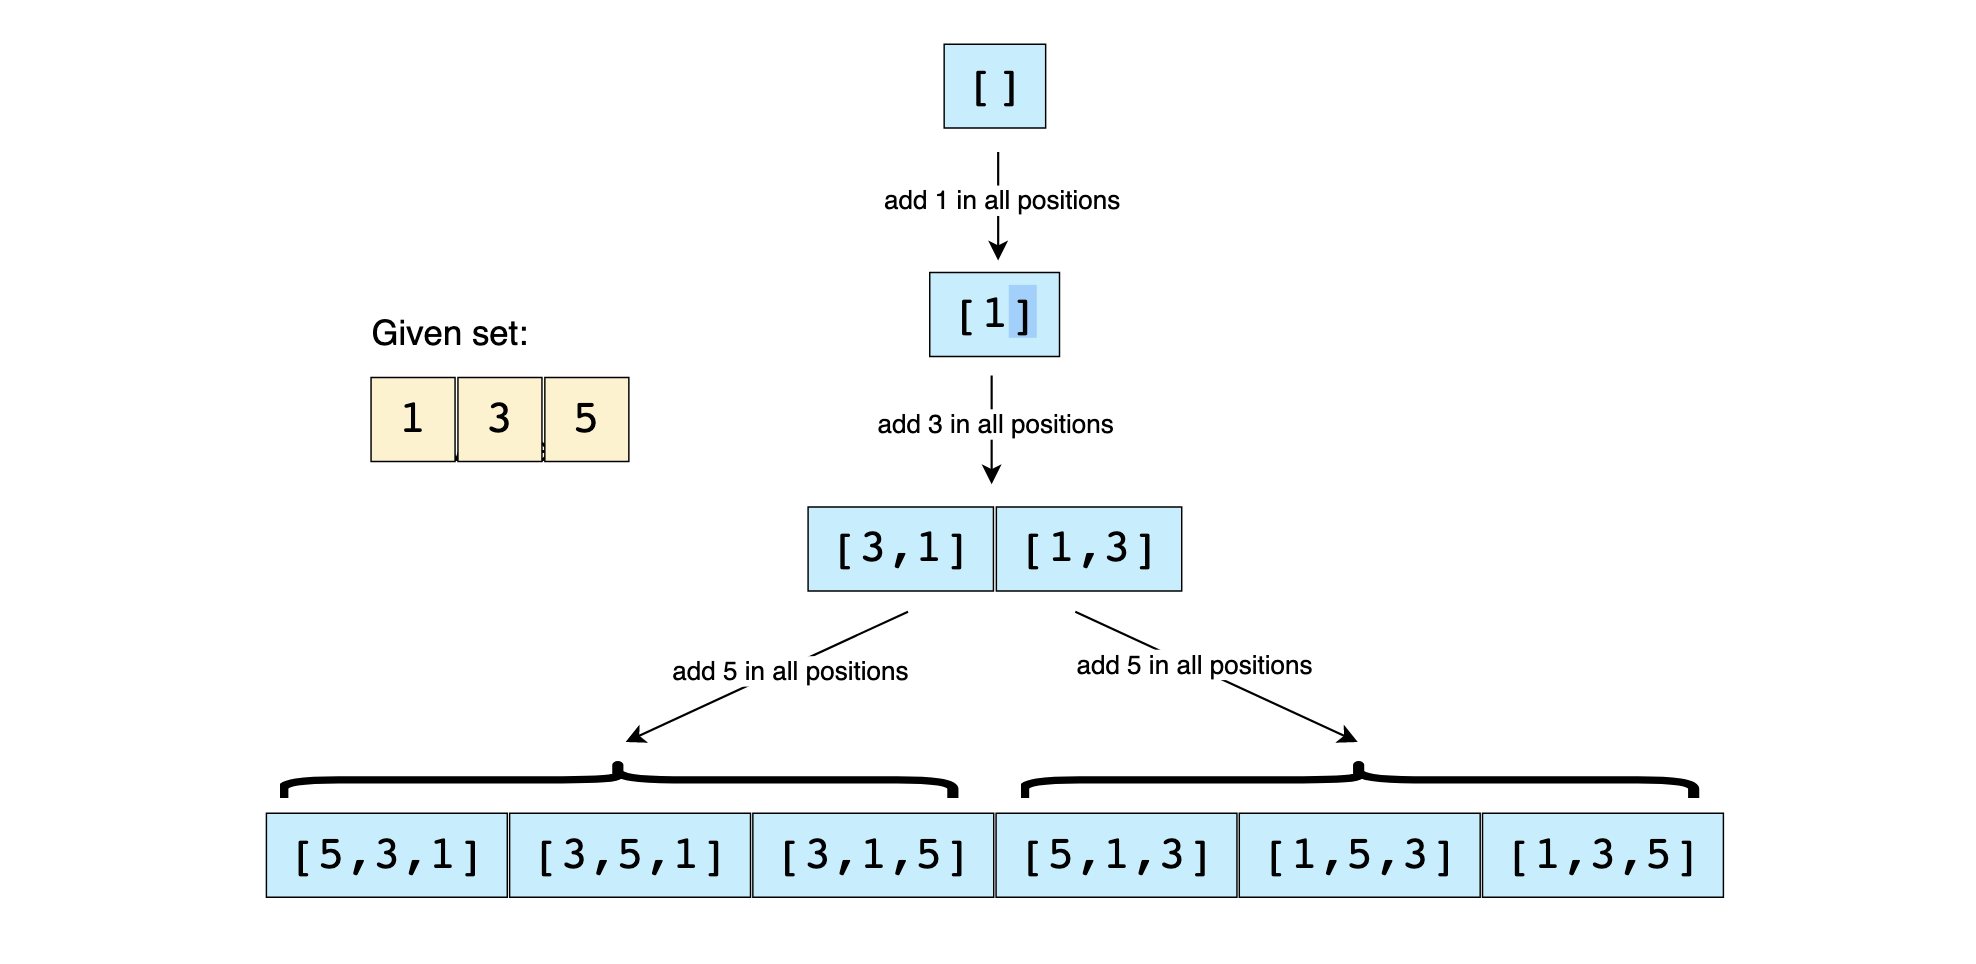

In [ ]:
class Solution:
    def permute(self, nums):
        result = []
        queue = [[]]

        for n in nums:
            # we will take all existing permutations and add the current number to create new permutations

            for i in range(len(queue)):
                old = queue.pop(0)
                # create a new permutation by adding the current number at every position
#                 print(old)
                
                for j in range(len(old)+1):
                    new = old.copy()
#                     print(new)
                    new.insert(j, n)
#                     print(new)
                    if len(new) != len(nums):
                        queue.append(new)
                    else:
                        result.append(new)

        return result

In [ ]:
array = []
len(array)

0

In [ ]:
def generate_permutations(nums):
    result = []
    generate_permutations_recursive(nums, 0, [], result)
    return result


def backtrack(nums, index, currentPermutation, result):
    if index == len(nums):
        result.append(currentPermutation)
    else:
        # create a new permutation by adding the current number at every position
        for i in range(len(currentPermutation)+1):
            newPermutation = list(currentPermutation)
            newPermutation.insert(i, nums[index])
            backtrack(nums, index + 1, newPermutation, result)

In [ ]:
class Solution:
    def permute(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        if not nums:
            return [[]]
        
        
        def backtrack(first):
            # if all integers are used up
            if first == len(nums):  
                res.append(nums[:])
                return
                
            for i in range(first, len(nums)):
                # place i-th integer first 
                # in the current permutation
                nums[first], nums[i] = nums[i], nums[first]
                # use next integers to complete the permutations
                backtrack(first + 1)
                # backtrack
                nums[first], nums[i] = nums[i], nums[first]
        
        res = []
        backtrack(0)
        return res

In [ ]:
nums = [1,2,3]
nums2 = [4,5,6]
nums.append(nums2)
nums

[1, 2, 3, [4, 5, 6]]

## 47 Permutations II (Amazon 3->2 , Microsoft Onsite 1, 2, Facebook 3,  Apple 3)

In [ ]:
class Solution():
    def permuteUnique(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        def dfs(path, nums):
            if not nums:
                res.add(tuple(path))

            for i in range(len(nums)):
                dfs(path+[nums[i]], nums[:i]+nums[i+1:])

        res = set()
        dfs([], nums)
        return res

In [ ]:
s = Solution()
s.permuteUnique([1,3,2,2])

{(1, 2, 2, 3),
 (1, 2, 3, 2),
 (1, 3, 2, 2),
 (2, 1, 2, 3),
 (2, 1, 3, 2),
 (2, 2, 1, 3),
 (2, 2, 3, 1),
 (2, 3, 1, 2),
 (2, 3, 2, 1),
 (3, 1, 2, 2),
 (3, 2, 1, 2),
 (3, 2, 2, 1)}

In [ ]:
class Solution():
    def permuteUnique(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        res = set()
        queue = [[]]

        for n in nums:
            # we will take all existing permutations and add the current number to create new permutations

            for i in range(len(queue)):
                old = queue.pop(0)
                # create a new permutation by adding the current number at every position
#                 print(old)
                
                for j in range(len(old)+1):
                    new = old.copy()
#                     print(new)
                    new.insert(j, n)
#                     print(new)
                    if len(new) != len(nums):
                        queue.append(new)
                    else:
                        res.add(tuple(new))

        return res

## 131 Palindrome Partitioning (Amazon 4->2, Google 2->3, Microsoft 2->0, Apple 2)

In [ ]:
Input: "aab"
Output:
[
  ["aa","b"],
  ["a","a","b"]
]

In [ ]:
class Solution:
    def partition(self, s):
        """
        :type s: str
        :rtype: List[List[str]]
        """
        
        if not s:
            return []
        
        res = []
        
        def dfs(path, s):
            if not s:
                res.append(path)
                return

            for i in range(1, len(s)+1):
                if s[:i] == s[:i][::-1]:
                    dfs(path + [s[:i]], s[i:])
        
        dfs([], s)
        return res


In [ ]:
class Solution(object):
    def partition(self, s):
        """
        :type s: str
        :rtype: List[List[str]]
        """
        if not s:
            return []
        
        def dfs(path, s):
            if not s:
                res.append(path[:])
                return
            
            for i in range(1, len(s)+1):
                if s[:i] == s[:i][::-1]:
                    path.append(s[:i])
                    dfs(path, s[i:])
                    path.pop()        
        res = []
        dfs([], s)
        return res


In [ ]:
class Solution(object):
    def partition(self, s):
        """
        :type s: str
        :rtype: List[List[str]]
        """
        out = []
        def isPalindrome(st):
            return st == st[::-1]
        
        def dfs(curr=[], index=1):
            if index == len(s) + 1:
                out.append(list(curr))
                return
            for i in range(index, len(s)+1):
                if isPalindrome(s[index-1:i]):
                    curr.append(s[index-1:i])
                    dfs(curr, i+1)
                    curr.pop()
        dfs()
        return out


## 267 Palindrome Permutation II (Uber 2, Microsoft 2)  
Input: s = "aabb"  
Output: ["abba","baab"]

In [ ]:
class Solution:
    def generatePalindromes(self, s):
        """
        :type s: str
        :rtype: List[str]
        """

        ans = []
        n = len(s)
        counter = collections.Counter(s)
        
        def helper(tmp):
            if len(tmp) == n:
                ans.append(tmp)
                return 
            
            for k, v in counter.items():
                if v > 0:
                    counter[k] -= 2
                    helper(k + tmp + k)
                    counter[k] += 2
        
        odd = [key for key, value in counter.items() if value % 2 != 0]
        if len(odd) > 1:
            return []
        if len(odd) == 1:
            counter[odd[0]] -= 1
            helper(odd[0])
        else:
            helper('')
        return ans

## 93 Restore IP Addresses (String. Recursion-Backtracking) (Microsoft Onsite 1, 4->0, Amazon 3->6->2)    
Input: s = "25525511135"  
Output: ["255.255.11.135","255.255.111.35"]  


In [ ]:
# O(2^N)  
# O(1)
class Solution:
    def restoreIpAddresses(self, s):
        if len(s) > 12 or len(s) < 4:
            return []

        def isValid(ip):
            array = ip.split('.')
            for num in array:
                if not num or int(num) > 255 or (num[0] == '0' and len(num) > 1):
                    return False
            return True

        res = []
        def dfs(path, index, cnt):
            if cnt == 3:
                print(path)
                if isValid(path):
                    res.append(path)
                return 
            
            if index > len(path) - 1:
                return
            
            for i in range(index, index+3):
                dfs(path[:i] + '.' + path[i:], i + 2, cnt + 1)
            
        dfs(s, 1, 0)
        return res

In [ ]:
a = '00'
int(a)

a

b = '0.0.00.'
b.split('.')

['0', '0', '00', '']

In [ ]:
class Solution:
    def restoreIpAddresses(self, s):
        """
        :type s: str
        :rtype: List[str]
        """
        if len(s) > 12 or len(s) < 4:
            return []

        def isValid(ip):
            if ip.count('.') != 3:
                return False
            
            array = ip.split('.')
            for num in array:
                if not num or int(num) > 255 or (len(num) > 1 and num[0] == '0'):
                    return False
            return True

        res = []
        def backtrack(cur, idx, cnt):
            if cnt == 3:
                if isValid(cur):
                    res.append(cur)
                return
            
            if idx > len(cur) - 1:
                return
            
            backtrack(cur[:idx] + '.' + cur[idx:], idx + 2, cnt+1)
            backtrack(cur, idx+1, cnt)

        backtrack(s, 0, 0)
        return res

## 494 Target Sum (Facebook 10->3, Amazon 4)

In [ ]:
# O(2^len(nums))
# O(len(nums))
class Solution:
    def findTargetSumWays(self, nums: List[int], S: int) -> int:
        self.count = 0
        self.dfs(nums, 0, 0, S)
        return self.count
    
    def dfs(self, nums, cur_sum, i, S):
        if i == len(nums):
            if cur_sum == S:
                self.count += 1
                # return
            
        else:   
            self.dfs(nums, cur_sum + nums[i], i + 1, S)
            self.dfs(nums, cur_sum - nums[i], i + 1, S)
                

## 24 Game (List. DFS-Recursion) (Google 5->0, Microsoft 4->6, Amazon 4, Apple 2 , ByteDance 2)

In [ ]:
class Solution:
    def judgePoint24(self, nums):
        
        if not nums:
            return False
        
        if len(nums) == 1:
            return 23.9 <= nums[0] <= 24.1
        
        for i in range(len(nums)):
            for j in range(i + 1, len(nums)):
                a = nums[i]
                b = nums[j]
                new_arr = nums[:i] + nums[i + 1:j] + nums[j + 1:]
                
                for num in [a + b, a - b, b - a, a * b, a and b / a, b and a / b]:
                    if self.judgePoint24(new_arr + [num]):
                        return True
        return False

## Split String Into Unique Primes (Amazon OA)

## Rhyme Schemes (Google Phone)

In [ ]:
def find_rythm(n):
    ans = []
    def backtrack(rythm = ''):
        if len(rythm) == n:
            convert = ''
            for c in rythm:
                convert += chr(int(c)+64)
            ans.append(convert)
            return
        
        max_val = 1 + max([int(num) for num in rythm]) if rythm else 1
        
#         max_val = max([int(num) for num in rythm] or [0])+1
        for i in range(1, max_val + 1):
            backtrack(rythm + str(i))
            
    backtrack()
    return ans

print(find_rythm(2))

['AA', 'AB']


In [ ]:
ord('1')

49

## Morse Code

In [ ]:
def morse(m):
    dic = {
        'a': '.-',     'b': '-...',
        'c': '-.-.',   'd': '-..',
        'e': '.',      'f': '..-.',
        'g': '--.',    'h': '....',
        'i': '..',     'j': '.---',
        'k': '-.-',    'l': '.-..',
        'm': '--',     'n': '-.',
        'o': '---',    'p': '.--.',
        'q': '--.-',   'r': '.-.',
        's': '...',    't': '-',
        'u': '..-',    'v': '...-',
        'w': '.--',    'x': '-..-',
        'y': '-.--',   'z': '--..',}

    ans = []
    def dfs(res, m):
        if not m:
            ans.append(res)
            return

        # print(letter, code)
            
        for c, morse in dic.items():
            if m.startswith(morse):
                dfs(res + c, m[len(morse):])

    dfs('', m)
#     print(ans)
    return ans

# m = '.-.-....-.-..'
m = '.--...-.-.'
# m = '.-.-....-.-...--.-...-....--...-.-...-.--.------..-...-..-.-.---...-..-..---..-......--..-.--.-...-.--......-.........-..-.----.-.....-....--.-.-.--.-..---..-......-...-..-.--.-.----......-.--.-----..-------.-.-..---.-.-.--..-.-...............--...--....--..-....-.-----.....-...-------.-......-.........-..-..--.-....-...--....-.--.-.....--..-.....--..-.---.--...-.-.-..-.-.....---.-.-.-.----....-..-.....--..----......-...-.--.-...--.....--.....-.......-....---..-..--...-------.--....---..---.....-.-.-....-.-...--..-....---..--.--...-.-.-..-.-.....---.-.-.-.----....-..-.....--..----.'

morse(m)

['abc',
 'abke',
 'abnn',
 'abnte',
 'abtae',
 'abten',
 'abtete',
 'abtr',
 'adaae',
 'adaen',
 'adaete',
 'adar',
 'adec',
 'adeke',
 'adenn',
 'adente',
 'adetae',
 'adeten',
 'adetete',
 'adetr',
 'adrn',
 'adrte',
 'aneaae',
 'aneaen',
 'aneaete',
 'anear',
 'aneec',
 'aneeke',
 'aneenn',
 'aneente',
 'aneetae',
 'aneeten',
 'aneetete',
 'aneetr',
 'anern',
 'anerte',
 'anfn',
 'anfte',
 'anic',
 'anike',
 'aninn',
 'aninte',
 'anitae',
 'aniten',
 'anitete',
 'anitr',
 'anuae',
 'anuen',
 'anuete',
 'anur',
 'ateeaae',
 'ateeaen',
 'ateeaete',
 'ateear',
 'ateeec',
 'ateeeke',
 'ateeenn',
 'ateeente',
 'ateeetae',
 'ateeeten',
 'ateeetete',
 'ateeetr',
 'ateern',
 'ateerte',
 'atefn',
 'atefte',
 'ateic',
 'ateike',
 'ateinn',
 'ateinte',
 'ateitae',
 'ateiten',
 'ateitete',
 'ateitr',
 'ateuae',
 'ateuen',
 'ateuete',
 'ateur',
 'atiaae',
 'atiaen',
 'atiaete',
 'atiar',
 'atiec',
 'atieke',
 'atienn',
 'atiente',
 'atietae',
 'atieten',
 'atietete',
 'atietr',
 'atirn',
 'atirt

### Matrix[int, str]. DFS-Recursion, (Backtracking) 

## 1219 Path with Maximum Gold (Google 4)
Input: grid = [[0,6,0],[5,8,7],[0,9,0]]  
Output: 24  
Explanation:  
[[0,6,0],  
 [5,8,7],  
 [0,9,0]]  
Path to get the maximum gold, 9 -> 8 -> 7.  

In [ ]:
class Solution:
    def getMaximumGold(self, grid: List[List[int]]) -> int:
        def findMaxGold(r: int, c: int) -> int:
            if r < 0 or r == m or c < 0 or c == n or grid[r][c] == 0: 
                return 0
            
            origin = grid[r][c]
            grid[r][c] = 0  # mark as visited
            
            maxGold = origin + max(findMaxGold(r+1, c), findMaxGold(r, c+1), findMaxGold(r-1, c), findMaxGold(r, c-1))
                
            grid[r][c] = origin  # backtrack
            
            return maxGold 

        m, n = len(grid), len(grid[0])
        return max(findMaxGold(r, c) for r in range(m) for c in range(n))

## 329 Longest Increasing Path in a Matrix (Matrix. DP, DFS-Recursion) (Google 4->7->10, Amazon 3->5, Facebook 4->3->7, Apple->0, Microsoft 2, ByteDance 2)

In [ ]:
import math
class Solution:
    def longestIncreasingPath(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """

        if not matrix: 
            return 0
        
        m = len(matrix)
        n = len(matrix[0])
        
        dic = {}
        
        def dp(i, j, prev):           
            if i < 0 or j < 0 or i >= m or j >= n or matrix[i][j] <= prev:
                # print('stop at', (i, j))
                return 0
            
            if (i,j) in dic:
                return dic[i,j]
            
            previous = matrix[i][j]
            # print(i, j)
            
            dic[i,j] = 1 + max(
                dp(i, j - 1, previous),
                dp(i - 1, j, previous),
                dp(i, j + 1, previous),
                dp(i + 1, j, previous))
            
            # print(dic)

            return dic[i, j]
        
        res = 0
        for i in range(m):
            for j in range(n):
                # print('start', (i, j))
                res = max(res, dp(i, j, -math.inf))
        return res

In [ ]:
from math import inf
class Solution(object):
    def longestIncreasingPath(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """
        if not matrix: 
            return 0
        
        dic = {}
        def dp(i, j, prev):               
            # print(i, j)    
            if 0 <= i < m and 0 <= j < n:
                if matrix[i][j] > prev:
                    if (i,j) in dic:
                        return dic[i,j]
                    
                    dic[i, j] = 1 + max(dp(i-1, j, matrix[i][j]),
                                        dp(i+1, j, matrix[i][j]),
                                        dp(i, j-1, matrix[i][j]),
                                        dp(i, j+1, matrix[i][j]))
                    return dic[i, j]
                else:
                    return 0
            
            else:
                return 0
                                
        m = len(matrix)
        n = len(matrix[0])
        
        res = 0
        for i in range(m):
            for j in range(n):
                res = max(res, dp(i, j, -inf))
        return res

In [ ]:
# O(m*n)
# O(m*n)
class Solution:
    def longestIncreasingPath(self, matrix: List[List[int]]) -> int:
        if not matrix: 
            return 0

        m = len(matrix)
        n = len(matrix[0])
        cache = {}

        def dfs(i, j):
            if (i, j) in cache:
                return cache[i, j]
            
            res = 1

            for direction in [(1,0),(-1,0),(0,1),(0,-1)]:
                x, y = i + direction[0], j + direction[1]
                # if x < 0 or x >= m or y < 0 or y >= n or matrix[x][y] <= matrix[i][j]:
                #     continue

                if 0 <= x < m and 0 <= y < n and matrix[x][y] > matrix[i][j]:
                    length = 1 + dfs(x, y)
                    res = max(length, res)

            cache[i, j] = res

            return res

        res = 0
        for i in range(m):
            for j in range(n):
                cur_len = dfs(i, j)
                res = max(res, cur_len)

        return res

In [ ]:
# O(m*n)  
# O(m*n)
# Postoder
class Solution:
    def longestIncreasingPath(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """
        if not matrix: 
            return 0
        
        dic = {}
        def dp(i, j):   
            if (i,j) in dic:
                return dic[i,j]
            
            dic[i,j] = 1 + max(
                dp(i - 1, j) if i > 0 and matrix[i][j] > matrix[i - 1][j] else 0,
                dp(i + 1, j) if i < m - 1 and matrix[i][j] > matrix[i + 1][j] else 0,
                dp(i, j - 1) if j > 0 and matrix[i][j] > matrix[i][j - 1] else 0,
                dp(i, j + 1) if j < n - 1 and matrix[i][j] > matrix[i][j + 1] else 0)

            return dic[i, j]
        
        m = len(matrix)
        n = len(matrix[0])
#         dp = [[0] * n for i in range(m)]
#         print('dp=',dp)
        
        res = 0
        for i in range(m):
            for j in range(n):
                res = max(res, dp(i, j))
        return res

In [ ]:
class Solution:
    def longestIncreasingPath(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """
        if not matrix: 
            return 0
        
        def backtrack(i, j):        
            if not dp[i][j]:                
                dp[i][j] = 1 + max(
                    backtrack(i - 1, j) if i > 0 and matrix[i][j] > matrix[i - 1][j] else 0,
                    backtrack(i + 1, j) if i < m - 1 and matrix[i][j] > matrix[i + 1][j] else 0,
                    backtrack(i, j - 1) if j > 0 and matrix[i][j] > matrix[i][j - 1] else 0,
                    backtrack(i, j + 1) if j < n - 1 and matrix[i][j] > matrix[i][j + 1] else 0)
            
            return dp[i][j]
        
        m = len(matrix)
        n = len(matrix[0])
        dp = [[0] * n for i in range(m)]
#         print('dp=',dp)
        
        res = []
        for i in range(m):
            for j in range(n):
                res.append(backtrack(i, j))
        return max(res)

In [ ]:
s = Solution()

matrix = [
  [9,9,4],
  [6,6,8],
  [2,1,1]
] 

s.longestIncreasingPath(matrix)

dp= [[0, 0, 0], [0, 0, 0], [0, 0, 0]]


4

In [ ]:
matrix = [[9,9,4],[6,6,8],[2,1,1]]

s = Solution()
s.longestIncreasingPath(matrix)

5

## 733 Flood Fill (Amazon 14->9, Microsoft 3, Google 2)

In [ ]:
# O(m*n)
# O(m*n)

class Solution():
    def floodFill(self, image, sr, sc, newColor):
        m = len(image)
        n = len(image[0])
        
        color = image[sr][sc]
        
        if color == newColor: 
            return image
        
        def dfs(i, j):
            if i < 0 or i >= m or j < 0 or j >= n or image[i][j] != color:
                return

#             if 0 <= i < m and 0 <= j < n and image[i][j] == color:
                
            image[i][j] = newColor
            dfs(i-1, j)
            dfs(i + 1, j)
            dfs(i, j - 1)
            dfs(i, j + 1)
        
        dfs(sr, sc)
        return image

In [ ]:
class Solution():
    def floodFill(self, image, sr, sc, newColor):
        m = len(image)
        n = len(image[0])
        
        color = image[sr][sc]
        
        if color == newColor: 
            return image
        
        def dfs(i, j):
            if image[i][j] == color:
                image[i][j] = newColor
                
                if i >= 1: 
                    dfs(i-1, j)
                if i + 1 < m:
                    dfs(i + 1, j)
                if j >= 1:
                    dfs(i, j - 1)
                if j + 1 < n:
                    dfs(i, j + 1)
        
        dfs(sr, sc)
        return image

## 200 Number of Island (String Matrix. DFS-Recursion) (Amazon 75->98, Google 15->9, Microsoft 12->24, Facebook 16, Bytedance 2, Apple 10)

O(N*M)  
O(N*M)

In [ ]:
class Solution:

    def numIslands(self, matrix):
        """
        :type grid: List[List[str]]
        :rtype: int
        """
        if not matrix:
            return 0
        
        self.m = len(matrix)
        self.n = len(matrix[0])

        res = 0
        for i in range(self.m):
            for j in range(self.n):
                if matrix[i][j] == '1':
                    self.dfs(i, j, matrix)
                    res += 1
        return res

    def dfs(self, i, j, matrix):
        if i < 0 or i >= self.m or j < 0 or j >= self.n or matrix[i][j] == '0':
            return
    
#             if 0 <= i < m and 0 <= j < n and matrix[i][j] == '1':
        matrix[i][j] = '0'
        self.dfs(i+1, j, matrix)
        self.dfs(i-1, j, matrix)
        self.dfs(i, j+1, matrix)
        self.dfs(i, j-1, matrix)

In [ ]:
grid = [[1,1,0,0,0],
        [1,1,0,0,0],
        [0,0,1,0,0],
        [0,0,0,1,1]]

print(len(grid))

for i in range(len(grid)):
    for j in range(len(grid[0])):
        print(grid[i][j])

4
1
1
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
1
1


In [ ]:
class Solution:
    def numIslands(self, matrix: List[List[str]]) -> int:
        if not matrix:
            return 0
        
        m = len(matrix)
        n = len(matrix[0])

        def dfs(i, j):
            matrix[i][j] = '#'

            for direction in [(1,0),(-1,0),(0,1),(0,-1)]:
                x, y = i + direction[0], j + direction[1]
                # if x < 0 or x >= m or y < 0 or y >= n or matrix[x][y] <= matrix[i][j]:
                #     continue

                if 0 <= x < m and 0 <= y < n and matrix[x][y] == '1':
                    dfs(x, y)
                            
        res = 0
        for i in range(m):
            for j in range(n):
                if matrix[i][j] == '1':
                    dfs(i, j)
                    res += 1
        return res

In [ ]:
class Solution {
    
    public int m;
    public int n;
    
    public int numIslands(char[][] matrix) {
        
        m = matrix.length;
        n = matrix[0].length;
        
        int res = 0;
        
        for (int i=0; i<m; i++) {
            for (int j=0; j<n; j++) {
                if (matrix[i][j] == '1') {
                    dfs(matrix, i, j);
                    res++;
                }
                
            }
        }
        
        return res;
        
    }
    
    public void dfs(char[][] matrix, int i, int j) {
        
        if (i < 0 || i >= m || j < 0 || j >= n || matrix[i][j] != '1') {
            return;
        } 
        
        matrix[i][j] = '#';
        dfs(matrix, i+1, j);
        dfs(matrix, i, j+1);
        dfs(matrix, i-1, j);
        dfs(matrix, i, j-1);
        
    }
}

## 695 Max Area of Island (Matrix. DFS-Recursion) (Microsoft Onsite ->4, Amazon 5->11, Google 21, Apple->0)

In [ ]:
# O(m*n)
# O(m*n)
class Solution:
    def maxAreaOfIsland(self, grid):
        """
        input: List[List[int]]
        output: int
        """
        if not grid:
            return 0
        
        m = len(grid)
        n = len(grid[0])
        
        res = 0
        
        # return area of (i,j) surround
        def divide_conquer(i, j):
            if i < 0 or j < 0 or i >= m or j >= n or grid[i][j] == 0:
                return 0
            
#             if 0 <= i < m and 0 <= j < n and matrix[i][j] == 1:
            grid[i][j] = 0
            return 1 + divide_conquer(i-1, j) \
                     + divide_conquer(i+1, j) \
                     + divide_conquer(i, j-1) \
                     + divide_conquer(i, j+1)
            
#             else:
#                 return 0

        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    area = divide_conquer(i, j)
                    res = max(res, area)

        return res

In [ ]:
class Solution:
    def maxAreaOfIsland(self, grid: List[List[int]]) -> int:
        if not grid:
            return 0
        
        m = len(grid)
        n = len(grid[0])
        
        res = 0
        
        # return area of (i,j) surround
        def dfs(i, j):

            grid[i][j] = '#'

            count = 1

            for direction in [(1,0),(-1,0),(0,1),(0,-1)]:
                x, y = i + direction[0], j + direction[1]
                # if x < 0 or x >= m or y < 0 or y >= n or matrix[x][y] <= matrix[i][j]:
                #     continue

                if 0 <= x < m and 0 <= y < n and grid[x][y] == 1:
                    count += dfs(x, y)

            return count

        for i in range(m):
            for j in range(n):
                if grid[i][j] == 1:
                    area = dfs(i, j)
                    res = max(res, area)

        return res

## 694 Number of Distinct Islands (Amazon 16->9, Apple->0, Microsoft 4, ByteDance)

In [ ]:
class Solution:
    def numDistinctIslands(self, grid: List[List[int]]) -> int:
        self.m = len(grid)
        self.n = len(grid[0]) 
        self.shapes = set()
        
        for i in range(self.m):
            for j in range(self.n):
                if grid[i][j] == 1:
                    island = []
                    self.dfs(island, i, j, grid)
                    island.sort()
                    i, j = island[0][0], island[0][1]
                    for pair in island:
                        pair[0] -= i
                        pair[1] -= j
                        
                    self.shapes.add(str(island))
        
        return len(self.shapes)
    
    def dfs(self, island, i, j, grid):
        if i < 0 or j < 0 or i >= self.m or j >= self.n or grid[i][j] == 0:
            return 

        grid[i][j] = 0
        island.append([i,j])
        self.dfs(island, i, j+1, grid)
        self.dfs(island, i+1, j, grid)
        self.dfs(island, i, j-1, grid)
        self.dfs(island, i-1, j, grid)

In [ ]:
# O(m*n)
# O(m*n)
class Solution:
    def numDistinctIslands(self, grid: List[List[int]]) -> int:
        
        self.m = len(grid)
        self.n = len(grid[0]) 
        self.shapes = set()
        
        for i in range(self.m):
            for j in range(self.n):
                if grid[i][j] == 1:
                    shape = []
                    self.dfs(i, j, 0, shape, grid)
                    if shape:
                        self.shapes.add(tuple(shape))

        return len(self.shapes)
    
    def dfs(self, i, j, di, shape, grid):
        if i < 0 or j < 0 or i >= self.m or j >= self.n or grid[i][j] != 1:
            return 

        grid[i][j] = -1
        shape.append(di)
        self.dfs(i, j+1, 1, shape, grid)
        self.dfs(i+1, j, 2, shape, grid)
        self.dfs(i, j-1, 3, shape, grid)
        self.dfs(i-1, j, 4, shape, grid)
        shape.append(di)

In [ ]:
s = Solution()
grid = [[1,1,0],[0,1,1],[0,0,0],[1,1,1],[0,1,0]]
s.numDistinctIslands(grid)

[0, 3, 1, 3, 0, 0, 0, 0]
[]
[]
[]
[]
[]
[]
[]
[]
[0, 3, 1, 0, 3, 0, 0, 0]
[]
[]
[]
[]
[]


2

## 529 Minesweeper (Matrix. DFS-Recursion) (Uber 10, Amazon 4, Microsoft Onsite 3->0,Facebook 3, Google 2)  

Input: board = [["E","E","E","E","E"],["E","E","M","E","E"],["E","E","E","E","E"],["E","E","E","E","E"]], click = [3,0]

In [ ]:
class Solution:
    def updateBoard(self, board, click):
        """
        :type board: List[List[str]]
        :type click: List[int]
        :rtype: List[List[str]]
        """
        if not board:
            return []

        m, n = len(board), len(board[0])
        i, j = click[0], click[1]

        # If a mine ('M') is revealed, then the game is over - change it to 'X'.
        if board[i][j] == 'M':
            board[i][j] = 'X'
            return board

        
        def dfs(i, j):
            if i < 0 or i >= m or j < 0 or j >= n or board[i][j] != 'E':
                return
  
            mine_count = 0

            for d in [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0)]:
                ni, nj = i + d[0], j + d[1]
                if 0 <= ni < m and 0 <= nj < n and board[ni][nj] == 'M':        
                    mine_count += 1

            if mine_count != 0:
                board[i][j] = str(mine_count)
                return
                
            board[i][j] = 'B'
            dfs(i+1, j)
            dfs(i+1, j+1)
            dfs(i+1, j-1)
            dfs(i-1, j)
            dfs(i-1, j-1)
            dfs(i-1, j+1)
            dfs(i, j+1)
            dfs(i, j-1)
                
        # run dfs to reveal the board
        dfs(i, j)
        return board 

In [ ]:
# O(m*n)
# O(m*n)
class Solution:
    def updateBoard(self, board, click):
        """
        :type board: List[List[str]]
        :type click: List[int]
        :rtype: List[List[str]]
        """
        if not board:
            return []

        m, n = len(board), len(board[0])
        i, j = click[0], click[1]

        # If a mine ('M') is revealed, then the game is over - change it to 'X'.
        if board[i][j] == 'M':
            board[i][j] = 'X'
            return board

        
        def dfs(i, j):
            # if i < 0 or i >= m or j < 0 or j >= n or board[i][j] != 'E':
            #     return
            if 0 <= i < m and 0 <= j < n and board[i][j] == 'E':   
                mine_count = 0

                for d in [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0)]:
                    ni, nj = i + d[0], j + d[1]
                    if 0 <= ni < m and 0 <= nj < n and board[ni][nj] == 'M':        
                        mine_count += 1

                if mine_count != 0:
                    board[i][j] = str(mine_count)
                    return

                board[i][j] = 'B'
                dfs(i+1, j)
                dfs(i+1, j+1)
                dfs(i+1, j-1)
                dfs(i-1, j)
                dfs(i-1, j-1)
                dfs(i-1, j+1)
                dfs(i, j+1)
                dfs(i, j-1)
                
        # run dfs to reveal the board
        dfs(i, j)
        return board 

In [ ]:
class Solution:
    def updateBoard(self, board, click):
        """
        :type board: List[List[str]]
        :type click: List[int]
        :rtype: List[List[str]]
        """
        if not board:
            return []

        m, n = len(board), len(board[0])
        i, j = click[0], click[1]

        # If a mine ('M') is revealed, then the game is over - change it to 'X'.
        if board[i][j] == 'M':
            board[i][j] = 'X'
            return board

        
        def dfs(board, i, j):
            if board[i][j] != 'E':
                return
     
            directions = [(-1,-1), (0,-1), (1,-1), (1,0), (1,1), (0,1), (-1,1), (-1,0)]

            mine_count = 0

            for d in directions:
                ni, nj = i + d[0], j + d[1]
                if 0 <= ni < m and 0 <= nj < n and board[ni][nj] == 'M':        
                    mine_count += 1

            if mine_count == 0:
                board[i][j] = 'B'
            else:
                board[i][j] = str(mine_count)
                return

            for d in directions:
                ni, nj = i + d[0], j + d[1]
                if 0 <= ni < m and 0 <= nj < n:
                    dfs(board, ni, nj)
        
        # run dfs to reveal the board
        dfs(board, i, j)
        return board 

## 130 Surrounded Regions (String Matrix. DFS-Recursion) (Google 2->5->4, Amazon 5->3, Uber 2)  

Input: board = [["X","X","X","X"],["X","O","O","X"],["X","X","O","X"],["X","O","X","X"]]  
Output: [["X","X","X","X"],["X","X","X","X"],["X","X","X","X"],["X","O","X","X"]]

In [ ]:
# O(m*n)
# O(m*n)
class Solution:
    def solve(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board:
            return
        
        m = len(board)
        n = len(board[0]) 
        
        def dfs(i, j):
            # 退出dfs的条件：1.走到boundary；2.遇到'X'
            if i < 0 or i >= m or j < 0 or j >=n or board[i][j] != 'O': 
                return 
            # if 0 <= i < m and 0 <= j < n and board[i][j] == 'O':   
            board[i][j] = '#' # 表示该元素已被访问

            dfs(i - 1, j)
            dfs(i + 1, j)
            dfs(i, j - 1)
            dfs(i, j + 1)
        
        for i in range(m):
            for j in range(n):
                if i == 0 or j == 0 or i == m - 1 or j == n - 1: # 点在boundary上
                    if board[i][j] == 'O': # 如果boundary上的元素为O,则进行dfs
                        dfs(i, j)
                        
        for i in range(m):
            for j in range(n):
                if board[i][j] == '#':
                    board[i][j] = 'O'
                else:
                    board[i][j] = 'X'
                    
                    

In [ ]:
# 因为boundary上的'O'肯定不会被包围
# 主要思路就是对boundary上是'O'的元素进行DFS，然后只要碰到'O'就继续走下去，直到碰到'X'或者碰到boundary，然后将这些'O'全部mark一下，即用'#'来替代，
# 最后我们遍历整个board，如果是'#'就变回'O'，如果是'X'或者'O'就变成'X'。

class Solution:
    def solve(self, board):
        """
        :type board: List[List[str]]
        :rtype: void Do not return anything, modify board in-place instead.
        """
        
        if not board:
            return
        
        m = len(board)
        n = len(board[0]) 
        
        def dfs(i, j):
            # 退出dfs的条件：1.走到boundary；2.遇到'X'
            if i < 0 or i >= m or j < 0 or j >=n or board[i][j] != 'O': 
                return 
            
            board[i][j] = '#' # 表示该元素已被访问
            
            dfs(i - 1, j)
            dfs(i + 1, j)
            dfs(i, j - 1)
            dfs(i, j + 1)
        
        for i in range(row):
            for j in range(col):
                if i == 0 or j == 0 or i == row - 1 or j == col - 1: # 点在boundary上
                    if board[i][j] == 'O': # 如果boundary上的元素为O,则进行dfs
                        dfs(i, j)
                        
        for i in range(row):
            for j in range(col):
                if board[i][j] == '#':
                    board[i][j] = 'O'
                else:
                    board[i][j] = 'X'

## 79 Word Search (String Matrix. DFS-Recursion, Backtracking) (Amazon 15->20, Microsoft 8->3, Uber 7, Facebook 7->6, Apple 4, ByteDance 3)

![image.png](attachment:image.png)

In [ ]:
# O(m*n)  
# O(1)

# Time Complexity: O(N4^L)where N is the number of cells in the board and L is the length of the word to be matched.
# For the backtracking function, its execution trace would be visualized as a 4-ary tree, 
# each of the branches represent a potential exploration in the corresponding direction. 
# Therefore, in the worst case, the total number of invocation would be the number of nodes in a full 4-nary tree, which is about 4^L

class Solution:
    def exist(self, board: List[List[str]], word: str) -> bool:
        if not board:
            return False
        if not word:
            return True
        
        m = len(board)
        n = len(board[0])
        
        # check whether can find word, start at (i,j) position    
        def divide_conquer(i, j, word):
            if not word: # all the characters are checked
                return True
            
            if i < 0 or i >= m or j < 0 or j >= n or word[0] != board[i][j]:
                return False
            
            tmp = board[i][j]  # first character is found, check the remaining part
            board[i][j] = "#"  # avoid visit again 
            # check whether can find "word" along one direction
            res = divide_conquer(i+1, j, word[1:]) or \
                  divide_conquer(i-1, j, word[1:]) or \
                  divide_conquer(i, j+1, word[1:]) or \
                  divide_conquer(i, j-1, word[1:])
            board[i][j] = tmp
            return res
    
        for i in range(m):
            for j in range(n):
                if divide_conquer(i, j, word):
                    return True
        return False


In [ ]:
class Solution:
    def exist(self, board, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        
        if not board:
            return False
        if not word:
            return True
        
        m = len(board)
        n = len(board[0])
        
        # check whether can find word, start at (i,j) position    
        def divide_conquer(i, j, word):
            if not word: # all the characters are checked
                return True
            
            # if i < 0 or i >= m or j < 0 or j >= n or word[0] != board[i][j]:
            #     return False
            
            if 0 <= i < m and 0 <= j < n and board[i][j] == word[0]:   
            
                tmp = board[i][j]  # first character is found, check the remaining part
                board[i][j] = "#"  # avoid visit again 
                # check whether can find "word" along one direction
                res = divide_conquer(i+1, j, word[1:]) or \
                      divide_conquer(i-1, j, word[1:]) or \
                      divide_conquer(i, j+1, word[1:]) or \
                      divide_conquer(i, j-1, word[1:])
                board[i][j] = tmp
                return res
            
            else:
                return False
    
    
        for i in range(m):
            for j in range(n):
                if divide_conquer(i, j, word):
                    return True
        return False


In [ ]:
class Solution:
    def exist(self, matrix, word):
        """
        :type board: List[List[str]]
        :type word: str
        :rtype: bool
        """
        if not matrix:
            return False
        if not word:
            return True

        def divide_conquer(i, j, idx = 0):
            if idx == len(word):
                return True
            
            if i < 0 or i > m - 1 or j < 0 or j > n - 1 or matrix[i][j] != word[idx]:
                return False
               
            tmp = matrix[i][j]
            matrix[i][j] = '*'
            res = divide_conquer(i+1, j, idx+1) or \
                  divide_conquer(i, j+1, idx+1) or \
                  divide_conquer(i-1, j, idx+1) or \
                  divide_conquer(i, j-1, idx+1)
            matrix[i][j] = tmp
            return res
        
        m = len(matrix)
        n = len(matrix[0])
        for i in range(m):
            for j in range(n):
                if divide_conquer(i, j):
                    return True
        return False

## 212 Word Search II (String Matrix. DFS, Backtrack-Recursion) (Amazon 21->19, Facebook 5->0, Google 5->3, Uber 5, Microsoft Onsite 1, 5->7 Apple 7->6) (Hard)

时间复杂度: O(row * col * max_len(words))  
空间复杂度: O(N) total number of letters in the dictionary

In [ ]:
class Trie:
    def __init__(self, ):
        self.trie = {}
        self.isFinished = False

    

In [ ]:
class Solution:
    def findWords(self, board, words):
        """
        :type board: List[List[str]]
        :type words: List[str]
        :rtype: List[str]
        """
        if not board or not words:
            return

        # build trie 
        trie = {}
        for word in words:
            node = trie
            for c in word:
                if c not in node:
                    node[c] = {}
                node = node[c]
            node['#'] = {}
#         print('trie=',trie)

        def dfs(i, j, path, trie):
            if '#' in trie:
                res.add(path)
                if len(trie) == 1:
                    return
        
            if i < 0 or i >= m or j < 0 or j >= n or board[i][j] not in trie:
                return
        
#             if 0 <= i < m and 0 <= j < n and board[i][j] in trie:
            cur = board[i][j]
            board[i][j] = '*' # backtracking
            dfs(i + 1, j, path + cur, trie[cur])
            dfs(i - 1, j, path + cur, trie[cur])
            dfs(i, j + 1, path + cur, trie[cur])
            dfs(i, j - 1, path + cur, trie[cur])
            board[i][j] = cur
        
        res = set()
        
        m = len(board)
        n = len(board[0])
        for i in range(m):
            for j in range(n):
                dfs(i, j, '', trie)
        return list(res)

In [ ]:
class Solution:
    def findWords(self, board, words):
        """
        :type board: List[List[str]]
        :type words: List[str]
        :rtype: List[str]
        """
        if not board or not words:
            return

        # build trie 
        trie = {}
        for word in words:
            t = trie
            for c in word:
                if c not in t:
                    t[c] = {}
                t = t[c]
            t['#'] = '#'
#         print('trie=',trie)

        def dfs(i, j, trie, path):
            if '#' in trie:
                res.add(path)
            
            if i >= 0 and i < m and j >= 0 and j < n and board[i][j] in trie:
                c = board[i][j]
                board[i][j] = '*' # backtracking
                dfs(i + 1, j, trie[c], path + c)
                dfs(i - 1, j, trie[c], path + c)
                dfs(i, j + 1, trie[c], path + c)
                dfs(i, j - 1, trie[c], path + c)
                board[i][j] = c
        
        res = set()
        m = len(board)
        n = len(board[0])
        for i in range(len(board)):
            for j in range(len(board[0])):
                dfs(i, j, trie, '')
        return list(res)

In [ ]:
board = [
  ['o','a','a','n'],
  ['e','t','a','e'],
  ['i','h','k','r'],
  ['i','f','l','v']
]
words = ["oath","pea","eat","rain"]
s = Solution()
s.findWords(board, words)

trie= {'o': {'a': {'t': {'h': {'#': '#'}}}}, 'p': {'e': {'a': {'#': '#'}}}, 'e': {'a': {'t': {'#': '#'}}}, 'r': {'a': {'i': {'n': {'#': '#'}}}}}


['oath', 'eat']

## 51 N-Queens (Facebook 5, Amazon 4, Microsoft 3, ByteDance 3 , Apple 2)

In [ ]:
# O(N!)
# O(N)
class Solution(object):
    def solveNQueens(self, n):
        """
        :type n: int
        :rtype: List[List[str]]
        """
        self.res = []
        board = [['.' for i in range(n)] for i in range(n)]
        self.dfs(board, 0)

        return self.res
    
    def dfs(self, board, row):
        if row == len(board):
            ans = []
            for i in range(len(board)):
                ans.append(''.join(board[i]))
            
            self.res.append(ans)
            return

        for col in range(len(board[row])):
            if self.isValid(board, row, col):
                board[row][col] = 'Q'
                self.dfs(board, row + 1)
                board[row][col] = '.'
    
    # 因为皇后是一行一行从上往下放的，所以左下和右下不用检查（还没放皇后）；因为一行只会放一个皇后，所以每行不用检查。
    def isValid(self, board, row, col):
        # 检查列是否有皇后互相冲突
        for i in range(len(board)):
            if board[i][col] == 'Q':
                return False

        # 检查右上方是否有皇后互相冲突
        i = row - 1
        j = col + 1
        while i >= 0 and j < len(board):
            if board[i][j] == 'Q':
                return False

            i -= 1
            j += 1
        
        # 检查左上方是否有皇后互相冲突
        i = row - 1
        j = col - 1
        while i >= 0 and j >= 0:
            if board[i][j] == 'Q':
                return False

            i -= 1
            j -= 1

        return True

## 489 Robot Room Cleaner (DFS-Recursion) (Facebook 6->9, Google 5->7, Amazon 4) (Hard)



In [ ]:
# """
# This is the robot's control interface.
# You should not implement it, or speculate about its implementation
# """
#class Robot:
#    def move(self):
#        """
#        Returns true if the cell in front is open and robot moves into the cell.
#        Returns false if the cell in front is blocked and robot stays in the current cell.
#        :rtype bool
#        """
#
#    def turnLeft(self):
#        """
#        Robot will stay in the same cell after calling turnLeft/turnRight.
#        Each turn will be 90 degrees.
#        :rtype void
#        """
#
#    def turnRight(self):
#        """
#        Robot will stay in the same cell after calling turnLeft/turnRight.
#        Each turn will be 90 degrees.
#        :rtype void
#        """
#
#    def clean(self):
#        """
#        Clean the current cell.
#        :rtype void
#        """

class Solution(object):       
    def cleanRoom(self, robot):
        """
        :type robot: Robot
        :rtype: None
        """
                  
        def backtrack(i, j, d):
            visited.add((i, j))
            robot.clean()
            # going clockwise : 0: 'up', 1: 'right', 2: 'down', 3: 'left'
            for n in range(4):
                new_d = (d + n) % 4
                
                x = i + directions[new_d][0]
                y = j + directions[new_d][1]
                
                if (x, y) not in visited and robot.move():
                    backtrack(x, y, new_d)
                    robot.turnRight()
                    robot.turnRight()
                    robot.move()
                    robot.turnRight()
                    robot.turnRight()
                # turn the robot following chosen direction : clockwise
                robot.turnRight()
    
        # going clockwise : 0: 'up', 1: 'right', 2: 'down', 3: 'left'
        directions = [(-1, 0), (0, 1), (1, 0), (0, -1)]
        visited = set()
        backtrack(0, 0, 0)

## 37 Sudoku Solver (Amazon 4->5, Microsoft 3->0, Facebook 3, Google 2, Apple 2)

In [ ]:
board = [[i for i in range(9)] for i in range(9)]
for row in board:
    print(row)
def square(board, row, col):
    for i in range(9):
        print(board[3 * (row // 3) + i // 3][3 * (col // 3) + i % 3])
        
square(board, 6, 6)

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
[0, 1, 2, 3, 4, 5, 6, 7, 8]
6
7
8
6
7
8
6
7
8


In [ ]:
import copy
class Solution:
    def solveSudoku(self, board):
        """
        Do not return anything, modify board in-place instead.
        """
        if not board:
            return
        
        self.m = len(board)
        self.n = len(board[0])
        
        self.res = False
        
        for i in range(self.m):
            for j in range(self.n):
                if board[i][j] == '.':
                    self.solve(board, i, j)
                    # return self.res
                    
    def solve(self, board, i, j):     
        if i == self.m:
            self.res = True
            return
        
        for c in range(1, 10):
            c = str(c)
            if self.is_valid(board, i, j, c):
                board[i][j] = c
                                
                next_i, next_j = self.next_step(i, j)
                while next_i < self.m and next_j < self.n and board[next_i][next_j] != '.':
                    next_i, next_j = self.next_step(next_i, next_j)
                
                self.solve(board, next_i, next_j)
                if not self.res:
                    board[i][j] = '.'
                    
    def next_step(self, i, j):
        if j + 1 == self.n:
            i += 1
            j = 0
            return (i, j)
        
        return (i, j + 1)
                
    def is_valid(self, board, row, col, c):
        for i in range(9):
            if board[i][col] == c:
                return False
            
            if board[row][i] == c:
                return False
            
        x = row // 3 * 3
        y = col // 3 * 3
        
        for i in range(x, x+3):
            for j in range(y, y+3):
                if board[i][j] == c:
                    return False
            # if board[3 * (row // 3) + i // 3][3 * (col // 3) + i % 3] == c:
            #     return False
        return True

In [ ]:
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        if not board:
            return
        
        self.solve(board)
        
    def solve(self, board):
        for i in range(len(board)):
            for j in range(len(board[0])):
                if board[i][j] == '.':
                    for c in range(1, 10):
                        c = str(c)
                        if self.is_valid(board, i, j, c):
                            board[i][j] = c
                            if self.solve(board):
                                return True
                            else:
                                board[i][j] = '.'
                    return False
        return True
    
    def is_valid(self, board, row, col, c):
        for i in range(9):
            if board[i][col] == c:
                return False
            
            if board[row][i] == c:
                return False
            
            if board[3 * (row // 3) + i // 3][3 * (col // 3) + i % 3] == c:
                return False
        return True
    
s = Solution()
board = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
s.solveSudoku(board)
for row in board:
    print(row)

In [ ]:
inputs = [["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
for row in inputs:
    print(row)

print()
board = [["5","3","4","6","7","8","9","1","2"],["6","7","2","1","9","5","3","4","8"],["1","9","8","3","4","2","5","6","7"],["8","5","9","7","6","1","4","2","3"],["4","2","6","8","5","3","7","9","1"],["7","1","3","9","2","4","8","5","6"],["9","6","1","5","3","7","2","8","4"],["2","8","7","4","1","9","6","3","5"],["3","4","5","2","8","6","1","7","9"]]
for row in board:
    print(row)

['5', '3', '.', '.', '7', '.', '.', '.', '.']
['6', '.', '.', '1', '9', '5', '.', '.', '.']
['.', '9', '8', '.', '.', '.', '.', '6', '.']
['8', '.', '.', '.', '6', '.', '.', '.', '3']
['4', '.', '.', '8', '.', '3', '.', '.', '1']
['7', '.', '.', '.', '2', '.', '.', '.', '6']
['.', '6', '.', '.', '.', '.', '2', '8', '.']
['.', '.', '.', '4', '1', '9', '.', '.', '5']
['.', '.', '.', '.', '8', '.', '.', '7', '9']

['5', '3', '4', '6', '7', '8', '9', '1', '2']
['6', '7', '2', '1', '9', '5', '3', '4', '8']
['1', '9', '8', '3', '4', '2', '5', '6', '7']
['8', '5', '9', '7', '6', '1', '4', '2', '3']
['4', '2', '6', '8', '5', '3', '7', '9', '1']
['7', '1', '3', '9', '2', '4', '8', '5', '6']
['9', '6', '1', '5', '3', '7', '2', '8', '4']
['2', '8', '7', '4', '1', '9', '6', '3', '5']
['3', '4', '5', '2', '8', '6', '1', '7', '9']


In [ ]:
class Solution {
    public void solveSudoku(char[][] board) {
        if (board == null || board.length == 0) 
            return;
        
        solve(board);
    }
        
    public boolean solve(char[][] board) {
        for (int i = 0; i < board.length; i++) {
            for (int j = 0; j < board[0].length; j++) {
                if (board[i][j] == '.') {
                    for (char c = '1'; c <= '9'; c++) {
                        if (isValid(board, i, j, c)) {
                            board[i][j] = c;
                            if (solve(board)) 
                                return true;
                            else 
                                board[i][j] = '.';                                
                        }
                    }
                    return false;
                }
            }
        }
        return true;
    }

    private boolean isValid(char[][] board, int row, int col, char c) {
        for (int i = 0; i < 9; i++) {
            if (board[i][col] == c) 
                return false;
            if (board[row][i] == c) 
                return false;
            if (board[3 * (row / 3) + i / 3][3 * (col / 3) + i % 3] == c) 
                return false;
        }
        return true;
    }
}

In [ ]:
'1' == "1"

True

In [ ]:
c = 1
str(c)

'1'

In [ ]:
[["5","3",".",".","7",".",".",".","."],["6",".",".","1","9","5",".",".","."],[".","9","8",".",".",".",".","6","."],["8",".",".",".","6",".",".",".","3"],["4",".",".","8",".","3",".",".","1"],["7",".",".",".","2",".",".",".","6"],[".","6",".",".",".",".","2","8","."],[".",".",".","4","1","9",".",".","5"],[".",".",".",".","8",".",".","7","9"]]
[["5","3","4","6","7","8","9","1","2"],["6","7","2","1","9","5","3","4","8"],["1","9","8","3","4","2","5","6","7"],["8","5","9","7","6","1","4","2","3"],["4","2","6","8","5","3","7","9","1"],["7","1","3","9","2","4","8","5","6"],["9","6","1","5","3","7","2","8","4"],["2","8","7","4","1","9","6","3","5"],["3","4","5","2","8","6","1","7","9"]]

In [ ]:
def solveSudoku(self, board):
        """
        List[List[str]]
        None
        """
    
        row = [set(range(1, 10)) for _ in range(9)]  # 行剩余可用数字
        col = [set(range(1, 10)) for _ in range(9)]  # 列剩余可用数字
        block = [set(range(1, 10)) for _ in range(9)]  # 块剩余可用数字

        empty = []  # 收集需填数位置
        for i in range(9):
            for j in range(9):
                if board[i][j] != '.':  # 更新可用数字
                    val = int(board[i][j])
                    row[i].remove(val)
                    col[j].remove(val)
                    block[(i // 3)*3 + j // 3].remove(val)
                else:
                    empty.append((i, j))

        def backtrack(iter=0):
            if iter == len(empty):  # 处理完empty代表找到了答案
                return True
            i, j = empty[iter]
            b = (i // 3)*3 + j // 3
            for val in row[i] & col[j] & block[b]:
                row[i].remove(val)
                col[j].remove(val)
                block[b].remove(val)
                board[i][j] = str(val)
                if backtrack(iter+1):
                    return True
                row[i].add(val)  # 回溯
                col[j].add(val)
                block[b].add(val)
            return False
        backtrack()

In [ ]:
for i in range('1', '9'):
    print(i)

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
# buggy
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        m = len(board)
        n = len(board[0])
        
        def backtrack(board, r, c):
            if c == n:
                backtrack(board, r + 1, 0)
                
            if r == m:
                return True
            
            for i in range(r, m):
                for j in range(c, n):
                    if board[i][j] != '.':
                        return backtrack(board, i, j + 1)
                    
                    for ch in range(1, 10):
                        ch = str(ch)
                        if isValid(board, i, j, ch):
                            board[i][j] = ch
                            
                            if backtrack(board, i, j + 1):
                                return True
                            
                            board[i][j] = '.'
                            
                    return False
                
            return True
                            
        def isValid(board, r, c, n):
            for i in range(9):
                if board[r][i] == n:
                    return False
                
                if board[i][c] == n:
                    return False
                
                if board[(r//3)*3 + i//3][(c//3)*3 + i%3] == n:
                    return False
                
            return True
        
        return backtrack(board, 0, 0)
        

## 425 Word Squares (Google->0)  
Given an array of unique strings words, return all the word squares you can build from words. The same word from words can be used multiple times. You can return the answer in any order.   

Input: words = ["area","lead","wall","lady","ball"]  
Output: [["ball","area","lead","lady"],["wall","area","lead","lady"]]  
Explanation:  
The output consists of two word squares. The order of output does not matter (just the order of words in each word square matters).

In [ ]:
class Solution:
    def wordSquares(self, words: List[str]) -> List[List[str]]:
        self.words = words
        self.N = len(words[0])
        self.results = []
        
        for word in self.words:
            # try with every word as the starting word
            self.backtracking([word], 1)
            
        return self.results

    def backtracking(self, word_squares, step):
        if step == self.N:
            self.results.append(word_squares)
            return

        prefix = ''.join([word[step] for word in word_squares])
        # find out all words that start with the given prefix        
        for candidate in self.getWordsWithPrefix(prefix):
            # iterate row by row
            self.backtracking(word_squares+[candidate], step+1)

    def getWordsWithPrefix(self, prefix):
        for word in self.words:
            if word.startswith(prefix):
                yield word

In [ ]:
class Solution:
    def wordSquares(self, words: List[str]) -> List[List[str]]:
        self.words = words
        self.N = len(words[0])
        self.results = []
        
        for word in self.words:
            # try with every word as the starting word
            self.backtracking([word], 1)
        return self.results

    def backtracking(self, word_squares, step):
        if step == self.N:
            self.results.append(word_squares[:])
            return

        prefix = ''.join([word[step] for word in word_squares])
        # find out all words that start with the given prefix        
        for candidate in self.getWordsWithPrefix(prefix):
            # iterate row by row
            word_squares.append(candidate)
            self.backtracking(word_squares, step+1)
            word_squares.pop()

    def getWordsWithPrefix(self, prefix):
        for word in self.words:
            if word.startswith(prefix):
                yield word

In [ ]:
from collections import defaultdict

class Solution:
    def wordSquares(self, words):
        """
        :type words: List[str]
        :rtype: List[List[str]]
        """
        
        n = len(words[0]) # all words same length
        output = []
        prefixes = defaultdict(list)
        
        for word in words:
            for i in range(len(word)):
                prefixes[word[:i]].append(word)
                
        print(prefixes)        
        
        def helper(cur):
            if len(cur) == n:
                print('len=', len(cur))
                output.append(cur)
                return
        
            prefix = ''
            for word in cur:
                prefix += word[len(cur)]
                print('prefix=', prefix)

            for word in prefixes[prefix]:
                helper(cur + [word])
                
            print()
        for word in words:
            helper([word])
            
        return output

## 351 Android Unlock Patterns (Google 3->2, Apple 3->0, Microsoft 3, ByteDance 2->0)

In [ ]:
class Solution:
    def numberOfPatterns(self, m: int, n: int) -> int:
        dirs = [(1,0),(1,1),(0,1),(-1,1),(-1,0),(-1,-1),(0,-1),(1,-1)]
        ans = 0
        def solve(i, j, step, seen=set()):
            nonlocal ans            
            if step > n:
                return
            if m <= step <= n:
                ans += 1
            seen.add((i, j))
            for ni in range(3):
                for nj in range(3):
                    if (ni, nj) in seen:
                        continue;
                    si, sj = (i+ni) / 2, (j+nj) / 2
                    if (i+ni)%2==0 and (j+nj)%2==0 and not ((i+ni)//2, (j+nj)//2) in seen:
                        continue;
                    solve(ni, nj, step+1, seen)
            seen.remove((i, j))
        for i in range(3):
            for j in range(3):
                solve(i, j, 1)
        return ans

In [ ]:
# Buggy
class Solution:
    def numberOfPatterns(self, m: int, n: int) -> int:
        
        self.matrix = [[1,2,3],
                       [4,5,6],
                       [7,8,9]]
        
        self.row = len(self.matrix)
        self.col = len(self.matrix[0])
        self.m = m
        self.n = n
        self.count = 0
        
        for i in range(3):
            for j in range(3):
                self.dfs(i, j, 1)
    
        return self.count
        
    def dfs(self, i, j, level):
        if level == self.n:
            self.count += 1
            return
        
        if level >= self.m:
            self.count += 1
        
        if i < 0 or i >= self.row or j < 0 or j >= self.col:
            return 
        
        if self.matrix[i][j] == 0:
            self.dfs(i-1, j, level)
            self.dfs(i+1, j, level)
            self.dfs(i, j-1, level)
            self.dfs(i, j+1, level)
            self.dfs(i-1, j-1, level)
            self.dfs(i-1, j+1, level)
            self.dfs(i+1, j+1, level)
            self.dfs(i+1, j-1, level)
        
        else:
            prev = self.matrix[i][j]
            self.matrix[i][j] = 0
            self.dfs(i-1, j, level + 1)
            self.dfs(i+1, j, level + 1)
            self.dfs(i, j-1, level + 1)
            self.dfs(i, j+1, level + 1)
            self.dfs(i-1, j-1, level + 1)
            self.dfs(i-1, j+1, level + 1)
            self.dfs(i+1, j+1, level + 1)
            self.dfs(i+1, j-1, level + 1)
            self.matrix[i][j] = prev

### Matrix[int, str]. BFS-Iteration

## 805 Split Array With Same Average (List, Recursion-Backtracking) (Amazon 2->0, Microsoft 2->0, Apple->2) (Hard)

In [ ]:
class Solution:
    def splitArraySameAverage(self, nums):
        """
        :type nums: List[int]
        :rtype: bool
        """      
        nums.sort()

# 		从数组nums中，找到k个数之和等于target的可能性
# 		combination sum II 或者 k sum那两道题的简易版
        def dfs(nums, k, target, index):
            if not k and not target:
                return True

            if not k or target < 0:
                return False

            for i in range(index, len(nums)):
                if i > index and nums[i] == nums[i -1]:
                    continue

                if target < nums[i] * k or target > nums[-1] * k:
                    break

                if dfs(nums, k - 1, target - nums[i], i + 1):
                    return True

            return False
        
        #个数不会超过数组总个数的一半 + 1
        for i in range(1, len(nums) // 2 + 1):
#             i个数 x sum（nums） ==  i个数之和 x len(nums)
#             所以 sum（nums） x i ➗ len(nums) == i个数之和 必然是整数
            if sum(nums) * i % len(nums):
                continue
                 
#             从数组nums中，找到k个数之和等于target的可能性
            if dfs(nums, i, sum(nums) * i // len(nums), 0):
                return True
        
        return False    

## 947 Most Stones Removed with Same Row or Column (Matrix, Recursion-Backtracking) (Google 8->2)
O(MN)  
O(MN)
https://www.jianshu.com/p/30d2058db7f7

In [ ]:
import collections
class Solution:
    def removeStones(self, points):
        """
        :type stones: List[List[int]]
        :rtype: int
        """
        
        index = collections.defaultdict(set)
        for i, j in points:
            index[i].add(j + 10000)
            index[j + 10000].add(i)

        print(index)    

        def dfs(i):
            seen.add(i)
            for j in index[i]:
                if j not in seen:
                    dfs(j)

        seen = set()
        islands = 0
        for i, j in points:
            if i not in seen:
                islands += 1
                dfs(i)
                dfs(j + 10000)
        return len(points) - islands

In [ ]:
s = Solution()
stones = [[0,0],[0,1],[1,0],[1,2],[2,1],[2,2]]
s.removeStones(stones)

defaultdict(<class 'set'>, {0: {10000, 10001}, 10000: {0, 1}, 10001: {0, 2}, 1: {10000, 10002}, 10002: {1, 2}, 2: {10001, 10002}})


5

## Zombie in Matrix (BFS) (Amazon OA)

Given a 2D grid, each cell is either a zombie 1 or a human 0. Zombies can turn adjacent (up/down/left/right) human beings into zombies every hour. Find out how many hours does it take to infect all humans?

Input:  
[[0, 1, 1, 0, 1],  
 [0, 1, 0, 1, 0],  
 [0, 0, 0, 0, 1],  
 [0, 1, 0, 0, 0]]  

Output: 2

Explanation:  
At the end of the 1st hour, the status of the grid:  
[[1, 1, 1, 1, 1],  
 [1, 1, 1, 1, 1],  
 [0, 1, 0, 1, 1],  
 [1, 1, 1, 0, 1]]  

At the end of the 2nd hour, the status of the grid:  
[[1, 1, 1, 1, 1],  
 [1, 1, 1, 1, 1],  
 [1, 1, 1, 1, 1],  
 [1, 1, 1, 1, 1]]  

In [ ]:
class Solution:
    def minHour(self, rows, columns, grid):
        if not rows or not columns:
            return 0
        
        queue = [[i,j] for i in range(rows) for j in range(columns) if grid[i][j]==1]
        time = 0
        
        while queue:
#             new = []
            for n in range(len(queue)):
                i, j = queue.pop(0)
                      
                for di, dj in [[1,0],[-1,0],[0,1],[0,-1]]:
                    x, y = i + di, j + dj
                    
                    if 0 <= x < rows and 0 <= y < columns and grid[x][y] == 0:
                        grid[x][y] = 1
                        queue.append([x,y])
#             q = new
            
            if not queue:
                break
                
            time += 1
            
        return time

In [ ]:
s = Solution()

grid = [[0, 1, 1, 0, 1],  
        [0, 1, 0, 1, 0],  
        [0, 0, 0, 0, 1],  
        [0, 1, 0, 0, 0]] 

rows = len(grid)
columns = len(grid[0])

s.minHour(rows, columns, grid)

2

In [ ]:
class Solution:
    def minHour(self, rows, columns, grid):
        if not rows or not columns:
            return 0
        
        q = [[i,j] for i in range(rows) for j in range(columns) if grid[i][j]==1]
        time = 0
        
        while True:
            new = []
            for [i,j] in q:
                for d in [[1,0],[-1,0],[0,1],[0,-1]]:
                    ni, nj = i + d[0], j + d[1]
                    if 0 <= ni < rows and 0 <= nj < columns and grid[ni][nj] == 0:
                        grid[ni][nj] = 1
                        new.append([ni,nj])
            q = new
            
            if not q:
                break
                
            time += 1
            
        return time

## 994 Rotting Oranges (Amazon OA 183 -> 27,Microsoft 5, Google 2)  

You are given an m x n grid where each cell can have one of three values:  

0 representing an empty cell,  
1 representing a fresh orange, or  
2 representing a rotten orange.  
Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.  

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return -1.

In [ ]:
class Solution:
    def orangesRotting(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        
        if not grid:
            return 0
        
        rows = len(grid)
        columns = len(grid[0])
        
        queue = [[i,j] for i in range(rows) for j in range(columns) if grid[i][j]==2]
        time = 0
        
        oranges = 0
        for i in range(rows):
            for j in range(columns):
                if grid[i][j] == 2 or grid[i][j] == 1:
                    oranges += 1
                    
        rotten = len(queue)
        
        while queue:
            for i in range(len(queue)):
                i, i = queue.pop(0)
                for di, dj in [[1,0],[-1,0],[0,1],[0,-1]]:
                    x, y = i + di, j + dj
                    if 0 <= x < rows and 0 <= y < columns and grid[x][y] == 1:
                        grid[x][y] = 2
                        rotten += 1
                        queue.append([x, y])

            if not queue:
                break
                
            time += 1
            
        if oranges == rotten:
            return time
        
        else:
            return -1

## Treasure Island (Amazon OA)

In [ ]:
from collections import deque
def solution(matrix):
    if len(matrix) == 0 or len(matrix[0]) == 0:
        return -1  # impossible

    m, n = len(matrix), len(matrix[0])

    q = deque([(0, 0, 0)])  # ((x, y), step)
    matrix[0][0] = "D"
    
    while q:
        i, j, step = q.popleft()
        
        for di, dj in [[0, 1], [0, -1], [1, 0], [-1, 0]]:
            x = i + di
            y = j + dj
            
            if 0 <= x < m and 0 <= y < n:
                if matrix[x][y] == "X":
                    return step + 1
                
                if matrix[x][y] == "O":
                    # mark visited
                    matrix[x][y] = "D"
                    q.append((x, y, step + 1))

    return -1

In [ ]:
matrix = [['O', 'O', 'O', 'O'],
          ['D', 'O', 'D', 'O'],
          ['O', 'O', 'O', 'O'],
          ['X', 'D', 'D', 'O']]

solution(matrix)

5

## Treasure Island II (Amazon OA)

In [ ]:
from collections import deque
def bfs(matrix):
    m = len(matrix)
    n = len(matrix[0])
    
    q = deque()
    for i in range(m):
        for j in range(n):
            if matrix[i][j]=="S":
                q.append((i, j))
            
    steps = 0

    while q:
        for i in range(len(q)):
            i, j = q.popleft()
            for di, dj in [(0,1), (1,0), (-1,0), (0,-1)]:
                x, y = i + di, j + dj
                if 0 <= x < m and 0 <= y < n and matrix[x][y]!="D":: 
                    if matrix[x][y] == "X":
                        return steps + 1
                    
                    matrix[x][y]="D"
                    q.append((x, y))
        steps += 1



In [ ]:
matrix = [['S', 'O', 'O', 'S', 'S'],['D', 'O', 'D', 'O', 'D'],['O', 'O', 'O', 'O', 'X'],
 ['X', 'D', 'D', 'O', 'O'],['X', 'D', 'D', 'D', 'O']]
bfs(matrix)

## 1057 Campus Bikes (Google 23->2, Amazon 2, ByteDance 2)

In [ ]:
class Solution:
    def assignBikes(self, workers, bikes):
        """
        :type workers: List[List[int]]
        :type bikes: List[List[int]]
        :rtype: List[int]
        """
        
        dist = []
        
        for i, w in enumerate(workers):
            for j, b in enumerate(bikes):
                dist.append((abs(w[0]-b[0]) + abs(w[1]-b[1]), i, j))
        
        dist.sort(reverse = True)
        worker = set()
        bike = set()
        
        res = [0] * len(workers)
        
        while dist:
            d, w, b = dist.pop()
            
            if w not in worker and b not in bike: # 这个人和车都没有被分配
                res[w] = b
                
                worker.add(w) # 这个worker已经分配了
                bike.add(b) # 这个bike已经分配了
                
        return res

In [ ]:
class Solution {
    public int[] assignBikes(int[][] workers, int[][] bikes) {
        #// int[]: worker, bike, dis
        PriorityQueue<int[]> pq = new PriorityQueue<>(new Comparator<int[]>() {
            public int  compare(int[] a, int[] b) {
                if (a[2] < b[2]) return -1; #// compare by distance
                if (a[2] == b[2]) { #// if dis the same
                    if (a[0] != b[0]) {
                        return a[0] - b[0]; #// if worker num smaller, then result smaller.
                    } else {
                        return a[1] - b[1]; #// if dis and worker both same, then compare bike.
                    }
                }
                return 1; 
            }
        });
        
        for (int i = 0; i < workers.length; i++) {
            int[] worker = workers[i];
            for (int j = 0; j < bikes.length; j++) {
                int[] bike = bikes[j];
                int dis = Math.abs(worker[0] - bike[0]) + 
                          Math.abs(worker[1] - bike[1]);
                int[] unit = new int[]{i, j, dis};
                pq.offer(unit);
            }
        }
        
        int[] res = new int[workers.length];
        Set<Integer> visw = new HashSet<>();
        Set<Integer> visb = new HashSet<>();
        while (!pq.isEmpty()) {
            int[] cur = pq.poll();
            #//System.out.println(Arrays.toString(cur));
            if (!visw.contains(cur[0]) && !visb.contains(cur[1])) {
                res[cur[0]] = cur[1];
                visw.add(cur[0]);
                visb.add(cur[1]);
            }

        }
        return res;
        
    }
}

## 417 Pacific Atlantic Water Flow (Google 3, Amazon 2, ByteDance 9)

In [ ]:
class Solution(object):
    def pacificAtlantic(self, matrix):
        """
        :type heights: List[List[int]]
        :rtype: List[List[int]]
        """
        if not matrix: return []
        
        directions = [[0,1], [0,-1], [1,0], [-1,0]]
        m, n = len(matrix), len(matrix[0])        
        
        def bfs(queue):
            ocean = set(queue)
            while queue:
                i, j = queue.popleft()
                
                for dx, dy in directions:
                    x, y = i + dx, j + dy
                    if 0 <= x < m and 0 <= y < n and (x, y) not in ocean:
                        if matrix[x][y] >= matrix[i][j]:
                            queue.append([x, y])
                            ocean.add((x, y))
            return ocean
        
        pacific = deque()
        atlantic = deque()
        for i in range(m):
            pacific.append((i, 0))
            atlantic.append((i, n - 1))
        for i in range(n):
            pacific.append((0, i))
            atlantic.append((m - 1, i))
        
        return bfs(pacific) & bfs(atlantic)

## 1197 Minimum Knight Moves (BFS-Queue) (Facebook 9->4, Google 5->3, Amazon 4->3, Apple 2->0, Microsoft 2, ByteDance 2)

In [ ]:
class Solution:
    def minKnightMoves(self, row, col):
        """
        :type x: int
        :type y: int
        :rtype: int
        """
        if not row and not col:
            return 0
        
        moves = [(1,2),(2,1),(2,-1),(1,-2),(-1,-2),(-2,-1),(-2,1),(-1,2)]
        
        visited = set()
        visited.add((0,0))
        queue = [(0,0,0)]
        
        row = abs(row)
        col = abs(col)
        
        while queue:
            i, j, step = queue.pop(0)
            
            for di, dj in moves:
                x = i + di
                y = j + dj
                
                if (x, y) == (row, col):
                    return step + 1

                if -2 <= x <= 302 and -2 <= y <= 302:
                    if (x, y) not in visited:
                        visited.add((x, y))
                        queue.append((x, y, step + 1))

In [ ]:
class Solution:
    def minKnightMoves(self, x: int, y: int) -> int:
        moves = [(1,2),(2,1),(2,-1),(1,-2),(-1,-2),(-2,-1),(-2,1),(-1,2)]
        
        visited = set()
        visited.add((0,0))
        queue = [(0,0,0)]
        
        x = abs(x)
        y = abs(y)
        
        while queue:
            vertex = queue.pop(0)
            
            for move in moves:
                i = vertex[0] + move[0]
                j = vertex[1] + move[1]
                
                if (vertex[0], vertex[1]) == (x,y):
                return vertex[2] 

#                 if -5 <= i <= 302 and -5 <= j <= 302:
                if -2 <= i <= 302 and -2 <= j <= 302:
                    if (i,j) not in visited:
                        visited.add((i,j))
                        queue.append((i,j,vertex[2]+1))
                        
# class Solution(object):
#     memo = {(0, 0): 0}
#     queue = [(0, 0, 0)]
#     while queue:
#         vertex = queue.pop(0)
#         for move in ((2, -1), (2, 1), (-2, -1), (-2, 1), (1, -2), (1, 2), (-1, -2), (-1, 2)):
#             i = vertex[0]+move[0]
#             j = vertex[1]+move[1]
            
#             if -300 <= i <= 300 and -300 <= j <= 300:
#                 if (i, j) not in memo:
#                     memo[i,j] = vertex[2]+1
#                     queue.append((i, j, vertex[2]+1))
#     print(queue)
#     def minKnightMoves(self, x, y):
#         x = abs(x)
#         y = abs(y)
#         return self.memo[x,y]

In [ ]:
seen = set(['abc', 'abc', 'acb'])
seen

{'abc', 'acb'}

In [ ]:
class Solution {
    public int minKnightMoves(int a, int b) {
        if (a == 0 && b == 0) {
            return 0;
        }
        
        int[][] moves = {{1,2}, {2,1}, {2,-1}, {1,-2}, {-1,-2}, {-2,-1}, {-2,1}, {-1,2}};
        
        Deque<int[]> queue = new ArrayDeque<>();
        queue.offer(new int[]{0,0,0});
        
        Set<String> visited = new HashSet<>();
        visited.add("0 0");
        
        int row = Math.abs(a);
        int col = Math.abs(b);
        
        while (!queue.isEmpty()) {
            int[] cur = queue.poll();
            int i = cur[0];
            int j = cur[1];
            int step = cur[2];
            
            for (int[] dir: moves) {
                int x = i + dir[0];
                int y = j + dir[1];
                
                if (x == row && y == col) {
                    return step + 1;
                }
                
                if (x >= -2 && x <= 302 && y >= -2 && y <= 302) {
                    String s = String.valueOf(x) + " " + String.valueOf(y);
                    if (!visited.contains(s)) {
                        visited.add(s);
                        queue.offer(new int[]{x,y,step+1});
                    }
                }
                
            }
            
        }
        return -1;
        
    }
}

## 286 Walls and Gates (Facebook 9->5, Amazon 5->6, Google 3->2, ByteDance 5, Google 2 ,Microsoft 2)  

-1 A wall or an obstacle.  
0 A gate.  
INF Infinity means an empty room.  

Input: rooms =   
[[inf,-1,0,inf],  
[inf,inf,inf,-1],  
[inf,-1,inf,-1],  
[0,-1,inf,inf]]  

Output:   
[[3,-1,0,1],  
[2,2,1,-1],    
[1,-1,2,-1],  
[0,-1,3,4]]

In [ ]:
class Solution:
    def wallsAndGates(self, rooms: List[List[int]]) -> None:
        """
        Do not return anything, modify rooms in-place instead.
        """
        if not rooms:
            return
           
        directions = [(0, -1), (0, 1), (1, 0), (-1, 0)]
        
        row = len(rooms)
        col = len(rooms[0])
        
        inf = pow(2, 31) - 1
        
        queue = []
        for i in range(row):
            for j in range(col):
                if rooms[i][j] == 0:
                    queue.append((i, j))
        
        while queue:
            i, j = queue.pop(0) 
            
            for next_i, next_j in directions:
                x = i + next_i
                y = j + next_j
                
                if 0 <= x < row and 0 <= y < col and rooms[x][y] == inf:
                    rooms[x][y] = rooms[i][j] + 1
                    queue.append((x, y))

In [ ]:
import math
print(math.inf > 2147483647)

True


In [ ]:
class Solution {
    public void wallsAndGates(int[][] rooms) {
        
        int[][] directions = {{0,1}, {1,0}, {0,-1}, {-1,0}};
        
        int row = rooms.length;
        int col = rooms[0].length;
        
        int inf = Integer.MAX_VALUE;
        
        Deque<int[]> queue = new ArrayDeque<>();
        
        for (int i=0; i<row; i++) {
            for (int j=0; j<col; j++) {
                if (rooms[i][j] == 0) {
                    queue.offer(new int[]{i, j});
                }
            }
        }
        
        while (!queue.isEmpty()) {
            int[] tuple = queue.poll();
            int i = tuple[0];
            int j = tuple[1];
            
            for (int[] arr: directions) {
                int x = i + arr[0];
                int y = j + arr[1];
                
                if (x >=0 && x < row && y >=0 && y < col && rooms[x][y] == inf) {
                    rooms[x][y] = rooms[i][j] + 1;
                    queue.offer(new int[]{x, y});
                }
            }
        }
        
    }
}

## 688 Knight Probability in Chessboard (Amazon 4->3, Google 2,Microsoft 2->0, Apple 2->0)

In [ ]:
class Solution:
    def knightProbability(self, N, K, r, c):
        """
        :type N: int
        :type K: int
        :type r: int
        :type c: int
        :rtype: float
        """
        directions = ((2,1),(2,-1),(-2,1),(-2,-1),(1,2),(1,-2),(-1,2),(-1,-2))
        dp = [[0] * N for _ in range(N)]
        dp[r][c] = 1
        for _ in range(K):
            dp2 = [[0] * N for _ in range(N)]
            
            for r, row in enumerate(dp):
                for c, val in enumerate(row):
                    for dr, dc in directions:
                        x = r + dr
                        y = c + dc
                        if 0 <= x < N and 0 <= y < N:
                            dp2[x][y] += val / 8.0
            dp = dp2

        return sum(map(sum, dp))


## 490 The Maze (Amazon 6->2, Apple 2->0 , Microsoft 2, ByteDance  3)

In [ ]:
from collections import deque
class Solution(object):
    def hasPath(self, maze, start, destination):
        """
        :type maze: List[List[int]]
        :type start: List[int]
        :type destination: List[int]
        :rtype: bool
        """
        if not maze:
            return False
        
        m = len(maze)
        n = len(maze[0])
        
        queue = deque([start])
        # maze[start[0]][start[1]] = 1
        visited = set([tuple(start)])
        
        while queue:
            i, j = queue.popleft()
                    
            for di, dj in ((0, -1), (-1, 0), (0, 1), (1, 0)):
                x, y = i + di, j + dj
                
                if 0 <= x < m and 0 <= y < n:
                    while 0 <= x < m and 0 <= y < n and maze[x][y] == 0:  
                        x += di
                        y += dj

                    if x - di == destination[0] and y - dj == destination[1]:
                        return True

                    if (x-di, y-dj) not in visited:
                        visited.add((x-di, y-dj))
                        queue.append([x-di, y-dj])
                        
        return False

In [ ]:
class Solution:
    def hasPath(self, maze: List[List[int]], start: List[int], destination: List[int]) -> bool:
        
        if not maze:
            return False
        
        m = len(maze)
        n = len(maze[0])
        
        queue = [start]
        # maze[start[0]][start[1]] = 1
        visited = set()
        visited.add(tuple(start))
        
        while queue:
            i, j = queue.pop(0)
            print(i, j)
            
            if i == destination[0] and j == destination[1]:
                return True
            
            for di, dj in ((0, -1), (-1, 0), (0, 1), (1, 0)):
                x, y = i + di, j + dj
                
                while 0 <= x < m and 0 <= y < n and maze[x][y] == 0:
                      
                    # maze[x][y] = 1    
                    x += di
                    y += dj
                    
                if (x-di, y-dj) not in visited:
                    visited.add((x-di, y -dj))
                    queue.append([x-di, y-dj])
                        
        return False

## 505 The Maze II 

## 1091 Shortest Path in Binary Matrix (Amazon 13, ByteDance)  
A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

All the visited cells of the path are 0.  
All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).


In [ ]:
from collections import deque
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        if grid[0][0] != 0 or grid[-1][-1] != 0:
            return -1
        
        m = len(grid)
        n = len(grid[0])
        
        if m == 1 and n == 1:
            return 1
        
        queue = deque([[0,0,1]])
        visited = set([(0,0)])
        
        directions = [[1,1], [-1,-1], [1,0], [0, 1], [0,-1], [-1,0],[ -1,1],[1,-1]]
        
        while queue:
            i, j, distance = queue.popleft()
            print(i, j, distance)
            
            for x, y in directions:
                next_i = i + x
                next_j = j + y
                
                # if abs(next_i + next_j) == 1:
                next_dist = distance + 1
                # else:
                #     next_dist = distance + 2
                
                if 0 <= next_i < m and 0 <= next_j < n and (next_i, next_j) not in visited:
                    if grid[next_i][next_j] == 1:
                        continue
                    
                    if (next_i, next_j) == (m-1, n-1):
                        return next_dist
                    
                    visited.add((next_i, next_j))
                    queue.append([next_i, next_j, next_dist])
                    
        return -1
            

## 1293 Shortest Path in a Grid with Obstacles Elimination (Google 9, ByteDance 3)

In [ ]:
class Solution:
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        if len(grid) == 1 and len(grid[0]) == 1:
            return 0
        
        m, n = len(grid), len(grid[0])
        queue = deque([[0, 0, 0, 0]])    # row, col, num of obstables met so far
        visited = {(0, 0): 0}                 # row, col   =>   num of obstables met so far
        while queue:
            i, j, obs, steps = queue.popleft()
            
            for x, y in [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]:
                if 0 <= x < m and 0 <= y < n:
                    if x == m - 1 and y == n - 1: 
                        return steps + 1
                    
                    next_obs = obs
                    if grid[x][y] == 1:
                        next_obs += 1
                        if next_obs > k:
                            continue
                        
                    if next_obs < visited.get((x, y), float('inf')):
                        visited[(x, y)] = next_obs
                        queue.append([x, y, next_obs, steps+1])
        
        return -1

In [ ]:
# On top of BFS, I used an auxiliary dictionary "visited" to keep track of min eliminations used to get to each node, also to avoid repetition.
from collections import deque
class Solution:
    def shortestPath(self, grid: List[List[int]], k: int) -> int:
        m, n = len(grid), len(grid[0])
        queue = deque([[0, 0, 0, 0]])    # row, col, num of obstables met so far
        visited = {(0, 0): 0}                 # row, col   =>   num of obstables met so far
        
        while queue:
            r, c, obs, steps = queue.popleft()
            
            if obs > k: 
                continue
                    
            if r == m - 1 and c == n - 1: 
                return steps       
                    
            for r2, c2 in [[r+1, c], [r-1, c], [r, c+1], [r, c-1]]:
                if 0 <= r2 < m and 0 <= c2 < n:
                     
                    next_obs = obs + 1 if grid[r2][c2] == 1 else obs    
                    if next_obs < visited.get((r2, c2), float('inf')):
                        visited[(r2, c2)] = next_obs
                        queue.append([r2, c2, next_obs, steps+1])
        
        return -1

In [ ]:
array = [[0,0,0,0,0,0,0,0,0,0],[0,1,1,1,1,1,1,1,1,0],[0,1,0,0,0,0,0,0,0,0],[0,1,0,1,1,1,1,1,1,1],[0,1,0,0,0,0,0,0,0,0],[0,1,1,1,1,1,1,1,1,0],[0,1,0,0,0,0,0,0,0,0],[0,1,0,1,1,1,1,1,1,1],[0,1,0,1,1,1,1,0,0,0],[0,1,0,0,0,0,0,0,1,0],[0,1,1,1,1,1,1,0,1,0],[0,0,0,0,0,0,0,0,1,0]]
1

for x in array:
    print(x)

s = Solution()
s.shortestPath(array, 1)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
[0, 1, 0, 1, 1, 1, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


20

## 864 Shortest Path to Get All Keys (Airbnb 2, ByteDance)  
We are given a 2-dimensional grid. "." is an empty cell, "#" is a wall, "@" is the starting point, ("a", "b", ...) are keys, and ("A", "B", ...) are locks.  
We start at the starting point, and one move consists of walking one space in one of the 4 cardinal directions.  We cannot walk outside the grid, or walk into a wall.  If we walk over a key, we pick it up.  We can't walk over a lock unless we have the corresponding key.  

"@.a.#",  
"###.#",  
"b.A.B"  
Output: 8

In [ ]:
class Solution:
    def shortestPathAllKeys(self, grid: List[str]) -> int:

        m, n = len(grid), len(grid[0])
        numOfKeys = 0
        direc = [[0,1],[0,-1],[1,0],[-1,0]]
        moves = set()
        
        for i in range(m):
            for j in range(n):
                if grid[i][j] == '@':
                    starti = i
                    startj = j
                elif grid[i][j] in "abcdef":
                    numOfKeys += 1
        
        deque = collections.deque()
        deque.append([starti, startj, 0, ".@abcdef", 0])
        
        while deque:
            i, j, steps, keys, collectedKeys = deque.popleft()

            if grid[i][j] in "abcdef" and grid[i][j].upper() not in keys:
                keys += grid[i][j].upper()
                collectedKeys += 1
                
            if collectedKeys == numOfKeys:
                return steps

            for x, y in direc:
                ni = i+x
                nj = j+y
                if 0<=ni<m and 0<=nj<n and grid[ni][nj] in keys:
                    if (ni, nj, keys) not in moves:
                        moves.add((ni,nj,keys))
                        deque.append([ni, nj, steps + 1, keys, collectedKeys])
                
        return -1

## 317 Shortest Distance from All Buildings (Facebook 12, Microsoft 2, ByteDance)  
each 0 marks an empty land that you can pass by freely,  
each 1 marks a building that you cannot pass through, and  
each 2 marks an obstacle that you cannot pass through.  
Return the shortest travel distance for such a house. If it is not possible to build such a house according to the above rules, return -1. 


Traverse the matrix. For each building, use BFS to compute the shortest distance from each '0' to
this building. After we do this for all the buildings, we can get the sum of shortest distance
from every '0' to all reachable buildings. This value is stored
in 'distance[][]'. For example, if grid[2][2] == 0, distance[2][2] is the sum of shortest distance from this block to all reachable buildings.
Time complexity: O(number of 1)O(number of 0) ~ O(m^2n^2)

We also count how many building each '0' can be reached. It is stored in reach[][]. This can be done during the BFS. We also need to count how many total buildings are there in the matrix, which is stored in 'buildingNum'.

Finally, we can traverse the distance[][] matrix to get the point having shortest distance to all buildings. O(m*n)

In [ ]:
public class Solution {
    public int shortestDistance(int[][] grid) {
        if (grid == null || grid[0].length == 0) return 0;
        final int[] shift = new int[] {0, 1, 0, -1, 0};
        
        int row  = grid.length, col = grid[0].length;
        int[][] distance = new int[row][col];
        int[][] reach = new int[row][col];
        int buildingNum = 0;
        
        for (int i = 0; i < row; i++) {
            for (int j =0; j < col; j++) {
                if (grid[i][j] == 1) {
                    buildingNum++;
                    Queue<int[]> myQueue = new LinkedList<int[]>();
                    myQueue.offer(new int[] {i,j});

                    boolean[][] isVisited = new boolean[row][col];
                    int level = 1;
                    
                    while (!myQueue.isEmpty()) {
                        int qSize = myQueue.size();
                        for (int q = 0; q < qSize; q++) {
                            int[] curr = myQueue.poll();
                            
                            for (int k = 0; k < 4; k++) {
                                int nextRow = curr[0] + shift[k];
                                int nextCol = curr[1] + shift[k + 1];
                                
                                if (nextRow >= 0 && nextRow < row && nextCol >= 0 && nextCol < col
                                    && grid[nextRow][nextCol] == 0 && !isVisited[nextRow][nextCol]) {
                                        //The shortest distance from [nextRow][nextCol] to thic building
                                        // is 'level'.
                                        distance[nextRow][nextCol] += level;
                                        reach[nextRow][nextCol]++;
                                        
                                        isVisited[nextRow][nextCol] = true;
                                        myQueue.offer(new int[] {nextRow, nextCol});
                                    }
                            }
                        }
                        level++;
                    }
                }
            }
        }
        
        int shortest = Integer.MAX_VALUE;
        for (int i = 0; i < row; i++) {
            for (int j = 0; j < col; j++) {
                if (grid[i][j] == 0 && reach[i][j] == buildingNum) {
                    shortest = Math.min(shortest, distance[i][j]);
                }
            }
        }
        
        return shortest == Integer.MAX_VALUE ? -1 : shortest;
        
        
    }
}

## 301 Remove Invalid Parentheses (Facebook 23, Google 3, Apple 2, ByteDance 2)   

Given a string s that contains parentheses and letters, remove the minimum number of invalid parentheses to make the input string valid.

Return all the possible results. You may return the answer in any order.

Input: s = "()())()"  
Output: ["(())()","()()()"]  


In [ ]:
from collections import deque
class Solution:
    def removeInvalidParentheses(self, s: str) -> List[str]:
        res = []
        if not s:
            return res

        visited = set([s])
        queue = deque([s])
        found = False

        while queue:
            s = queue.popleft()
            if self.isValid(s):
                res.append(s)
                found = True

            if found:
                continue

            for i in range(len(s)):
                if s[i] != "(" and s[i] != ")":
                    continue

                t = s[0:i] + s[i+1:]
                if t not in visited:
                    visited.add(t)
                    queue.append(t)

        return res

    def isValid(self, s):
        count = 0
        for c in s:
            if c == "(":
                count += 1

            elif c == ")":
                count -= 1
                if count < 0:
                    return False

        return count == 0

In [ ]:
public class Solution {
    public List<String> removeInvalidParentheses(String s) {
      List<String> res = new ArrayList<>();
      
      if (s == null) return res;
      
      Set<String> visited = new HashSet<>();
      Queue<String> queue = new LinkedList<>();
      
      queue.add(s);
      visited.add(s);
      
      boolean found = false;
      
      while (!queue.isEmpty()) {
        s = queue.poll();
        
        if (isValid(s)) {
          #// found an answer, add to the result
          res.add(s);
          found = true;
        }
      
        if (found) continue;
      
        #// generate all possible states
        for (int i = 0; i < s.length(); i++) {
          // we only try to remove left or right paren
          if (s.charAt(i) != '(' && s.charAt(i) != ')') continue;
        
          String t = s.substring(0, i) + s.substring(i + 1);
        
          if (!visited.contains(t)) {
            #// for each state, if it's not visited, add it to the queue
            queue.add(t);
            visited.add(t);
          }
        }
      }
      
      return res;
    }
    
    #// helper function checks if string s contains valid parantheses
    boolean isValid(String s) {
      int count = 0;
    
      for (int i = 0; i < s.length(); i++) {
        char c = s.charAt(i);
        if (c == '(') count++;
        if (c == ')' && count-- == 0) return false;
      }
    
      return count == 0;
    }
}

## 1236. Web Crawler (Amazon 4->0, Microsoft 4->0)

In [ ]:
from collections import deque
class Solution:
    def crawl(self, startUrl, htmlParser):
        """
        input type: str, HtmlParser
        return type: List[str]
        """
        count = 0
        for index in range(len(startUrl)):
            if startUrl[index] == '/':  
                count += 1
                if count == 3:
                    hostname = startUrl[:index]
                    break
        
		# process stack
        visited = set([startUrl])
        queue = deque([startUrl])

        while queue:
            current = queue.popleft()
             
            for url in htmlParser.getUrls(current):
                if url not in visited and url.find(hostname) != -1:
                    visited.add(url)
                    queue.append(url)
        return visited

## 909 Snakes and Ladders (BFS-Iteration) (Amazon 5->6, Microsoft 4->0, Apple 3->0)

In [ ]:
class Solution(object):
    def snakesAndLadders(self, board):
        """
        :type board: List[List[int]]
        :rtype: int
        """
        N = len(board)
        
        # convert to 1 d
        one_d_board = [0]
        cnt = 0
        for i in range(N-1,-1,-1):
            if cnt % 2 == 0:
                one_d_board.extend(board[i])
            else:
                one_d_board.extend(board[i][::-1])
            cnt += 1
            
        N2 = N*N
        queue = deque([(1, 0)])
        seen = set([1])

        while queue:
            val, move = queue.popleft()
            
            for i in range(1,7):
                target = val + i
                
                if target <= N2:
                    if one_d_board[target] != -1:
                        target = one_d_board[target]
                        
                    if target == N2:
                        return move + 1

                    if target not in seen:
                        queue.append((target, move+1))
                        seen.add(target)
                        
        return -1

In [ ]:
class Solution:
    def snakesAndLadders(self, board):
        """
        :type board: List[List[int]]
        :rtype: int
        """
        N = len(board)
        # convert to 1 d
        bd = [0]
        cnt = 0
        for i in range(N-1,-1,-1):
            if cnt % 2 == 0:
                bd += board[i]
            else:
                bd += board[i][::-1]
            cnt += 1
        print(bd)        
        #self.minCnt = float('inf')
        N2 = N*N
        queue = [1]
        move  = 0
        seen = set()
        seen.add(1)
        #print(bd)
        while queue:
            for i in range(len(queue)):
                val = queue.pop(0)
                
                if val == N2:
                    return move
                
                for i in range(1,7):
                    tgt = val + i
                    
                    if tgt <= N2:
                        if bd[tgt] != -1:
                            tgt = bd[tgt]

                        if tgt not in seen:
                            queue.append(tgt)
                            seen.add(tgt)
                        
            move += 1
            
            # move在前面，move。在最后move + 1
        return -1

In [ ]:
class Solution:
    def snakesAndLadders(self, board):
        N = len(board)

        def get(s):
            # Given a square num s, return board coordinates (r, c)
            quot, rem = divmod(s-1, N)
            row = N - 1 - quot
            col = rem if row%2 != N%2 else N - 1 - rem
            return row, col

        dist = {1: 0}
        queue = collections.deque([1])
        while queue:
            s = queue.popleft()
            if s == N*N: return dist[s]
            for s2 in xrange(s+1, min(s+6, N*N) + 1):
                r, c = get(s2)
                if board[r][c] != -1:
                    s2 = board[r][c]
                if s2 not in dist:
                    dist[s2] = dist[s] + 1
                    queue.append(s2)
        return -1

class Solution {
    public int snakesAndLadders(int[][] board) {
        int N = board.length;

        Map<Integer, Integer> dist = new HashMap();
        dist.put(1, 0);

        Queue<Integer> queue = new LinkedList();
        queue.add(1);

        while (!queue.isEmpty()) {
            int s = queue.remove();
            if (s == N*N) return dist.get(s);

            for (int s2 = s+1; s2 <= Math.min(s+6, N*N); ++s2) {
                int rc = get(s2, N);
                int r = rc / N, c = rc % N;
                int s2Final = board[r][c] == -1 ? s2 : board[r][c];
                if (!dist.containsKey(s2Final)) {
                    dist.put(s2Final, dist.get(s) + 1);
                    queue.add(s2Final);
                }
            }
        }
        return -1;
    }

    public int get(int s, int N) {
        // Given a square num s, return board coordinates (r, c) as r*N + c
        int quot = (s-1) / N;
        int rem = (s-1) % N;
        int row = N - 1 - quot;
        int col = row % 2 != N % 2 ? rem : N - 1 - rem;
        return row * N + col;
    }
}

## 1631. Path With Minimum Effort (Google 8, ByteDance 3)

In [ ]:
class Solution:
    def minimumEffortPath(self, heights: List[List[int]]) -> int:

        m, n = len(heights), len(heights[0])
        dist = [[float('inf')] * n for _ in range(m)]
        minHeap = [(0, 0, 0)] # distance, row, col
        directions = [[0,1], [1,0], [0,-1], [-1,0]]
        
        while minHeap:
            d, i, j = heappop(minHeap)
            if d > dist[i][j]: 
                continue
                
            if i == m - 1 and j == n - 1:
                return d  # Reach to bottom right
            
            for dir_x, dir_y in directions:
                x, y = i + dir_x, j + dir_y
                if 0 <= x < m and 0 <= y < n:
                    newDist = max(d, abs(heights[x][y] - heights[i][j]))
                    if dist[x][y] > newDist:
                        dist[x][y] = newDist
                        heappush(minHeap, (dist[x][y], x, y))

In [ ]:
class Solution {
    int[] DIR = new int[]{0, 1, 0, -1, 0};
    public int minimumEffortPath(int[][] heights) {
        int m = heights.length, n = heights[0].length;
        int[][] dist = new int[m][n];
        for (int i = 0; i < m; i++) Arrays.fill(dist[i], Integer.MAX_VALUE);
        
        PriorityQueue<int[]> minHeap = new PriorityQueue<>(Comparator.comparingInt(a -> a[0]));
        minHeap.offer(new int[]{0, 0, 0}); // distance, row, col
        while (!minHeap.isEmpty()) {
            int[] top = minHeap.poll();
            int d = top[0], r = top[1], c = top[2];
            if (d > dist[r][c]) continue;
            if (r == m - 1 && c == n - 1) return d; // Reach to bottom right
            for (int i = 0; i < 4; i++) {
                int nr = r + DIR[i], nc = c + DIR[i + 1];
                if (nr >= 0 && nr < m && nc >= 0 && nc < n) {
                    int newDist = Math.max(d, Math.abs(heights[nr][nc] - heights[r][c]));
                    if (dist[nr][nc] > newDist) {
                        dist[nr][nc] = newDist;
                        minHeap.offer(new int[]{dist[nr][nc], nr, nc});
                    }
                }
            }
        }
        return 0; // Unreachable code, Java require to return interger value.
    }
}

## 773 Sliding Puzzle (Microsoft 3->0, Facebbook 3->2)

In [ ]:
class Solution:
    def slidingPuzzle(self, board):
        """
        :type board: List[List[int]]
        :rtype: int
        """
        self.row = len(board)
        self.col = len(board[0])
        self.directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]

        init = self.boardToString(board)
        target = self.getTarget(self.row, self.col)
        
        if init == target:
            return 0
        
        queue = [init]
        visited = {init: 0}
        
        while queue:
            cur = queue.pop(0)
            nxt = self.getNext(cur)
            for s in nxt:
                if s not in visited:
                    queue.append(s)
                    visited[s] = visited[cur] + 1
                    
                    if s == target:
                        return visited[s]
        return -1
    
    
    def getTarget(self, row, col):
            res = []
            result = row * col
            
            for n in range(result):
                res.append(str(n))
                
            x = res.pop(0)
            res.append(x)
            
            return ' '.join(res)
            
#             res = ''
#             result = row * col
#             for n in result:
#                 res += str(n)
            
#             return res
        
    def boardToString(self, board):
        res = ''
        for i in range(len(board)):
            for j in range(len(board[0])):
                res += str(board[i][j])
                res += ' '

        return res.rstrip()

    def stringToBoard(self, s):
        board = [[0] * self.col for i in range(self.row)]
        s = s.split()

        for i in range(self.col * self.row):                
            board[i // self.col][i % self.col] = int(s[i])

        return board

    def getNext(self, cur):
        res = []
        curboard = self.stringToBoard(cur)

        for i in range(self.row * self.col):
            if curboard[i // self.col][i % self.col] == 0:

                x = i // self.col
                y = i % self.col
                for i, j in self.directions:
                    nxt_x = x + i
                    nxt_y = y + j
                    if 0 <= nxt_x < self.row and 0 <= nxt_y < self.col:
                        curboard[x][y],curboard[nxt_x][nxt_y] = curboard[nxt_x][nxt_y],curboard[x][y]
                        res.append(self.boardToString(curboard))
                        curboard[x][y],curboard[nxt_x][nxt_y] = curboard[nxt_x][nxt_y],curboard[x][y]
        return res

In [ ]:
 class Solution:
    def slidingPuzzle(self, board):
        """
        :type board: List[List[int]]
        :rtype: int
        """

        row = len(board)
        col = len(board[0])
        directions = [(-1, 0), (0, -1), (1, 0), (0, 1)]
        
        def getTarget(row, col):
            res = []
            result = row * col
            
            for n in range(result):
                res.append(str(n))
                
            x = res.pop(0)
            res.append(x)
            
            return ' '.join(res)
            
#             res = ''
#             result = row * col
#             for n in result:
#                 res += str(n)
            
#             return res
        
        def boardToString(board):
            res = ''
            for i in range(len(board)):
                for j in range(len(board[0])):
                    res += str(board[i][j])
                    res += ' '
        
            return res.rstrip()

        def stringToBoard(s):
            board = [[0] * col for i in range(row)]
            s = s.split()
        
            for i in range(col * row):                
                board[i // col][i % col] = int(s[i])
                
            return board

        def getNext(cur):
            res = []
            curboard = stringToBoard(cur)
            
            for i in range(row * col):
                if curboard[i // col][i % col] == 0:
                    
                    x = i // col
                    y = i % col
                    for i, j in directions:
                        nxt_x = x + i
                        nxt_y = y + j
                        if 0 <= nxt_x < row and 0 <= nxt_y < col:
                            curboard[x][y],curboard[nxt_x][nxt_y] = curboard[nxt_x][nxt_y],curboard[x][y]
                            res.append(boardToString(curboard))
                            curboard[x][y],curboard[nxt_x][nxt_y] = curboard[nxt_x][nxt_y],curboard[x][y]
            return res

        init = boardToString(board)
        target = getTarget(row, col)
        
        if init == target:
            return 0
        
        queue = [init]
        visited = {init: 0}
        
        while queue:
            cur = queue.pop(0)
            nxt = getNext(cur)
            for s in nxt:
                if s not in visited:
                    queue.append(s)
                    visited[s] = visited[cur] + 1
                    
                    if s == target:
                        return visited[s]
        return -1

In [ ]:
a = set()
a.add(((1,0), (2,1)))
a

{((1, 0), (2, 1))}

In [ ]:
x = [[1,2], [2,3]]
for i in range(len(x)):
    x[i] = tuple(x[i])

x = tuple(x)
print(x)
a = set(x)

    


((1, 2), (2, 3))


In [ ]:
s = 'a b c '
s.rstrip()

'a b c'

## 675 Cut Off Trees for Golf Event (BFS-Iteration) (Amazon 6->3->0, Apple 2) (Hard)


In [ ]:
from collections import deque

class Solution:
    def cutOffTree(self, forest):
        trees = sorted((v, r, c) for r, row in enumerate(forest)
                       for c, v in enumerate(row) if v > 1)
        
        sr = sc = ans = 0
        
        def bfs(forest, sr, sc, tr, tc):
            R, C = len(forest), len(forest[0])
            queue = deque([(sr, sc, 0)])
            seen = {(sr, sc)}
            
            while queue:
                r, c, d = queue.popleft()
                if r == tr and c == tc:
                    return d
                
                for nr, nc in ((r-1, c), (r+1, c), (r, c-1), (r, c+1)):
                    if (0 <= nr < R and 0 <= nc < C and
                            (nr, nc) not in seen and forest[nr][nc]):
                        seen.add((nr, nc))
                        queue.append((nr, nc, d+1))
            return -1

        
        for _, tr, tc in trees:
            d = bfs(forest, sr, sc, tr, tc)
            if d < 0: 
                return -1
            ans += d
            sr, sc = tr, tc
        return ans

## 1306 Jump Game III (Microsoft OA ->2)

In [ ]:
from collections import deque
class Solution:
    def canReach(self, arr, start):
        """
        :type arr: List[int]
        :type start: int
        :rtype: bool
        """    
        # BFS
        queue = deque()
        queue.append(start)
        seen = set()
        seen.add(start)
        while queue:
            cur_index = queue.popleft()
            if arr[cur_index] == 0:
                return True

            next_index = cur_index + arr[cur_index]
            if 0 <= next_index < len(arr) and next_index not in seen:
                queue.append(next_index)
                seen.add(next_index)

            next_left = cur_index - arr[cur_index]
            if 0 <= next_left < len(arr) and next_left not in seen:
                queue.append(next_left)
                seen.add(next_left)
        return False

In [ ]:
class Solution:
    def canReach(self, arr, start):
        """
        :type arr: List[int]
        :type start: int
        :rtype: bool
        """    
        # BFS 
        
        queue = [start]
        visited = [start]
        
        while queue:
            i = array.pop(0)
            if not arr[i]:
                return True
            
            right_i = i + arr[i]
            
            if 0 <= right_i <= len(arr) - 1 and right_i not in visited:
                queue.append(right_i)
                visited.add(right_i)
                
            left_i = i - arr[i] 
                
            if 0 <= left_i <= len(arr) - 1 and left_i not in visited:
                queue.append(left_i)
                visited.add(left_i)
                
        return False

In [ ]:
x = [[0,0,1,0,0,0,0],[0,1,0,0,0,0,1],[0,0,1,0,1,0,0],[0,0,0,1,1,1,0],[1,0,0,1,1,0,0],[1,1,1,1,1,0,1],[0,0,1,0,0,0,0]]
for s in x:
    print(s)

[0, 0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 1]
[0, 0, 1, 0, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 0]
[1, 0, 0, 1, 1, 0, 0]
[1, 1, 1, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0, 0]
